## Mathematical Optimization Series

# Part 5: Newtons method

With gradient descent being built on the first order Taylor series approximation one might naturally ask: can we build a descent scheme based on second order Taylor series?  The answer is a resounding yes and the resulting algorithm - called *Newton's method* - is the subject of this post.

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import linear_algebra_library as linlib
import autograd.numpy as np
import time

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1. Newton's method

Since the first order Taylor series approximation to a function leads to gradient descent it seems intuitive that higher order Taylor series approximations might similarly yeild descent-based algorithms.  In this Section we introduce a natural algorithm based on the second order Taylor series approximation - called *Newton's method*.  Because it is based on the second order approximation Newton's method has natural strengths and weaknesses when compared to gradient descent.  In summary we will see that the cumulative effect of these trade-offs is - in general - that Newton's method is especially useful for minimizing convex functions of a moderate number of inputs.

## 1.1  The descent direction provided by second order Taylor series approximation

In our *vital elements of calculus* series we first looked at the second order Taylor series approximation of single input functions $g(w)$.  When centered at a particular point $v$ such an approximation is a quadratic function of the form

\begin{equation}
h(w) = g(v) + \frac{\mathrm{d}}{\mathrm{d}w}g(v)(w - v) +  \frac{1}{2}\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(v)(w - v)^2
\end{equation}

which is - typically speaking - a much better approximation of the underlying function near $v$ than is the first order approximation on which gradient descent is built.

#### <span style="color:#a50e3e;">Example 1. </span>  Single input Taylor series of a sinusoid

In the Python cell below we produce an amimation visualizing a single-input function $g(w) = \text{sin}(2w)$, along with its first and second order Taylor series approximation.  As you move the slider left to right the point $v$ (shown as a red dot) on which the approximations is based moves left to right, producing new approximations (the point on the graph of $g$ at which the approximations are tangent is marked with a small red 'x').  One can see that at each point the second order approximation (in blue) - since it contains both first and second derivative information at the point - is a much better local approximator than the first order analog (in green). 

Note how the second order approximation matches the local convexity / concavity of the function $g$, i.e., where $g$ is convex / concave so too is the quadratic approximation.  


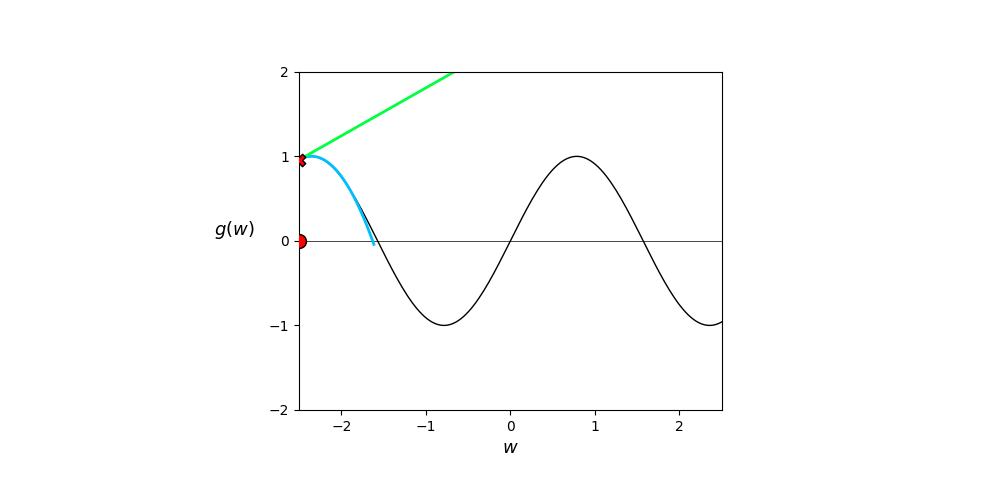
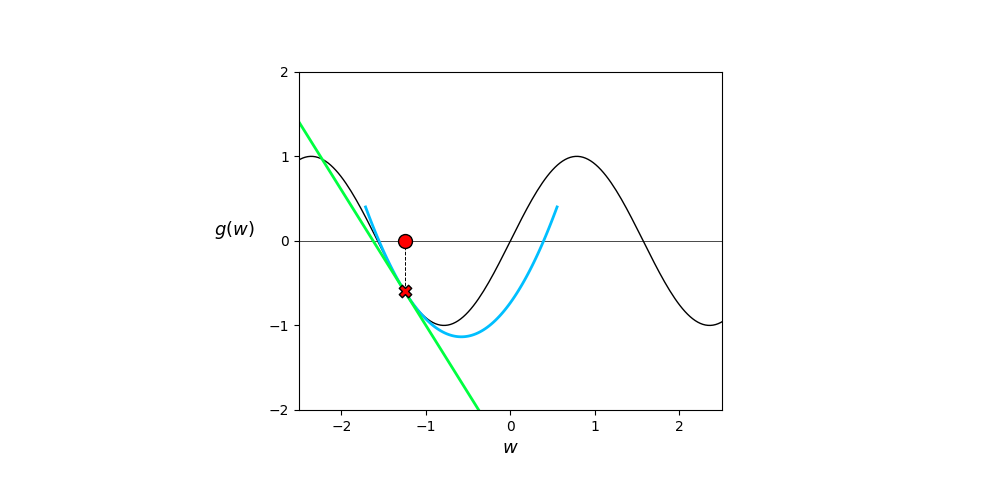
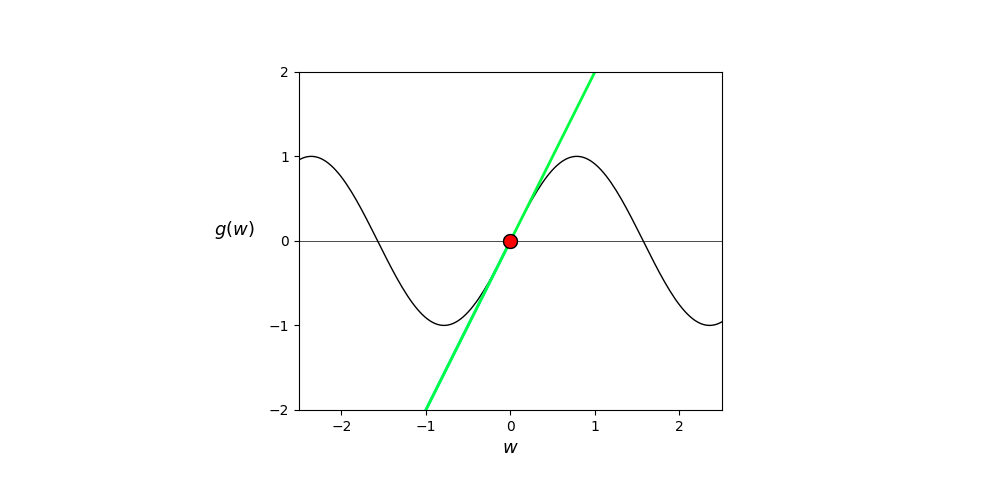
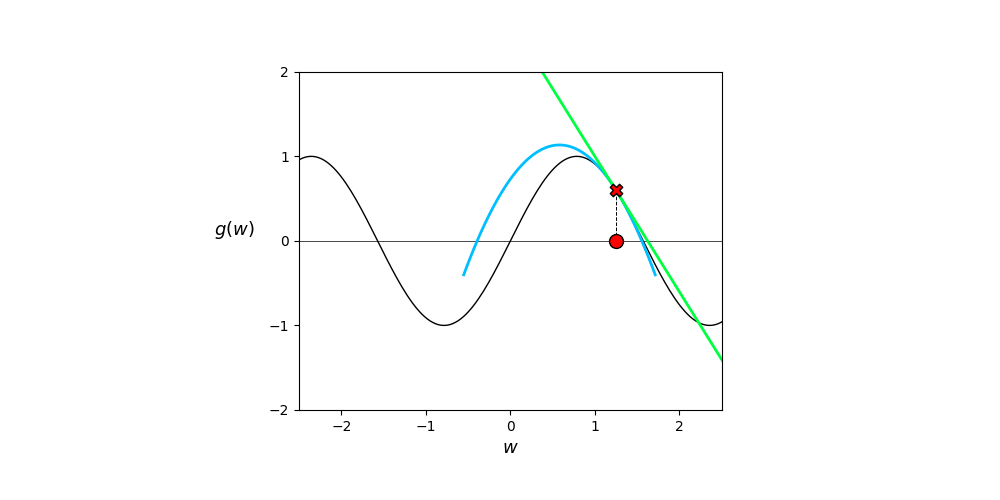
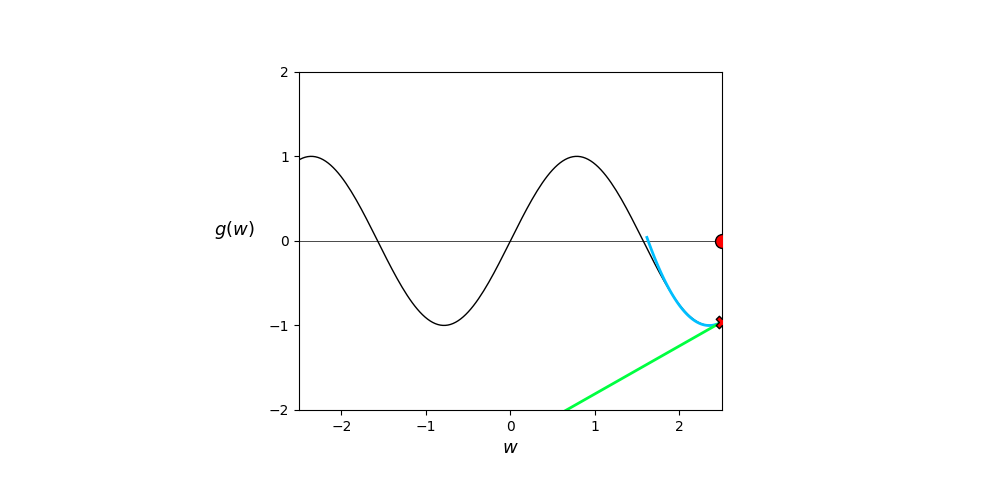

In [19]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(2*w)

# create an instance of the visualizer with this function 
taylor_viz = callib.taylor2d_viz.visualizer(g = g)

# run the visualizer for our chosen input function
taylor_viz.draw_it(first_order = True,second_order = True,num_frames = 5)

We also saw in our *vital elements of calculus* series how this natural quadratic approximation generalizes for functions $g(\mathbf{w})$ taking in $N$ inputs, where at a point $\mathbf{v}$ the analagous second order Taylor series approximation looks like

\begin{equation}
h(\mathbf{w}) = g(\mathbf{v}) + \nabla g(\mathbf{v})^T(\mathbf{w} - \mathbf{v}) + \frac{1}{2}(\mathbf{w} - \mathbf{v})^T \nabla^2 g\left(\mathbf{v}\right) (\mathbf{w} - \mathbf{v})
\end{equation}

where $\nabla g(\mathbf{v})$ is the *gradient* vector of first order partial derivatives, and $\nabla^2 g(\mathbf{v})$ is the $N\times 1$  the *Hessian* matrix containing second order partial derivatives of $g$ at $\mathbf{v}$.  Like the analagous single-input version, this quadratic is a much better local approximator of $g$ near the point $\mathbf{v}$, matching its convexity / concavity there (i.e., if $g$ is convex / concave at $\mathbf{v}$ so too is the second order approximation).

#### <span style="color:#a50e3e;">Example 2. </span>  Multi-input Taylor series of a sinusoid

In the Python cell below we show an example comparing first and second order approximations (in green and blue respectively) using the sinusoid $g(w_1,w_2) = \text{sin}\left(w_1\right)$ at the point $\mathbf{v} = \begin{bmatrix} -1.5 \\ 1 \end{bmatrix}$.  Clearly the second order approximation provides a better local representation of the function here.

<IPython.core.display.Javascript object>


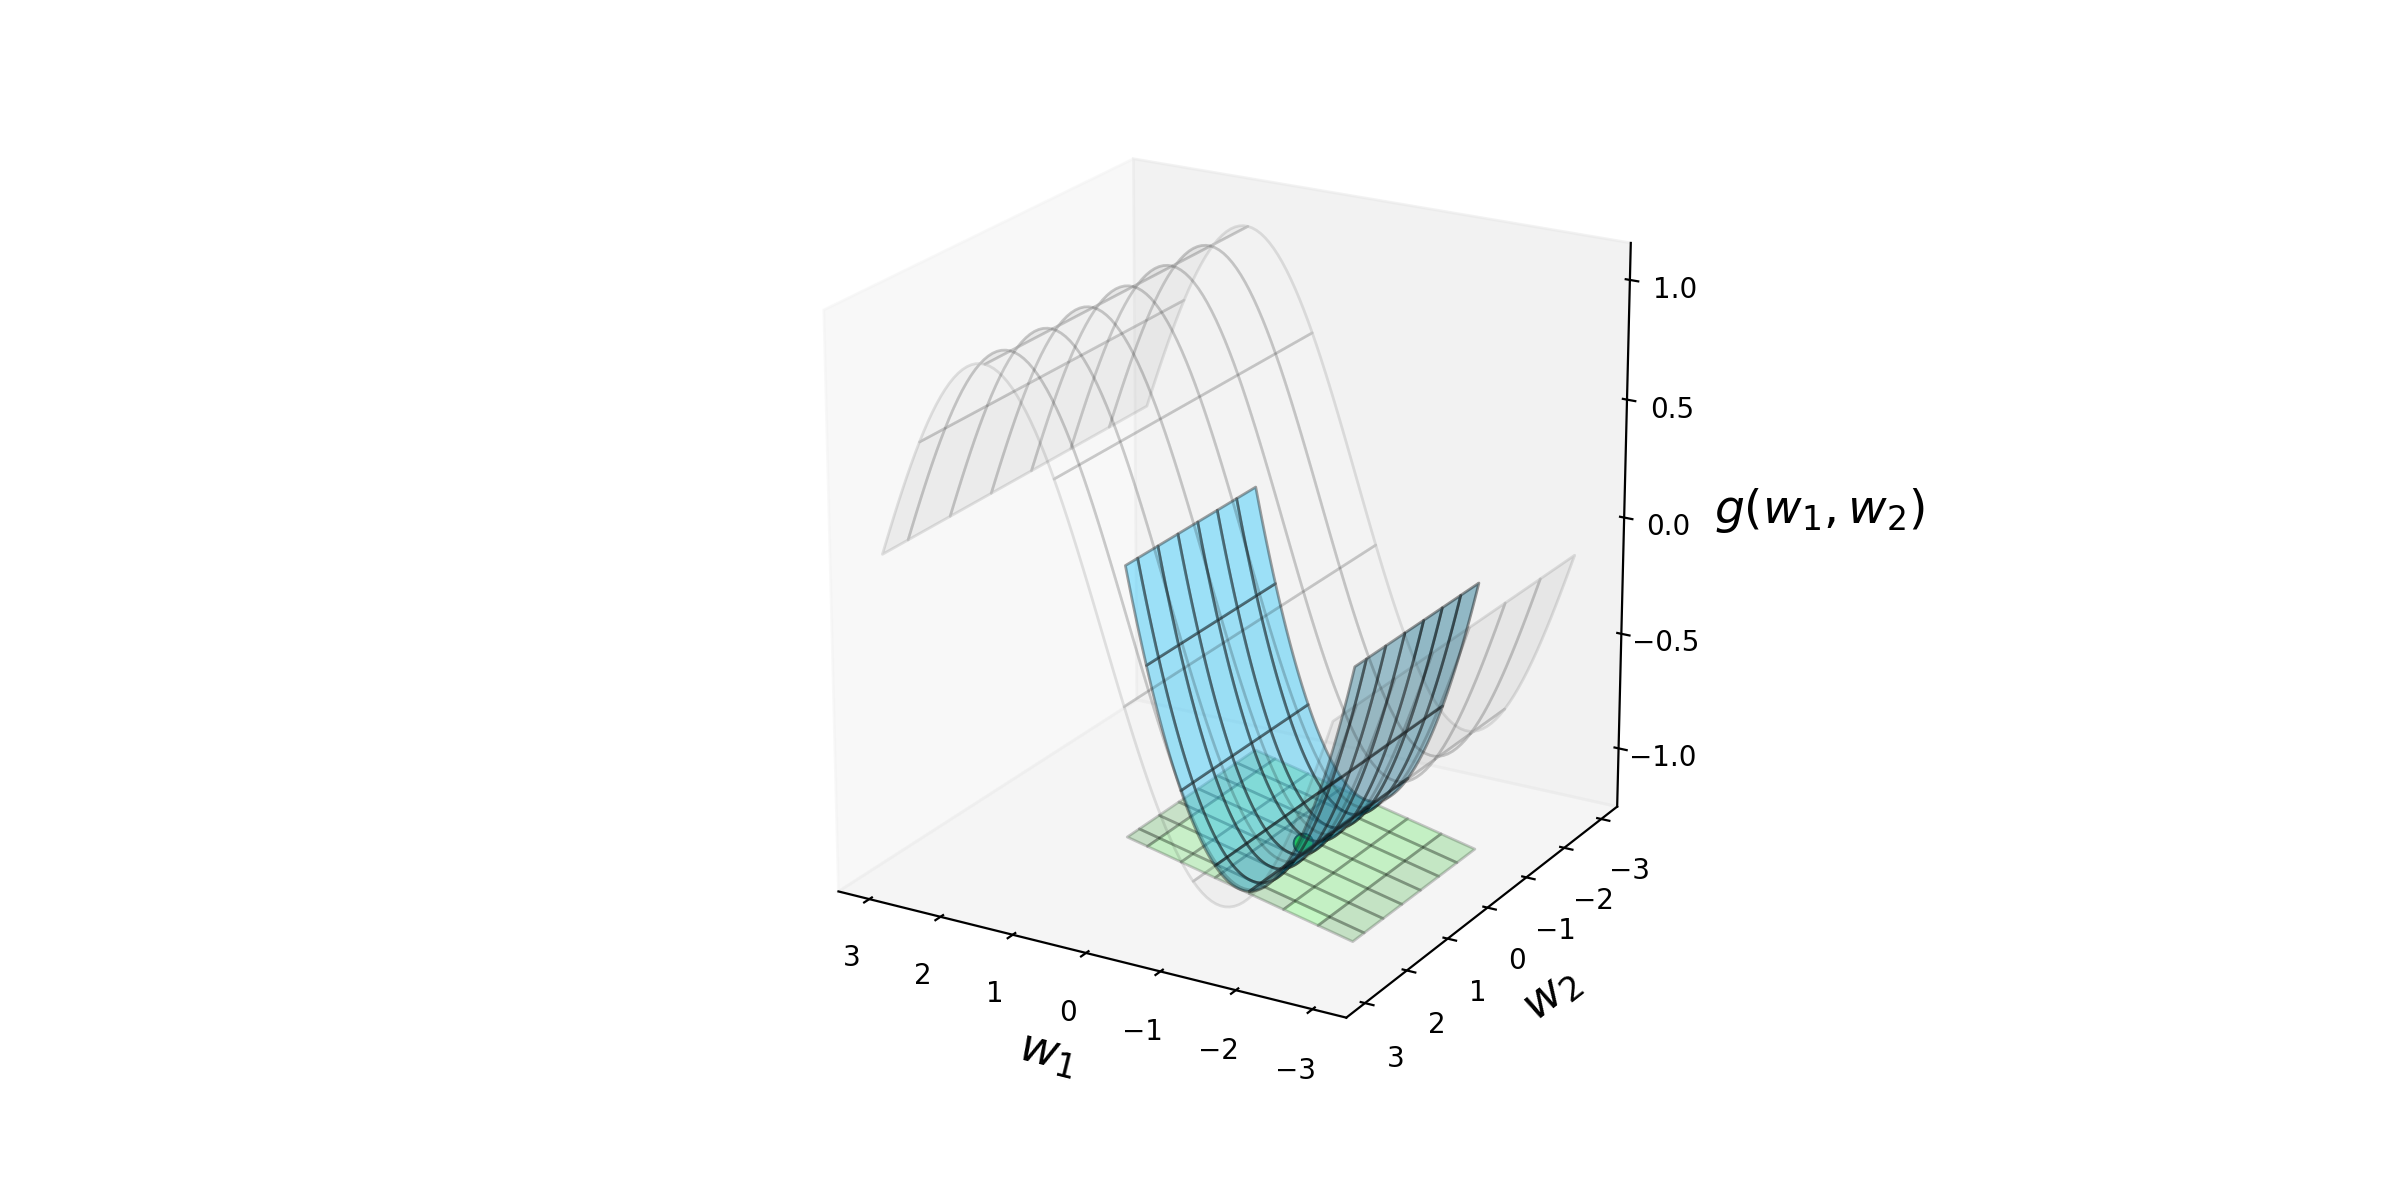

In [7]:
# create a function and point to compute approximation
g = lambda w: np.sin(w[0])
w_val = [-1.5,1]
view = [20,120]

# load in function to examine
viz = callib.taylor3d_viz.visualizer(g = g)

# start examination
viz.draw_it(w_val = w_val,view = view,first_order = True, second_order = True);

----

In analogy to gradient descent, what would it mean to move in the 'descent direction' defined by the second order approximation at $\mathbf{v}$?  Well unlike a hyperplane, a quadratic does not itself have such a descent direction.  However it does have *stationary points* which are global minima when the quadratic is *convex*.  What would happen if - starting at the point $\mathbf{v}$ - we moved to such a point (or at least in its direction)?  

Let us first look at the single input case.  Using the first order condition for optimality (also discussed in our *vital elements of calculus* series) we can solve for this stationary point by setting the first derivative of $h(w)$ to zero and solving.  Doing this we compute the point $w^{\star}$

\begin{equation}
w^{\star} = v - \frac{\frac{\mathrm{d}}{\mathrm{d}w}g(v)}{\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(v)}
\end{equation}

#### <span style="color:#a50e3e;">Example 1. </span>  Descent via the minimum of second order taylor series


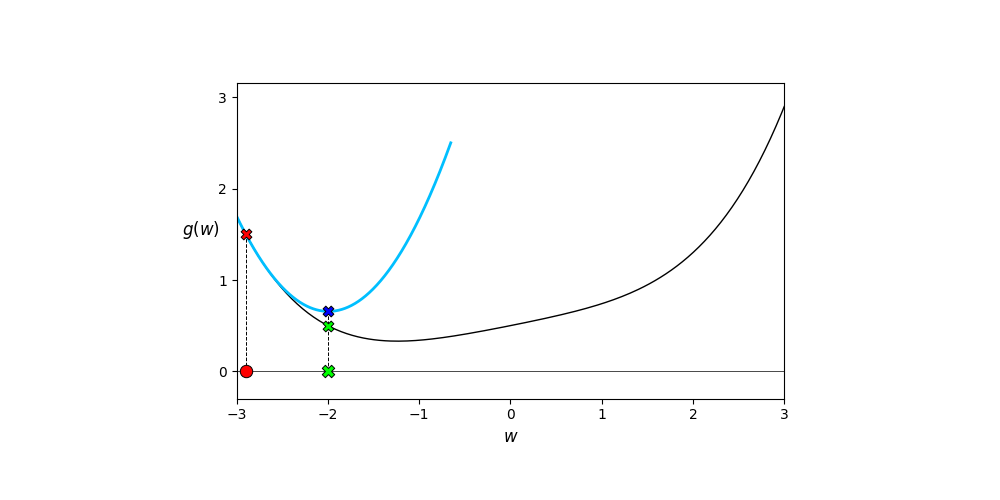
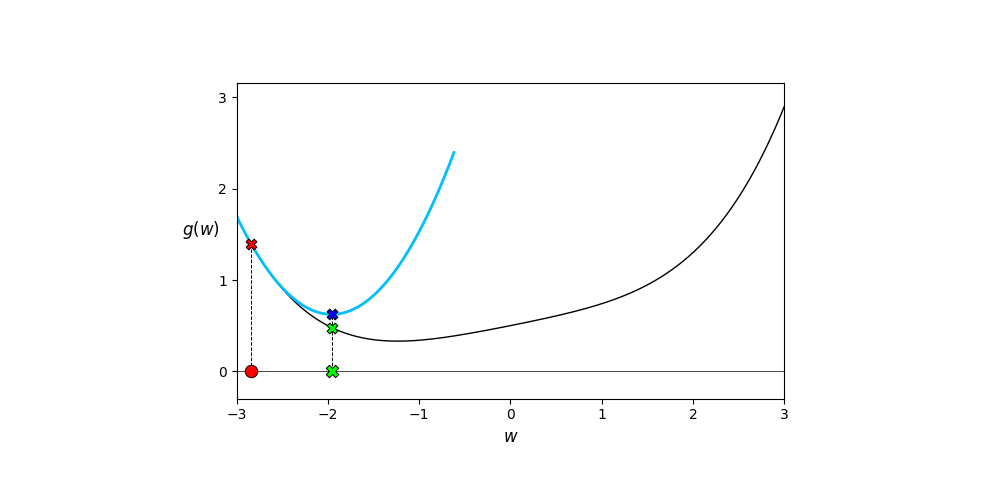
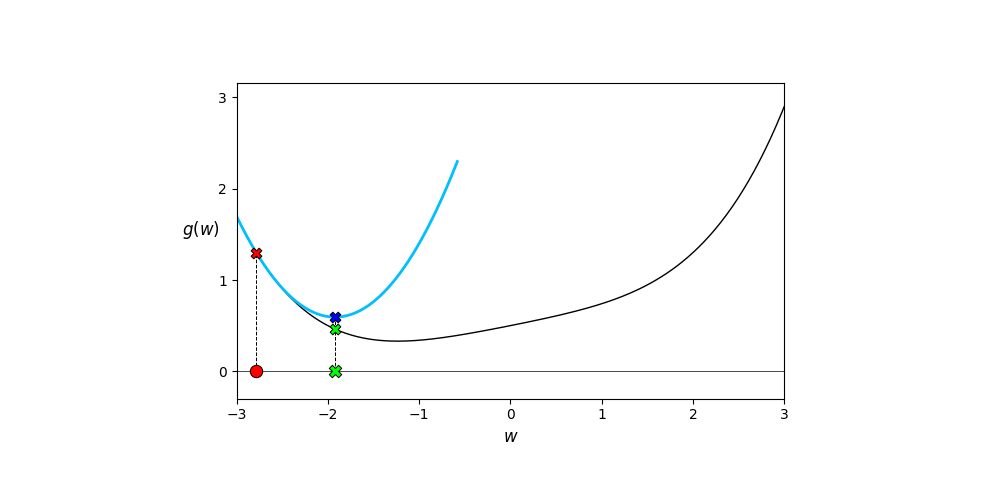
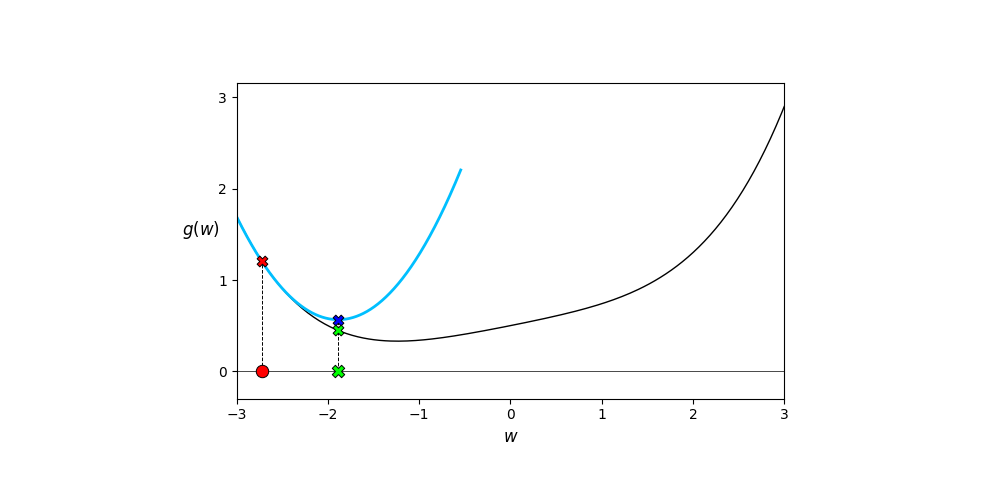
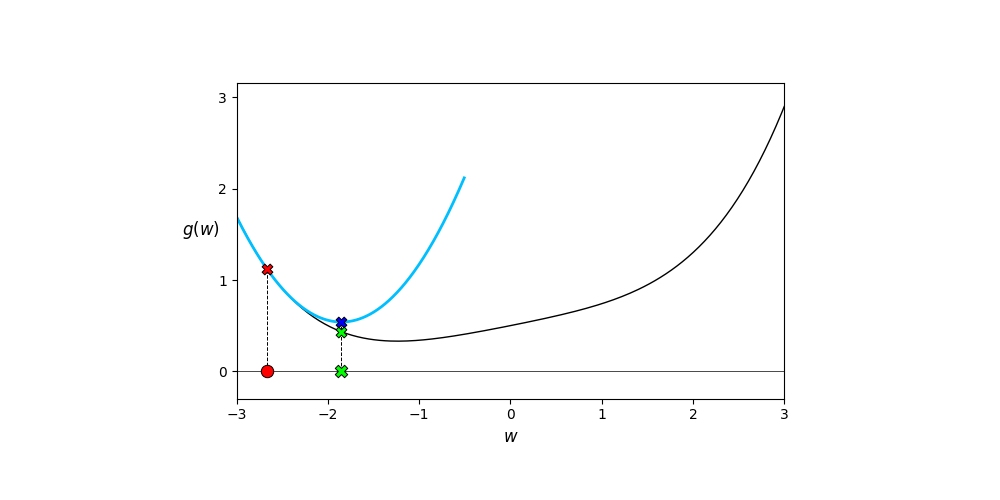
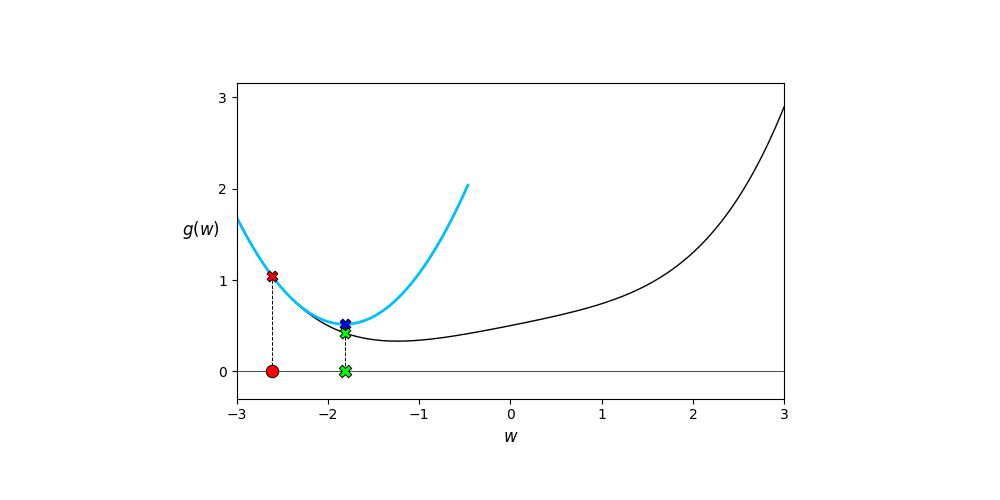
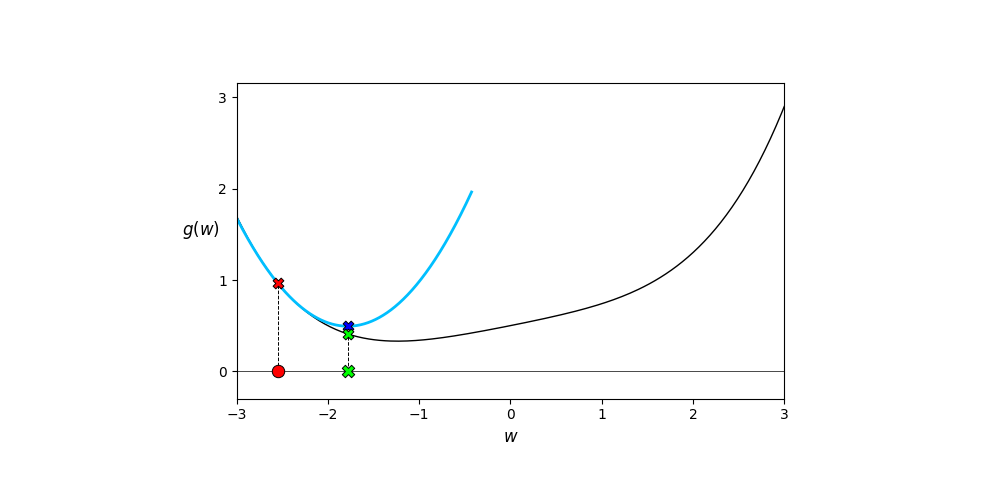
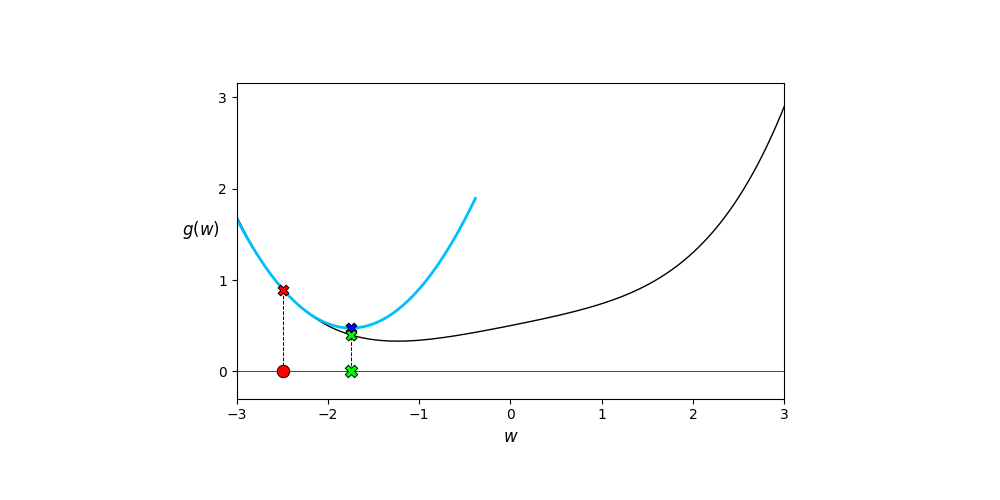
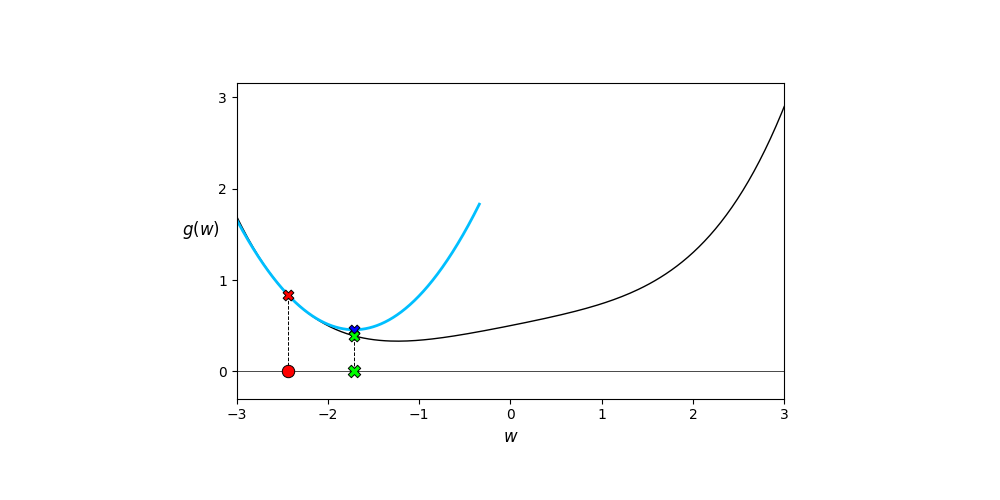
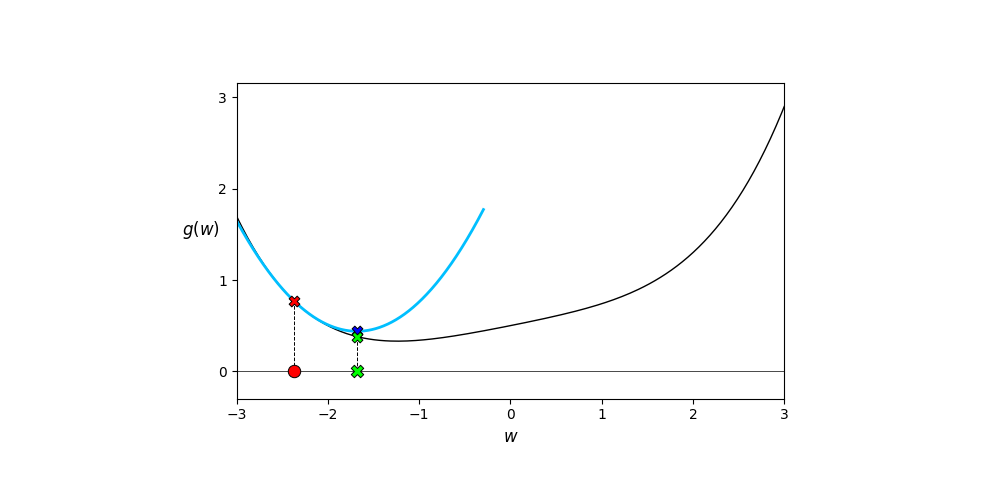
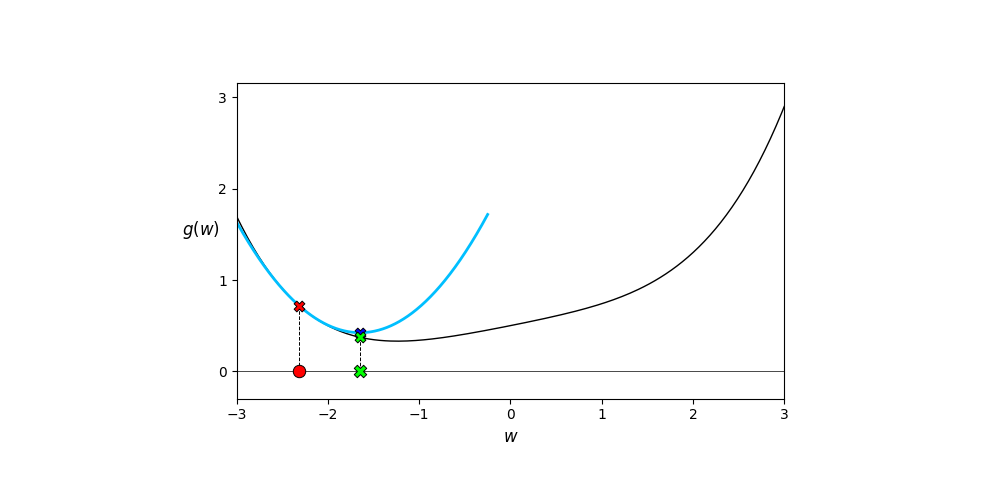
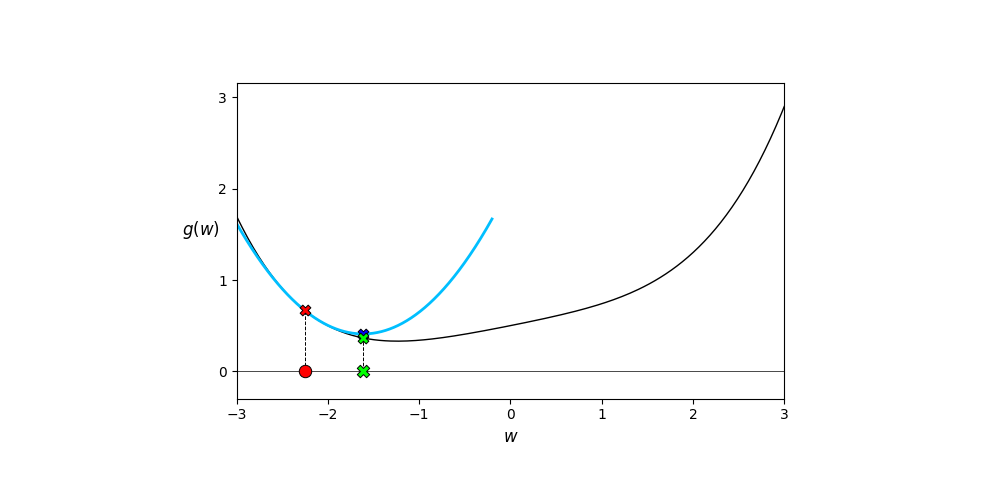
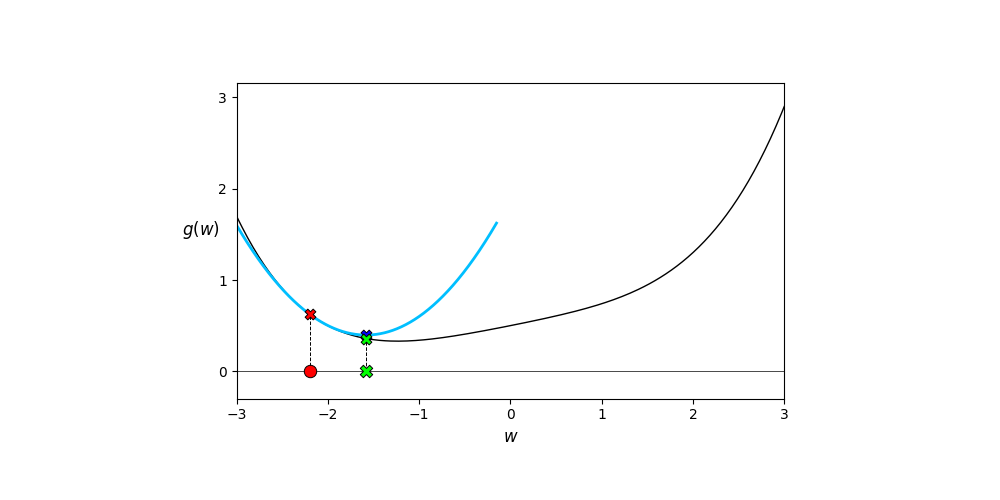
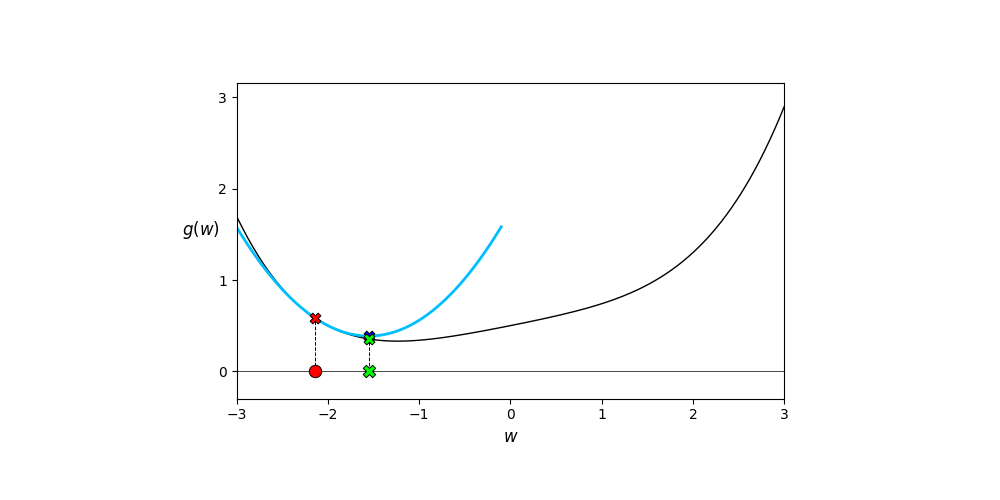
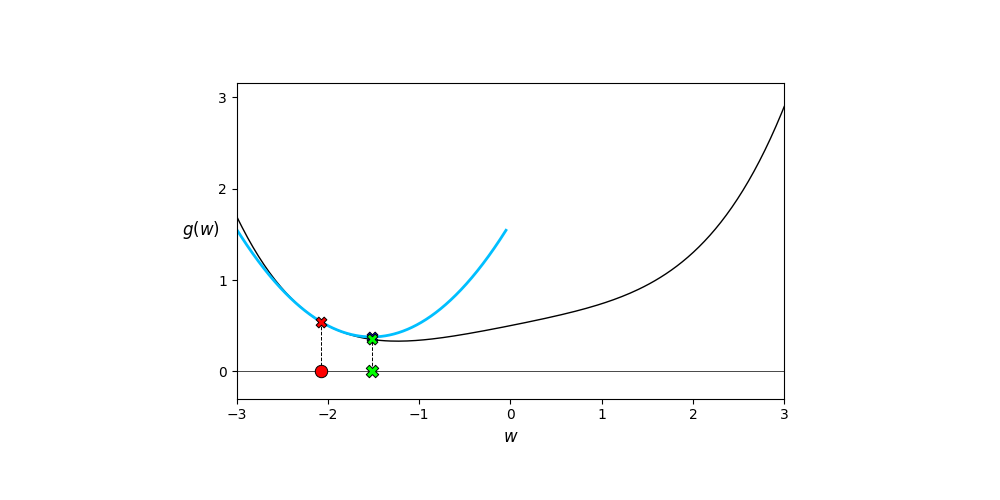
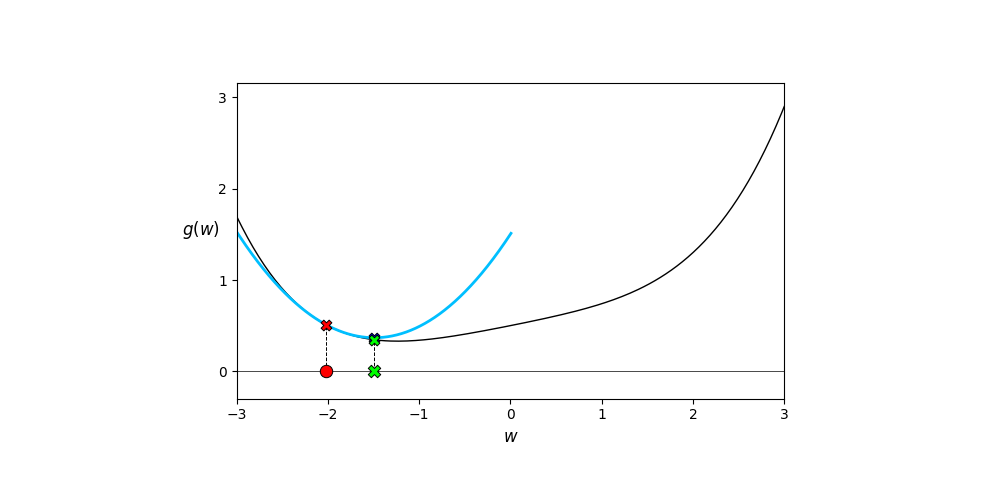
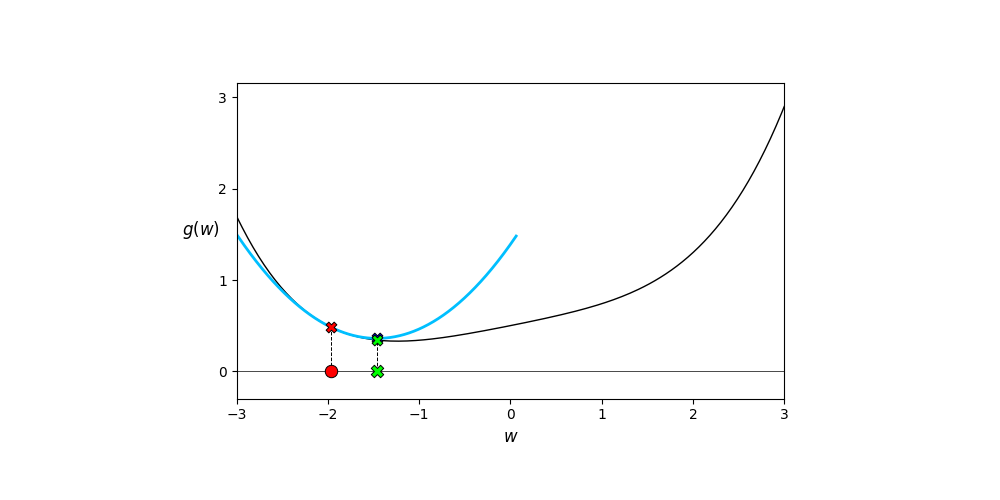
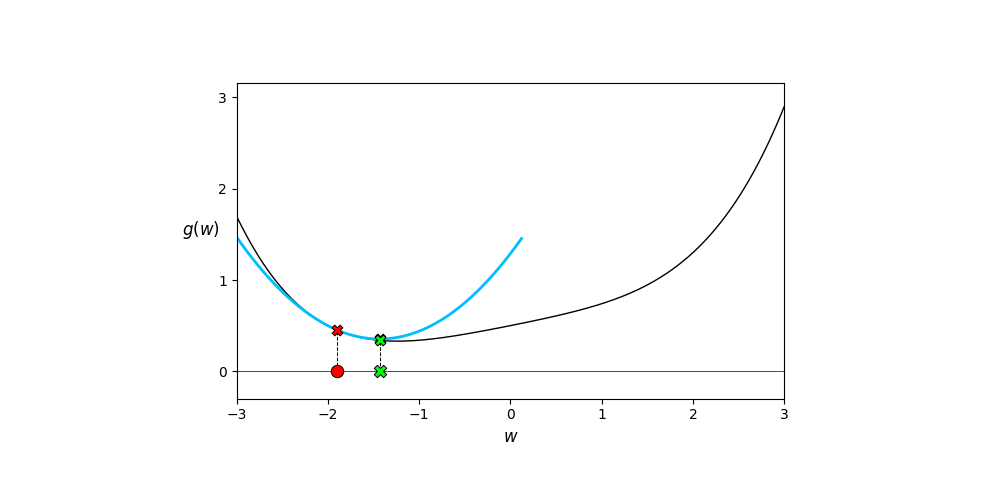
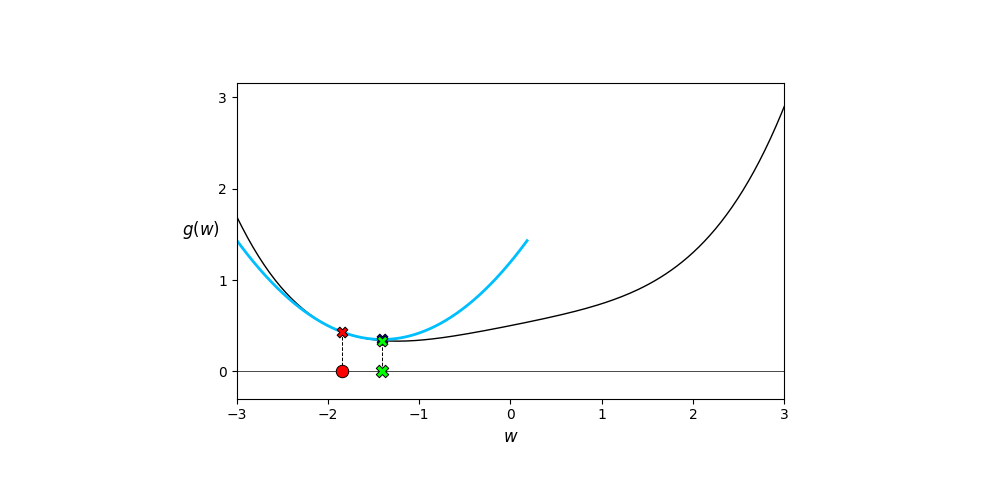
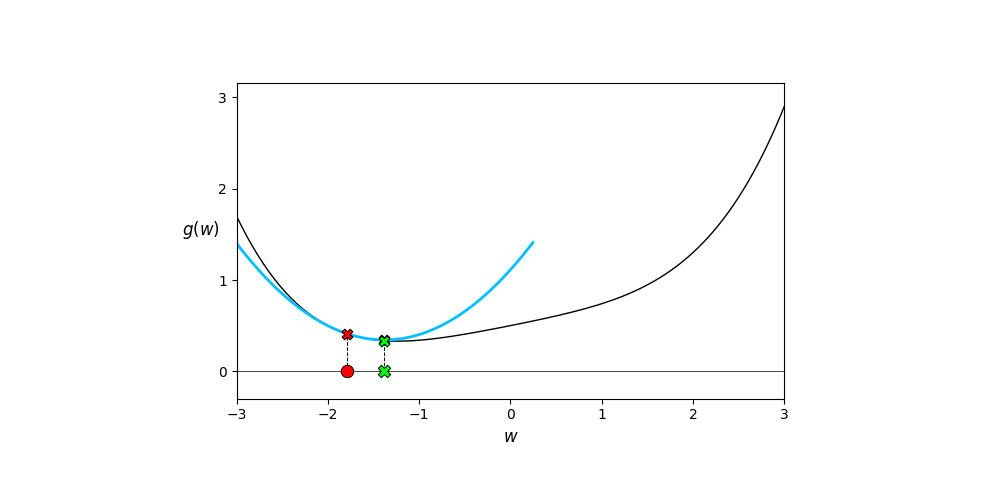
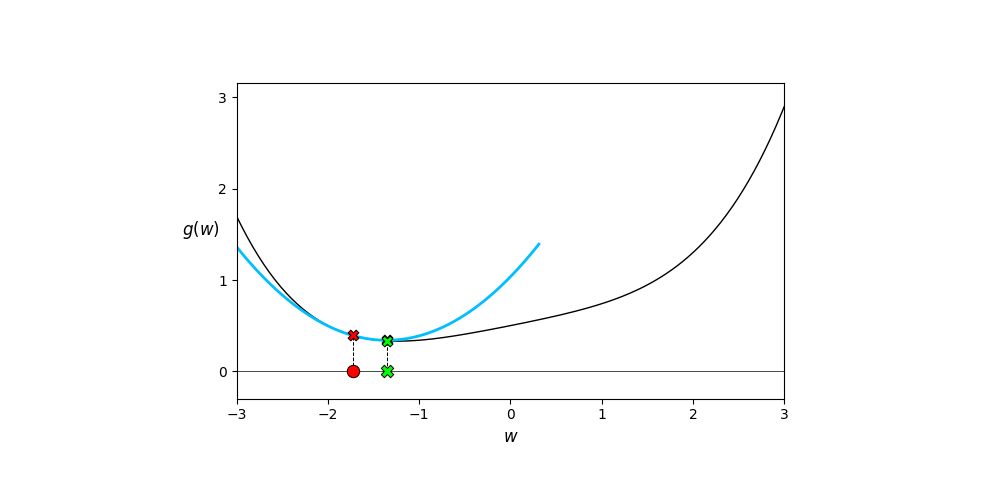
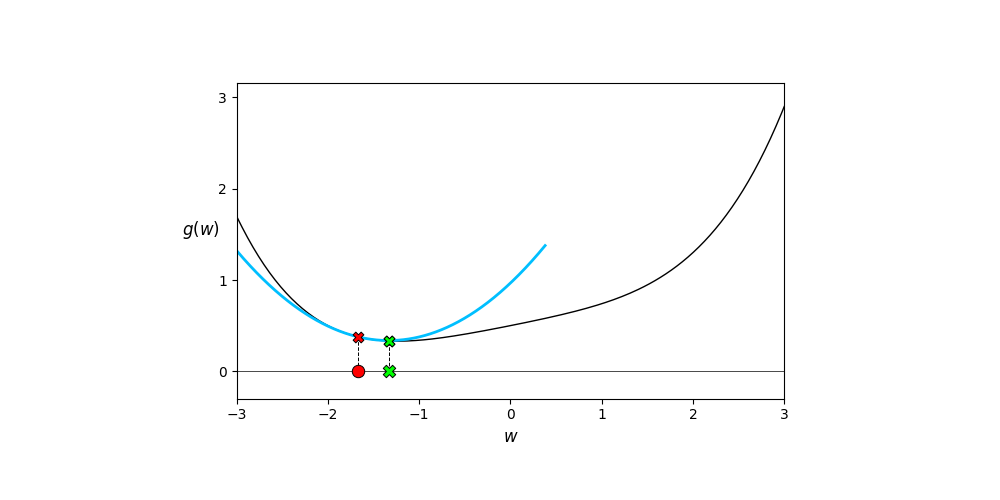
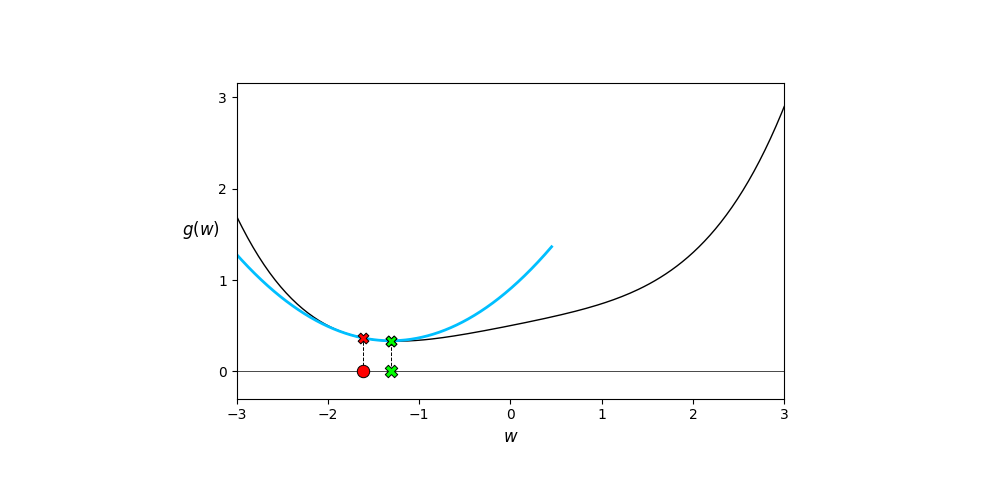
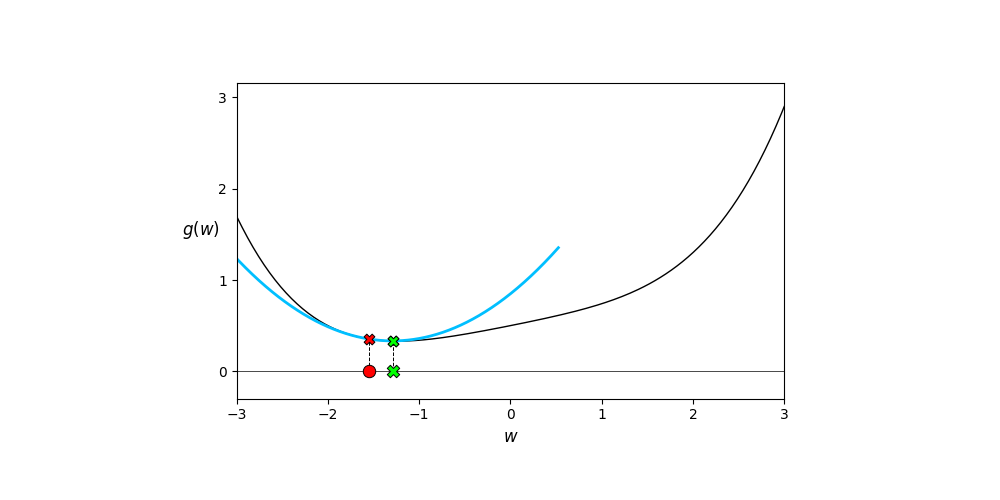
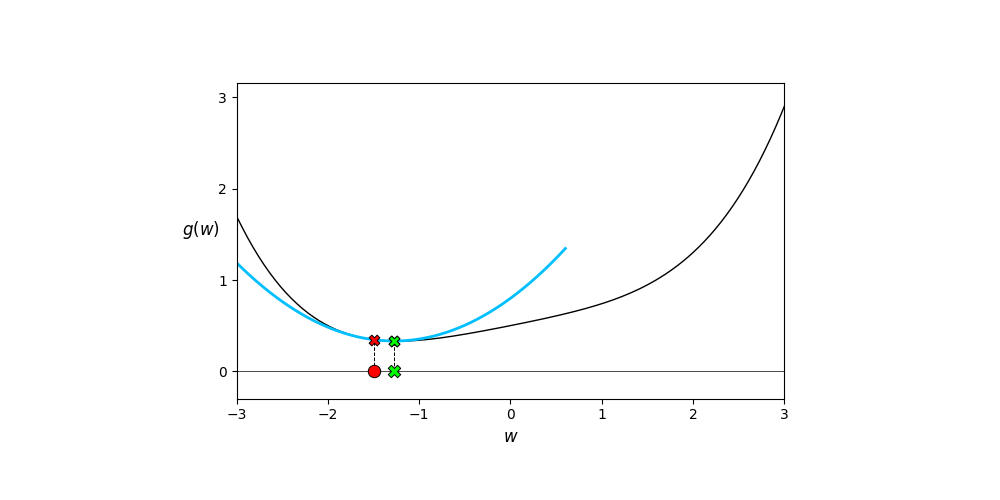
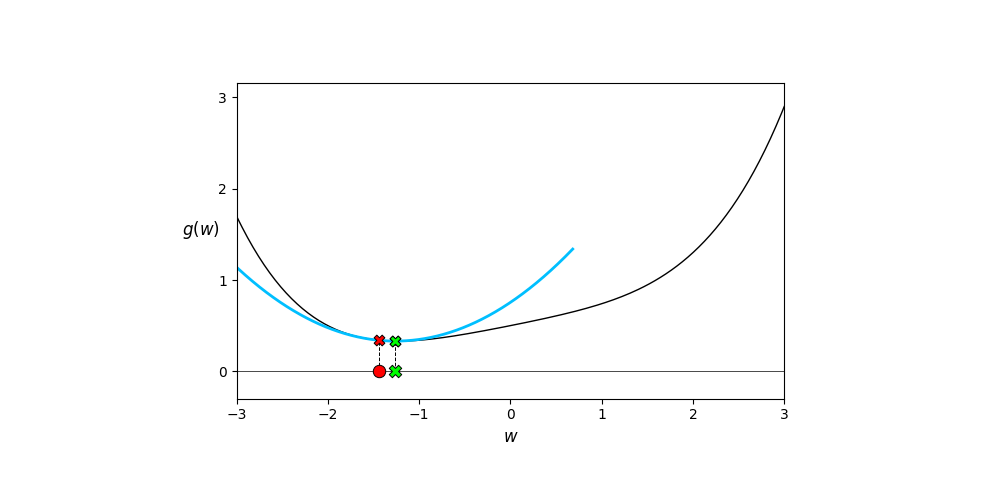
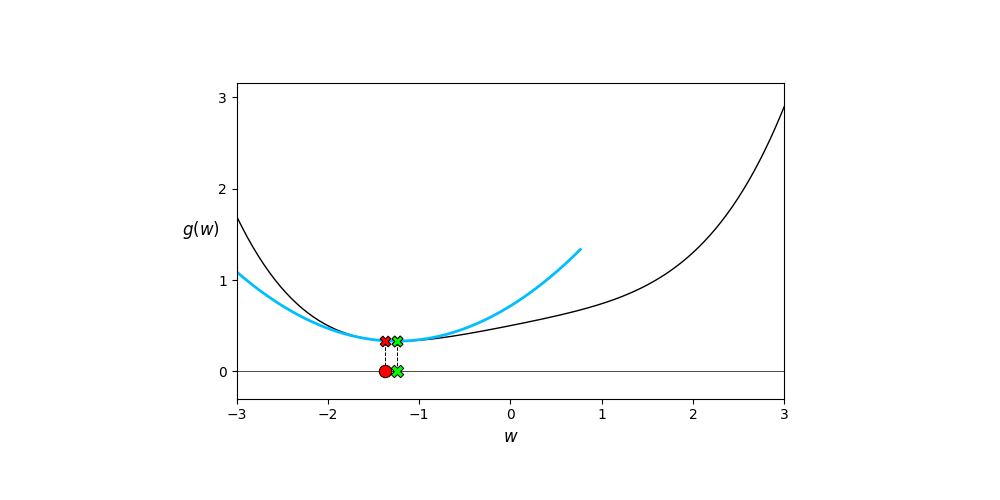
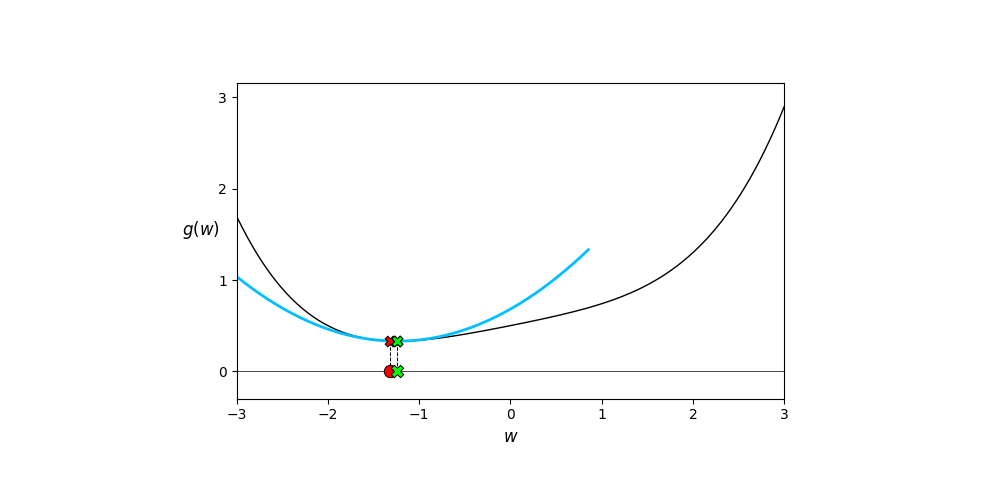
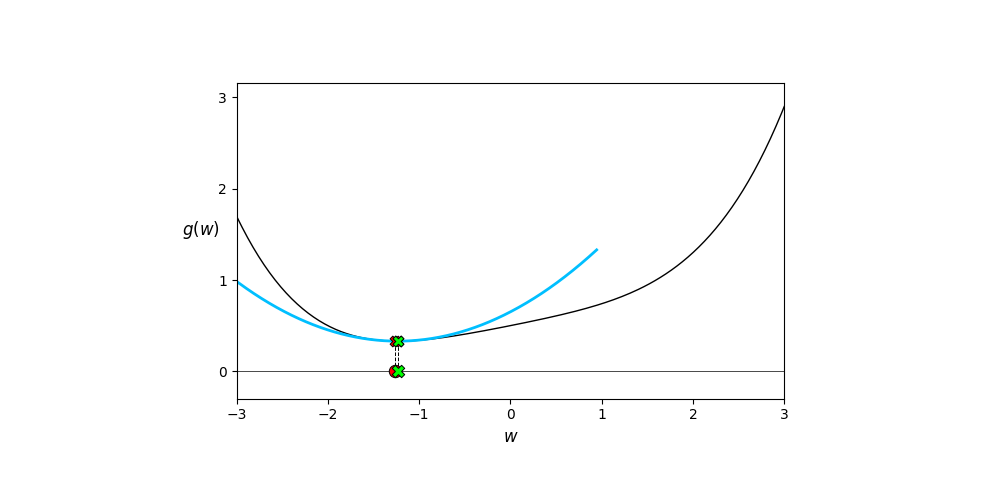
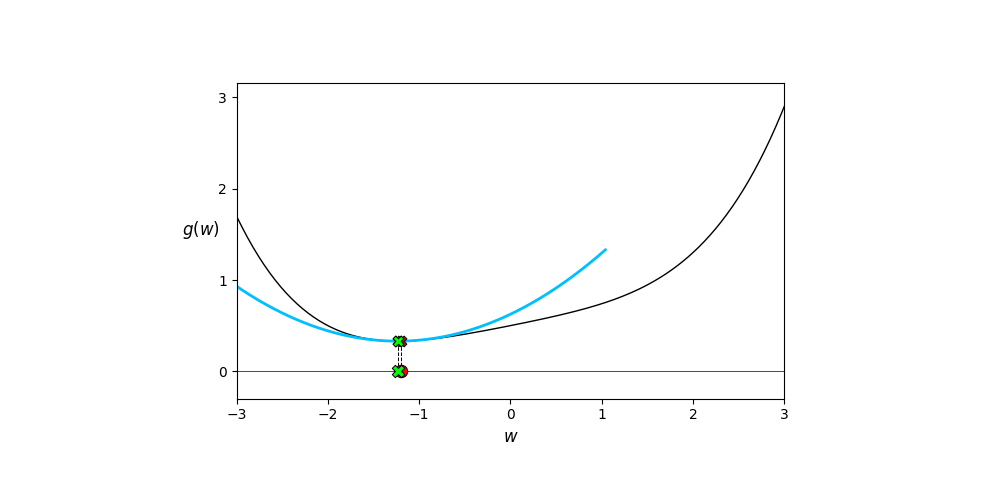
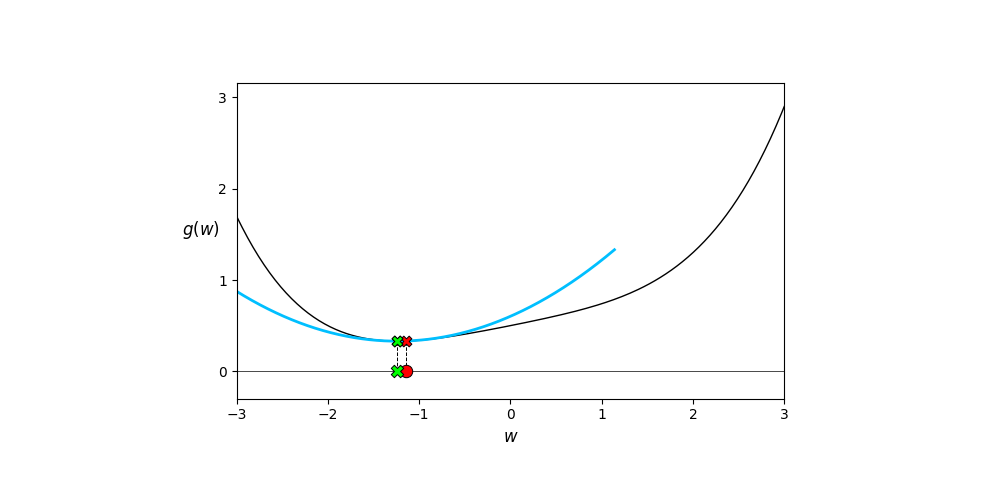
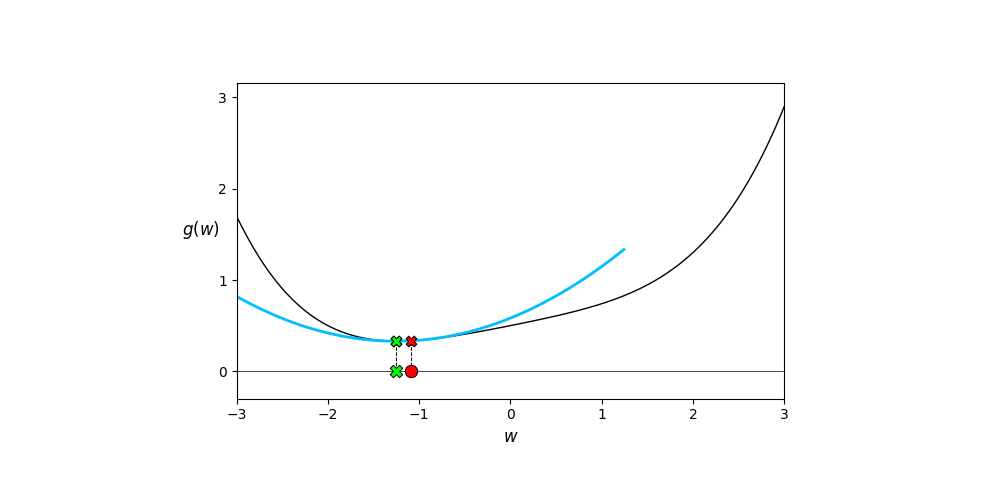
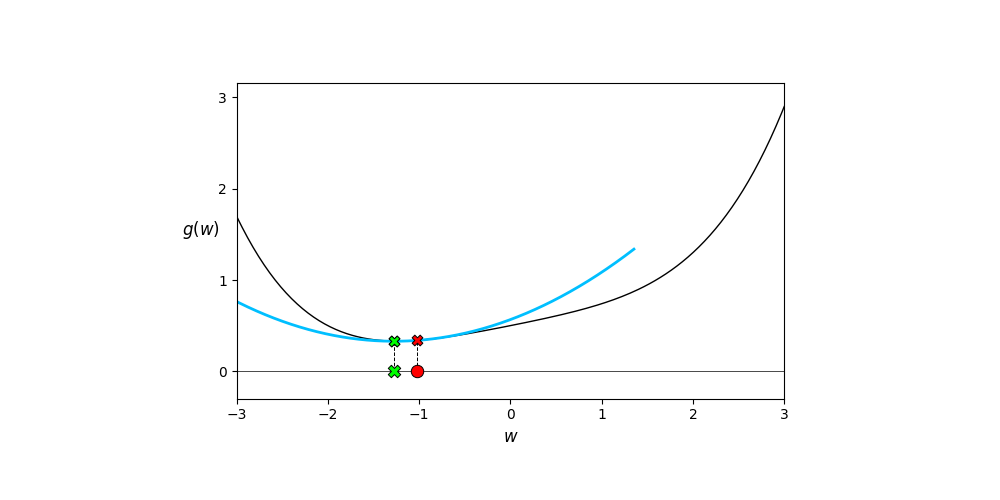
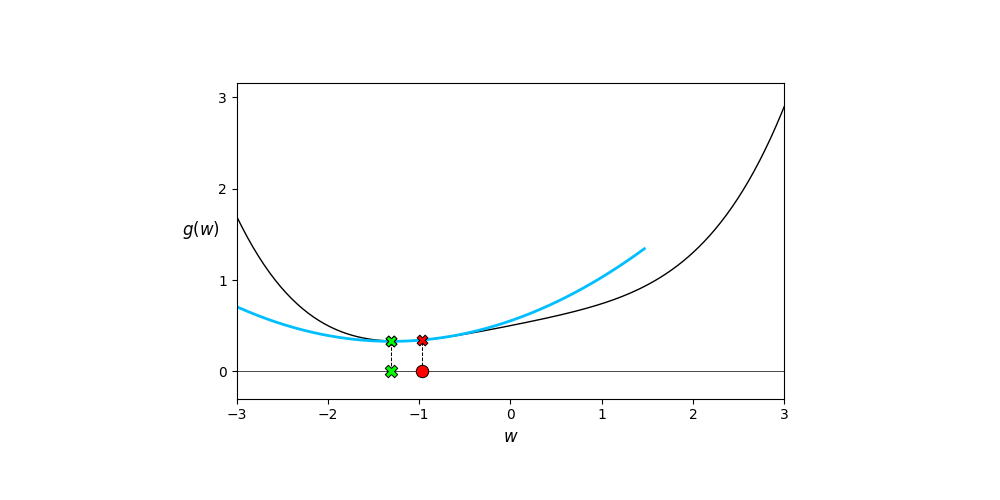
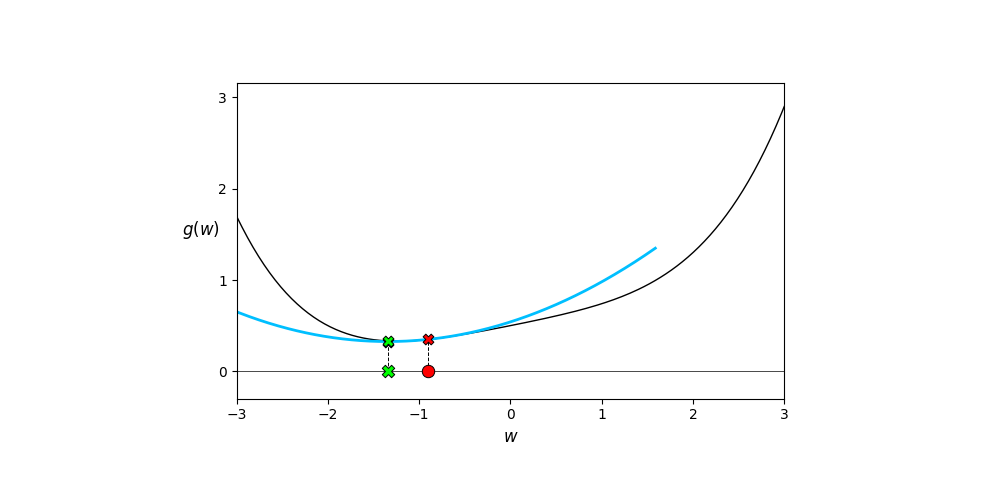
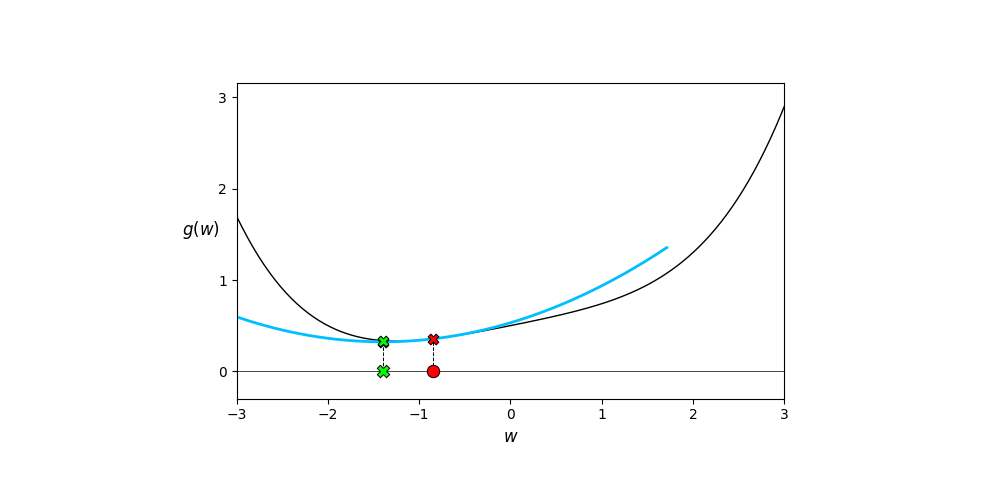
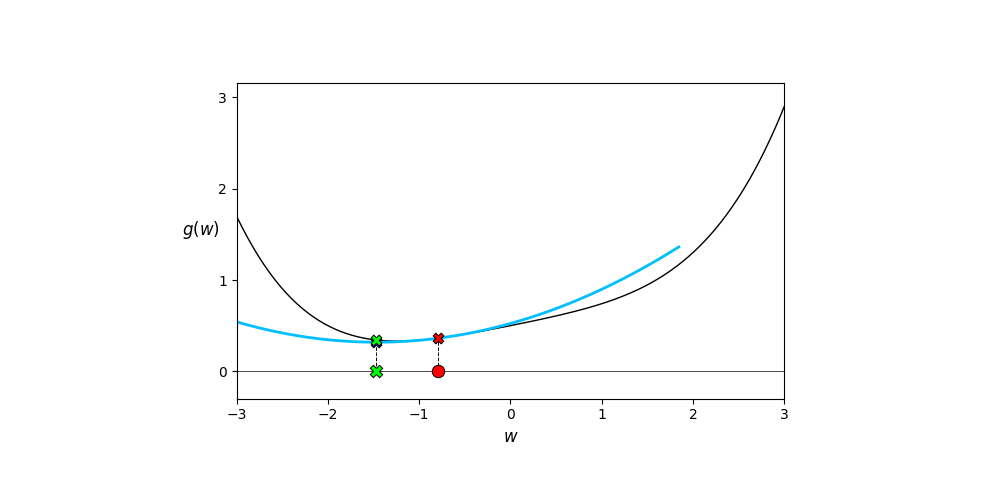
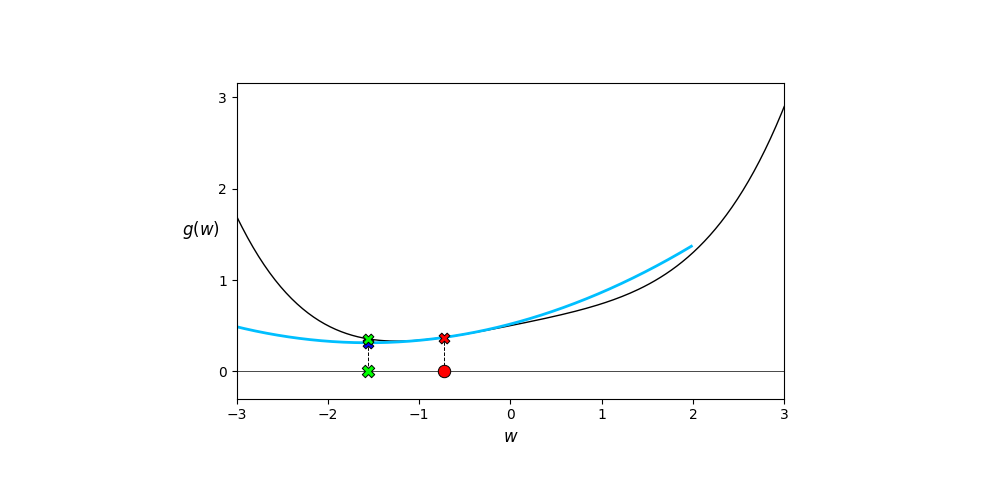
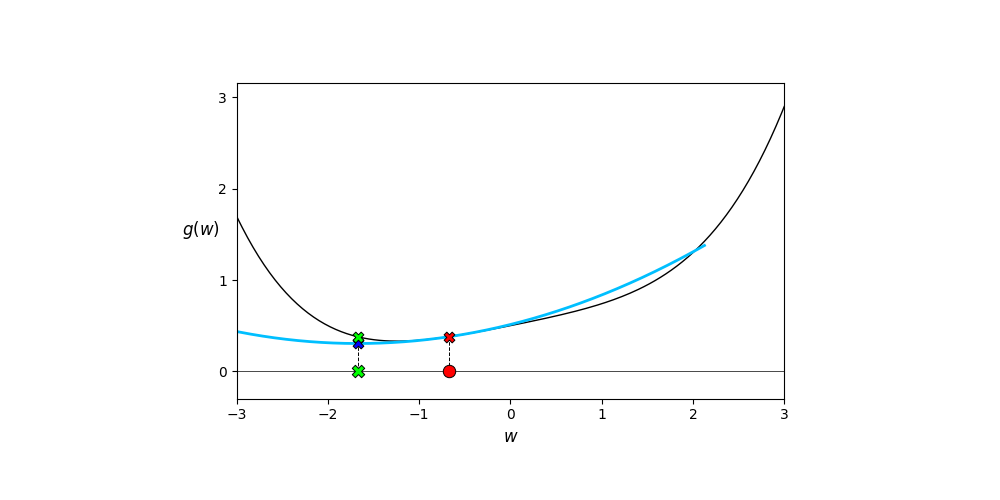
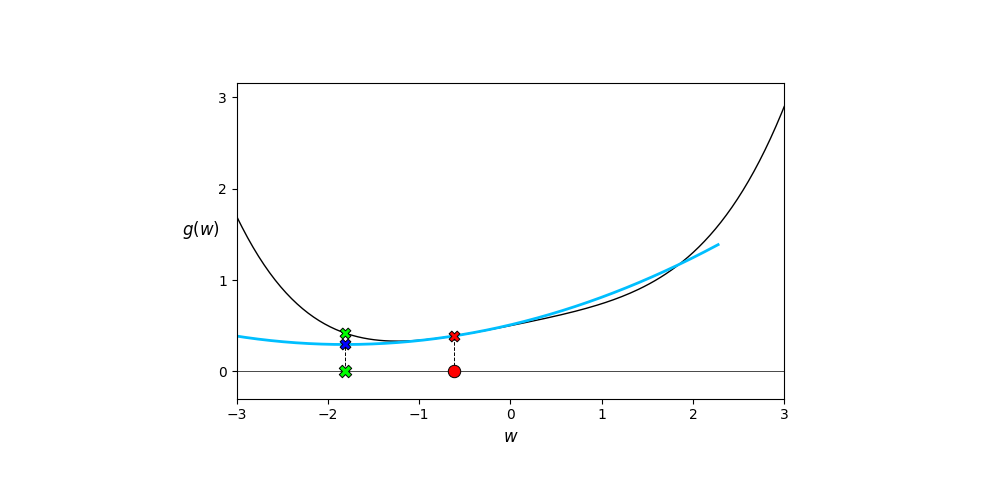
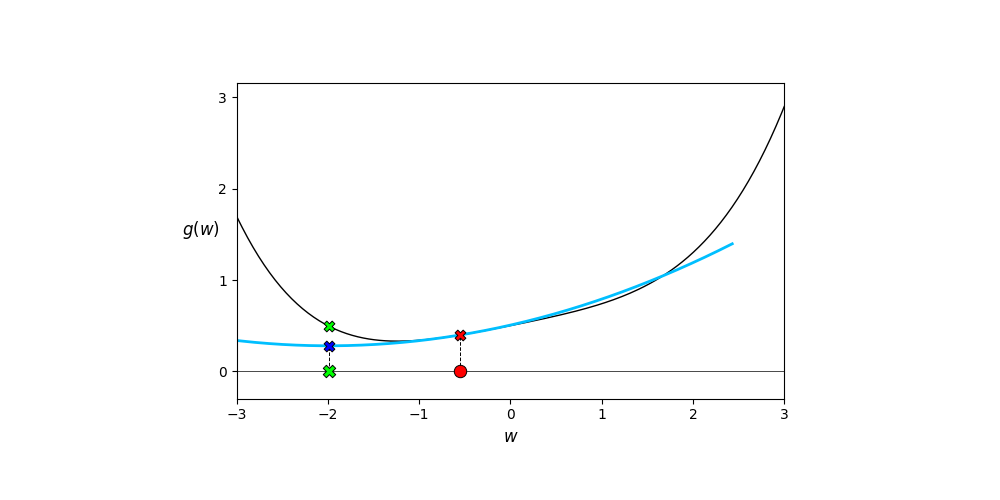
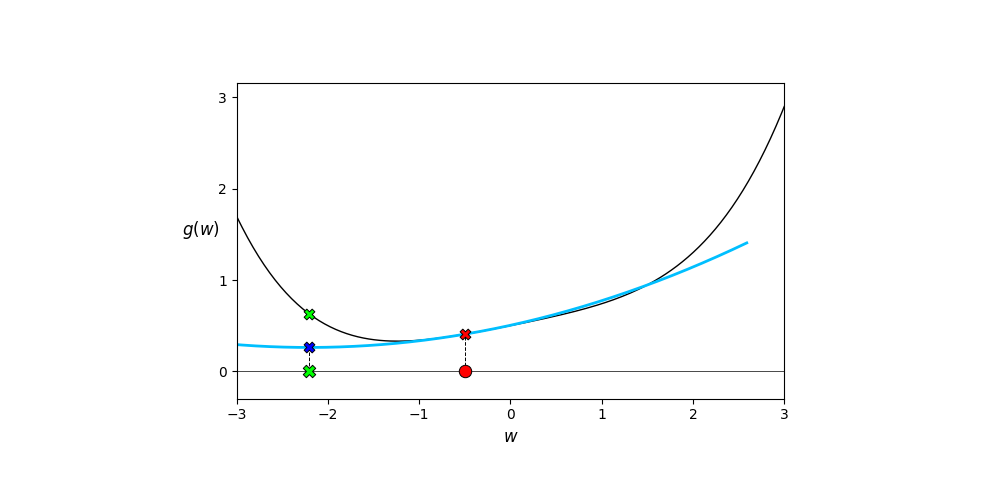
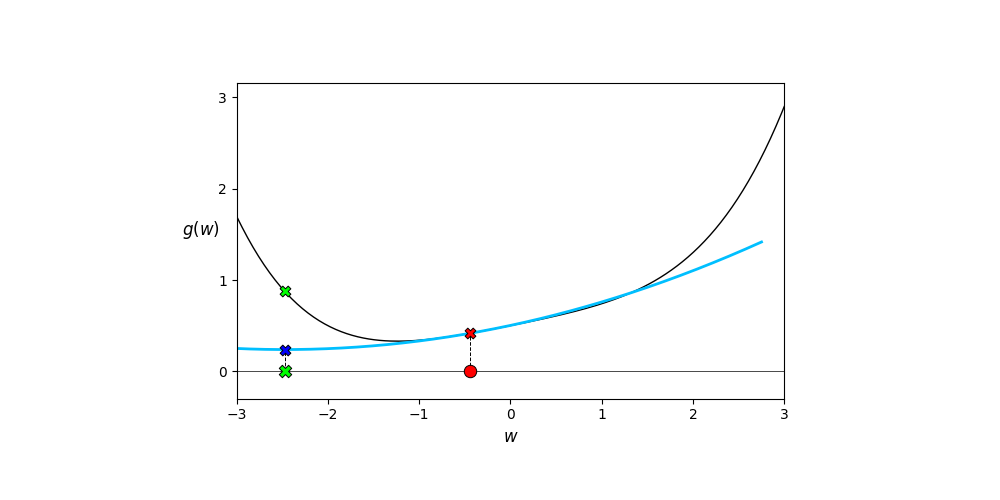
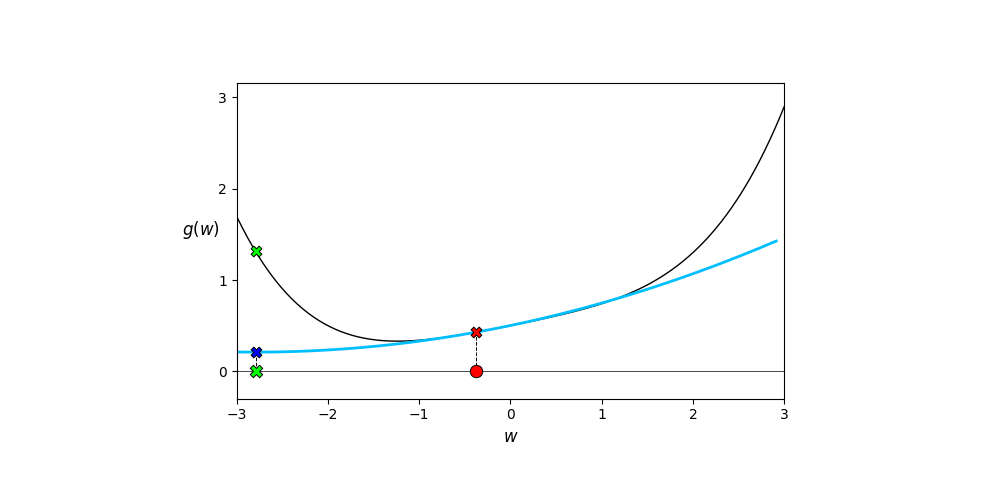
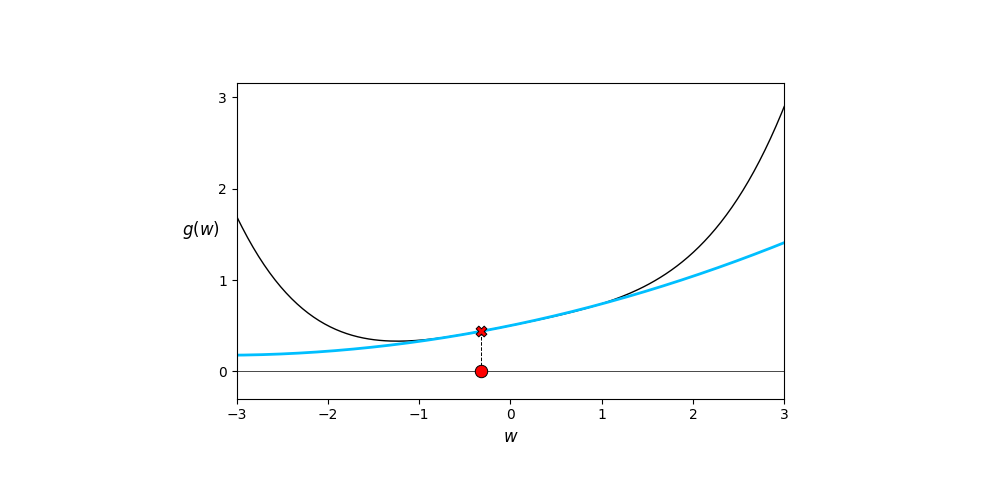
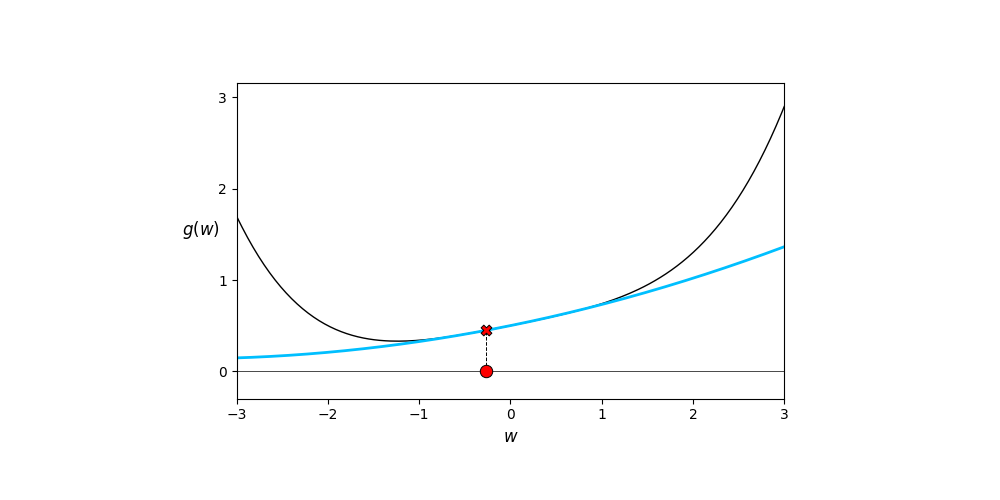
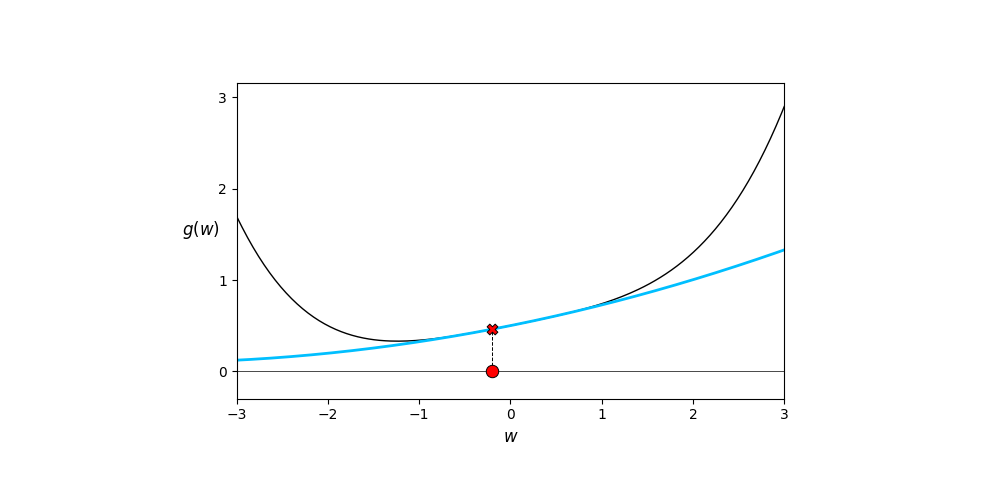
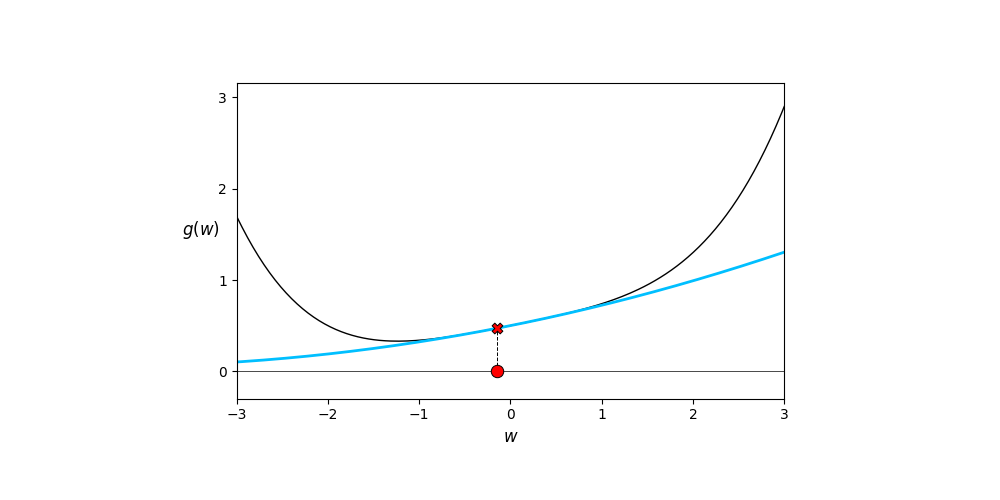
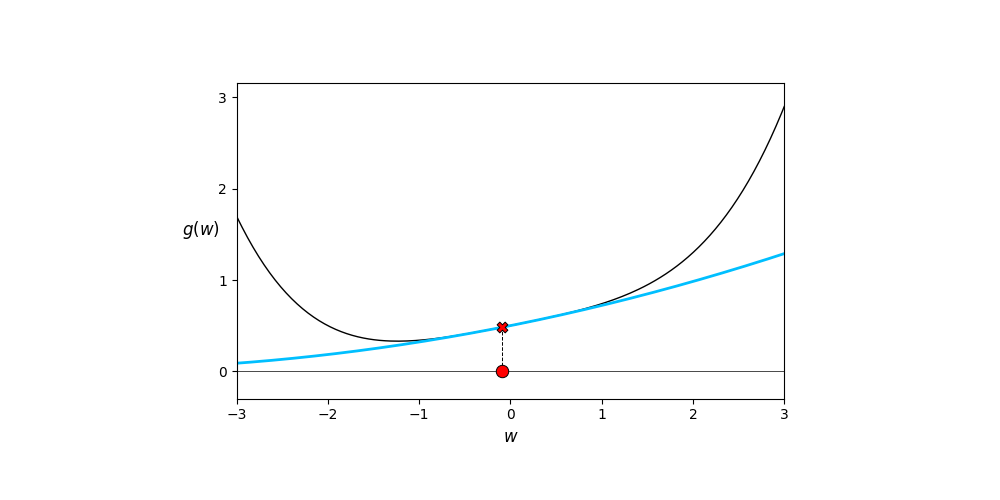
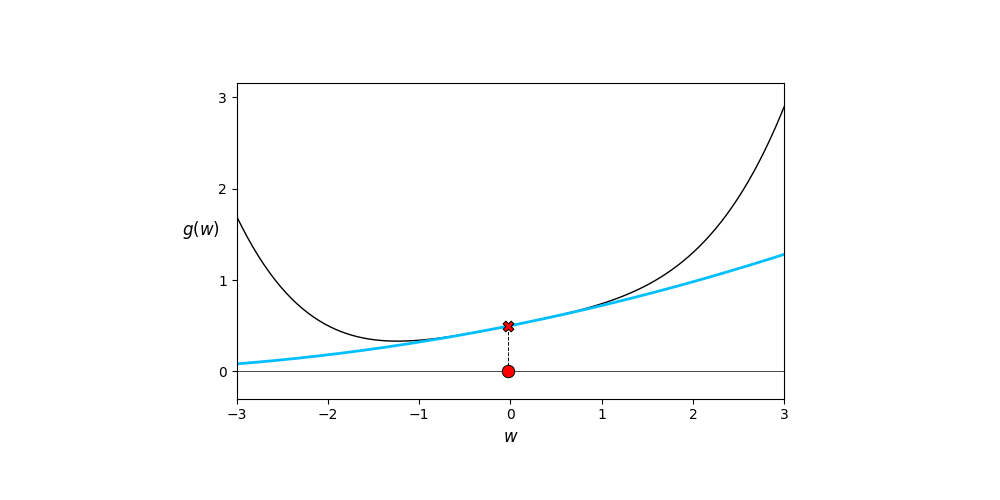
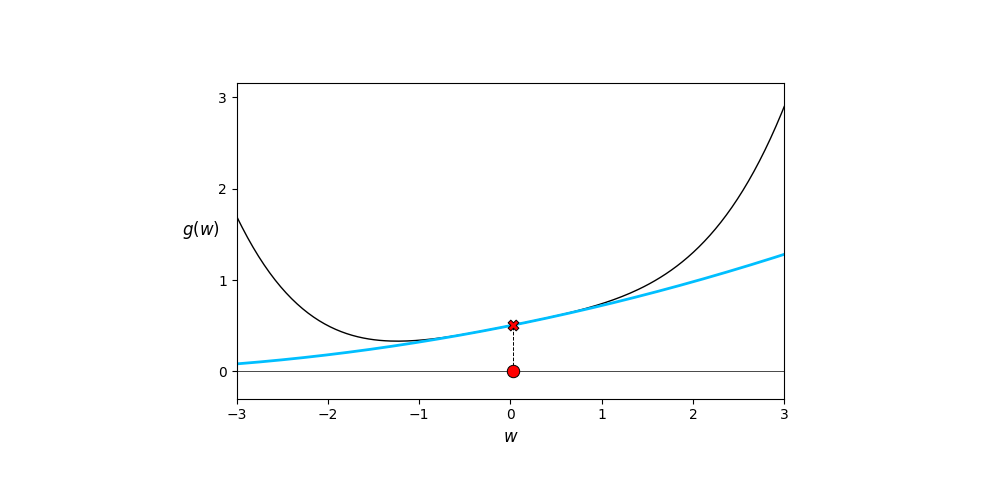
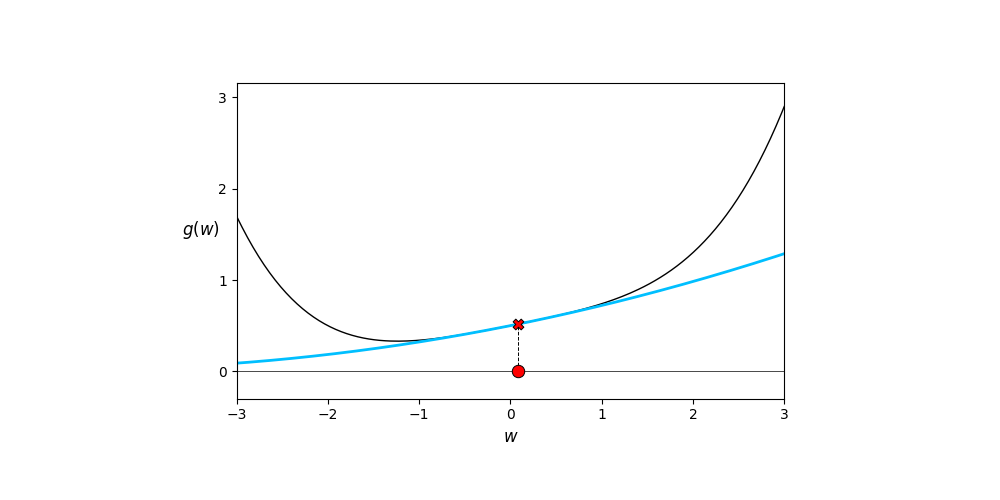
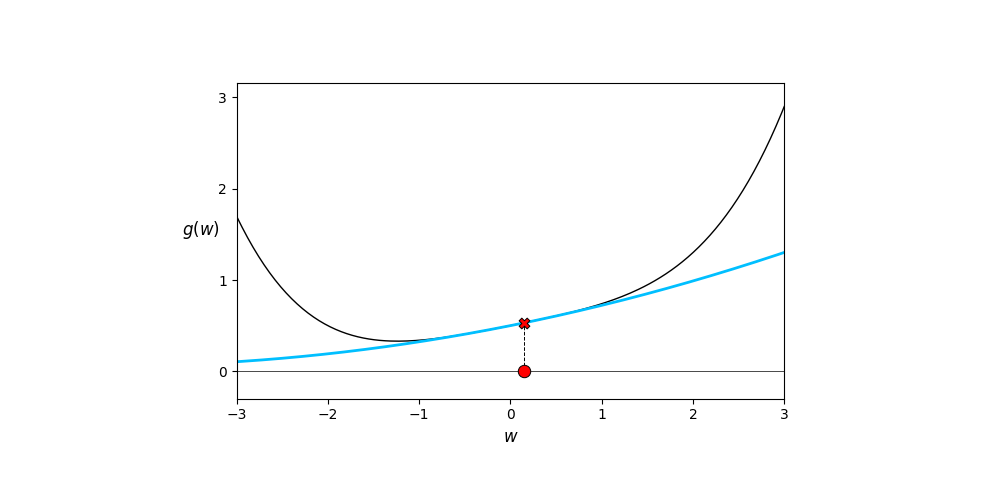
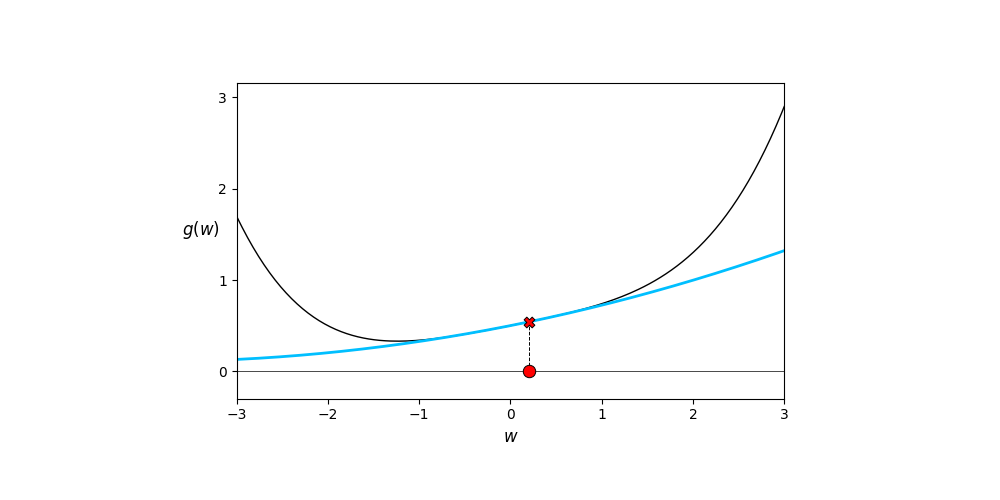
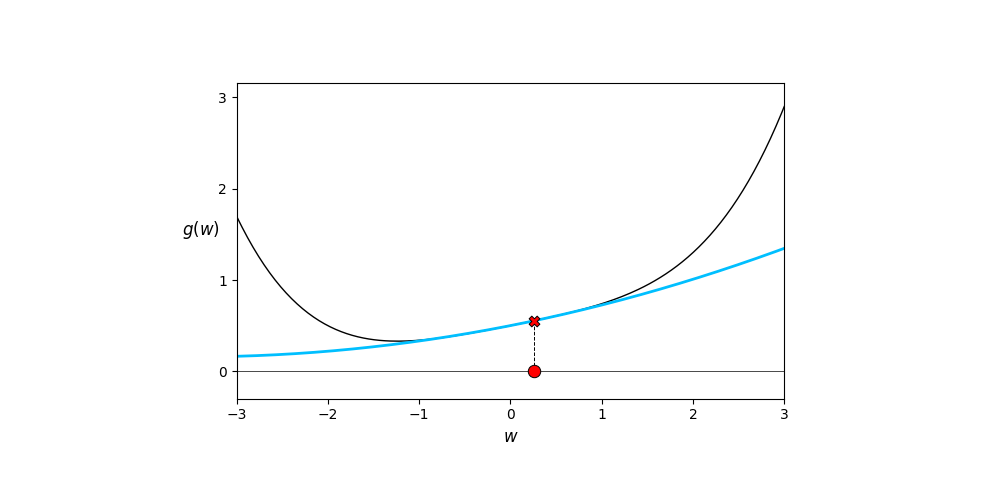
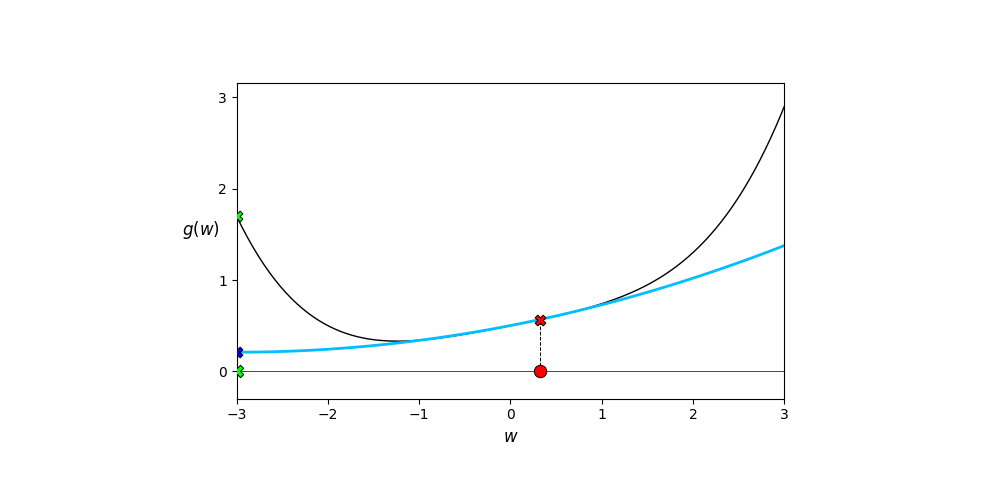
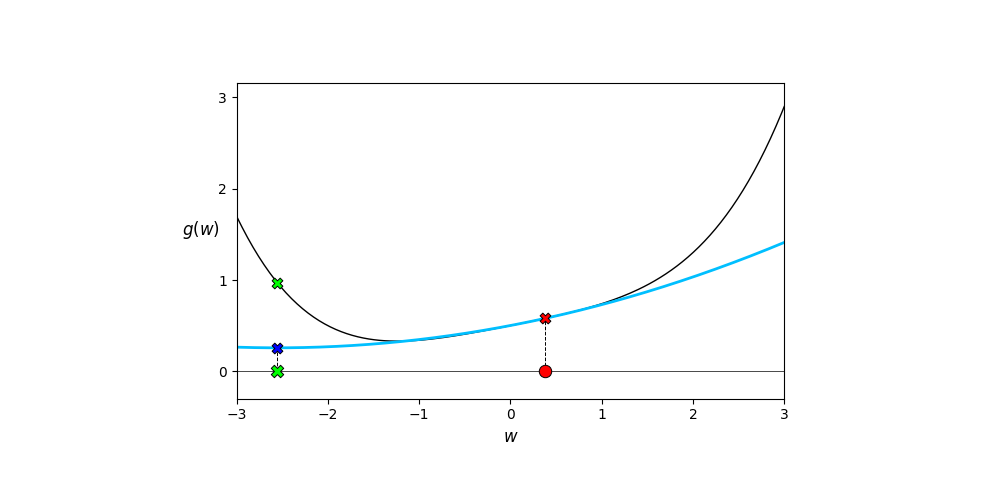
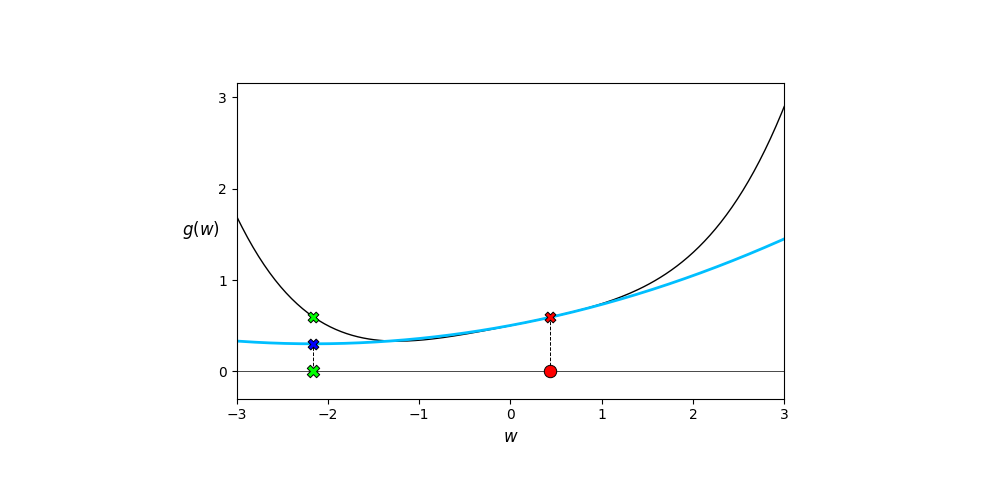
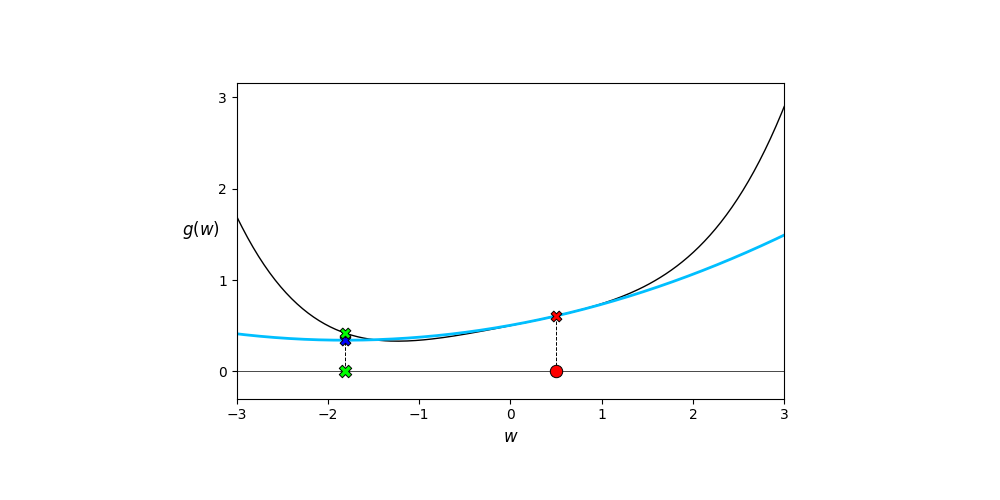
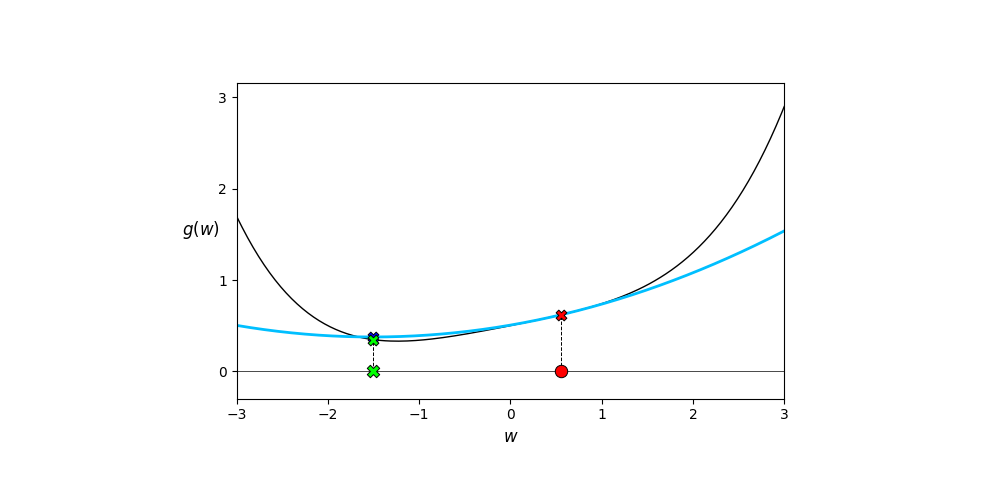
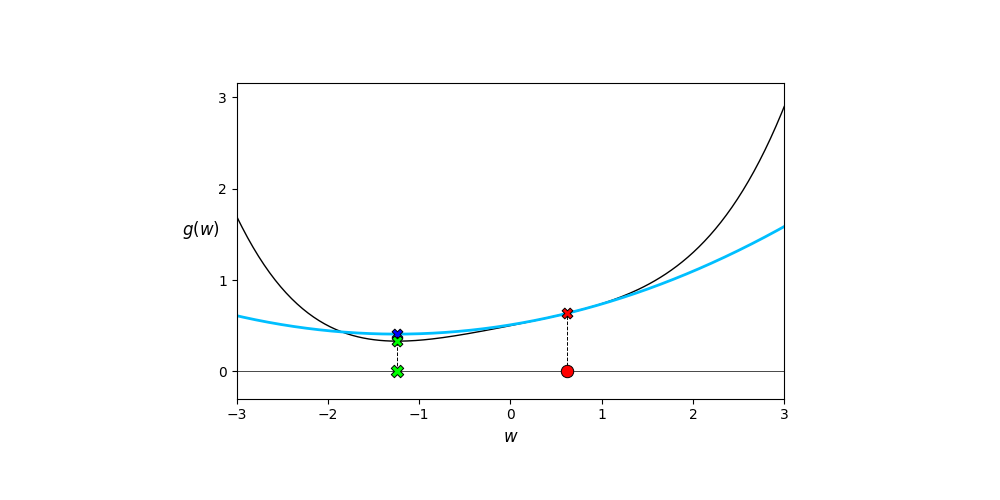
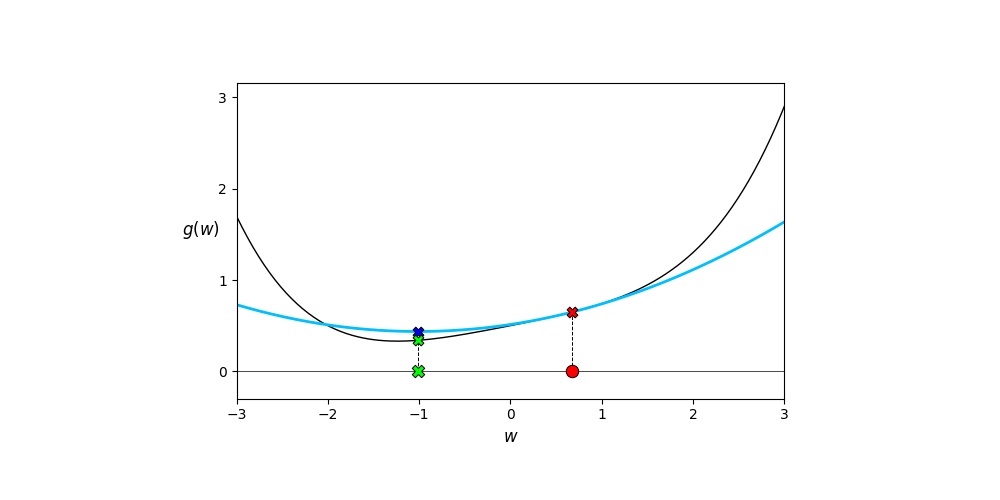
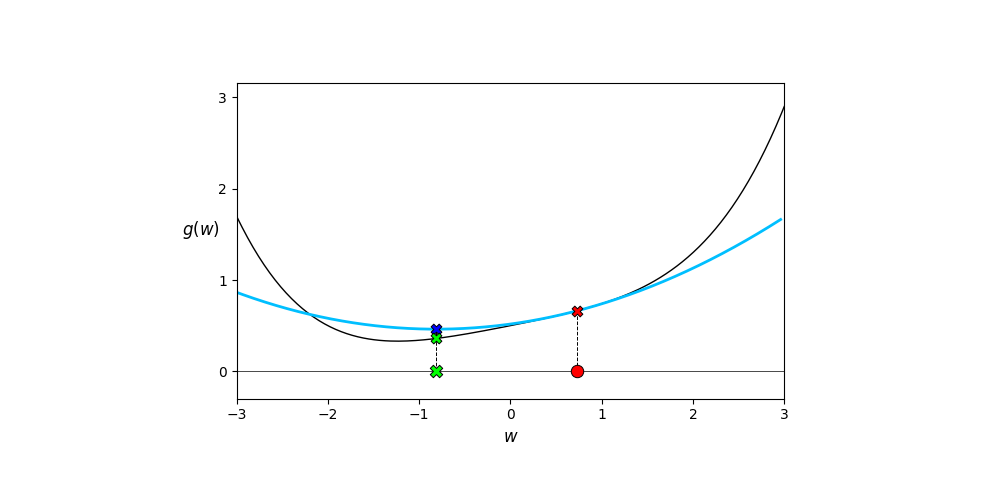
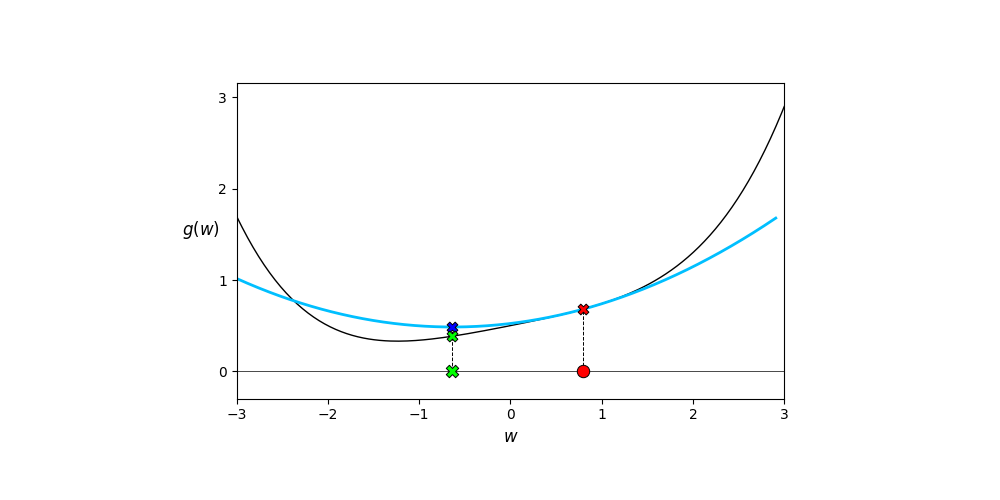
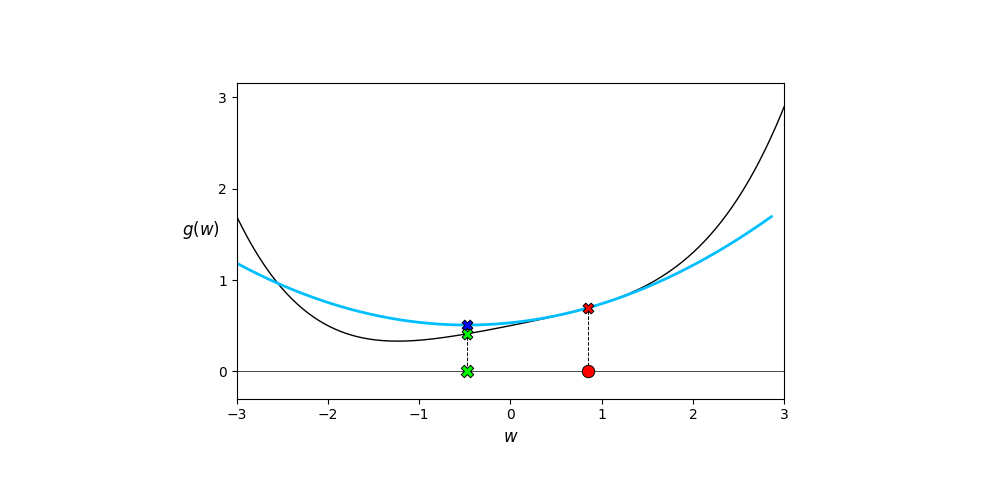
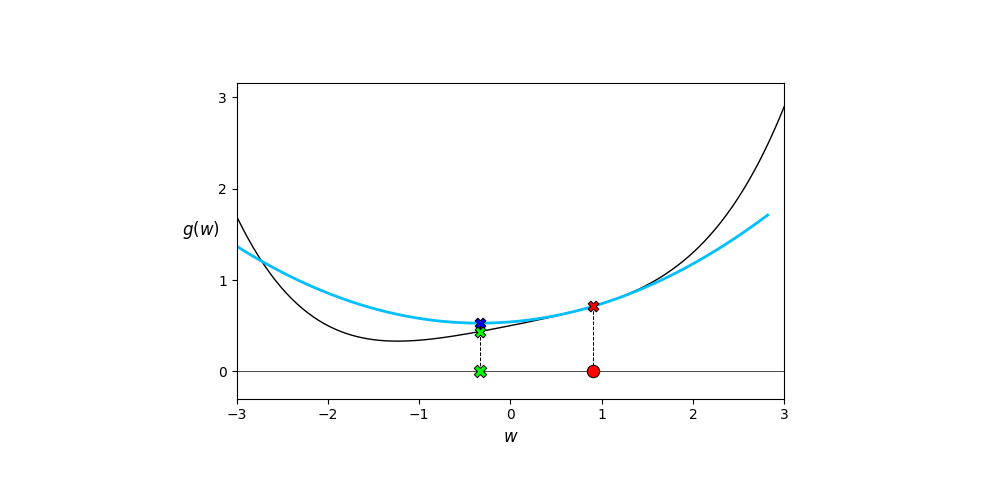
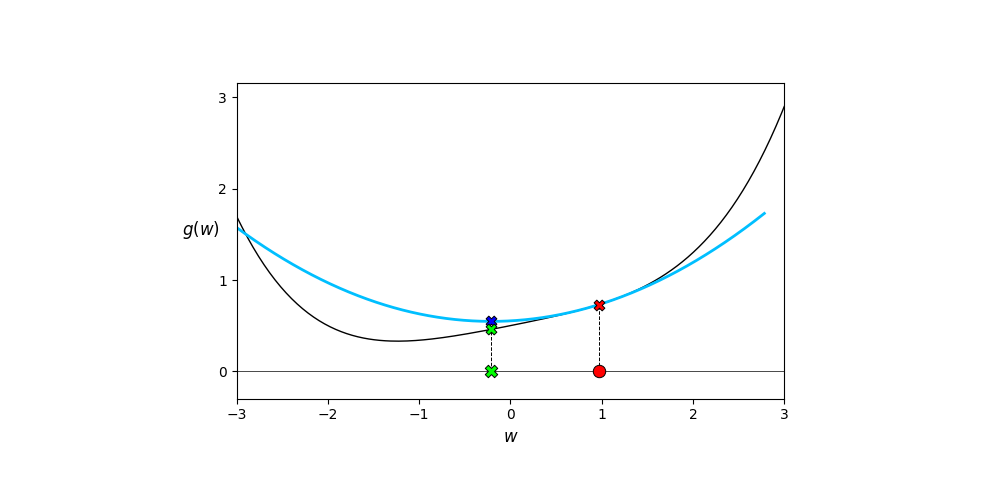
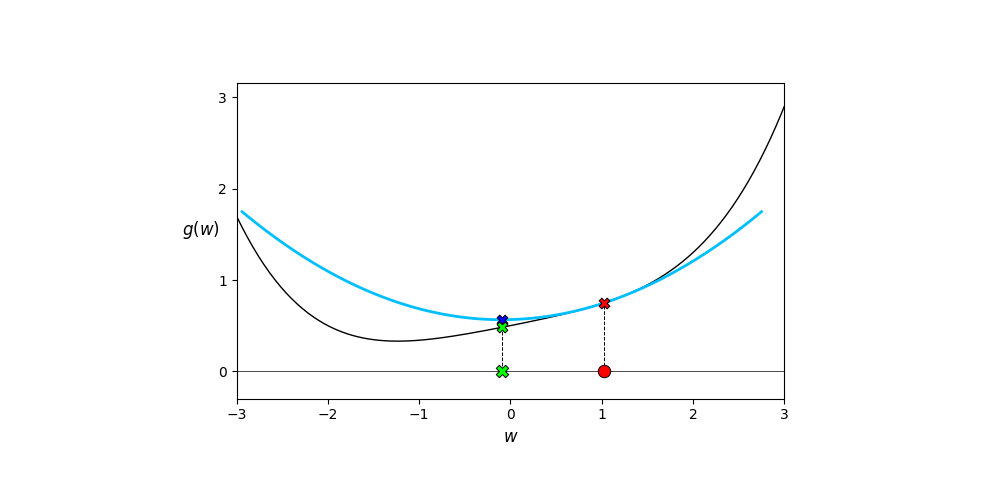
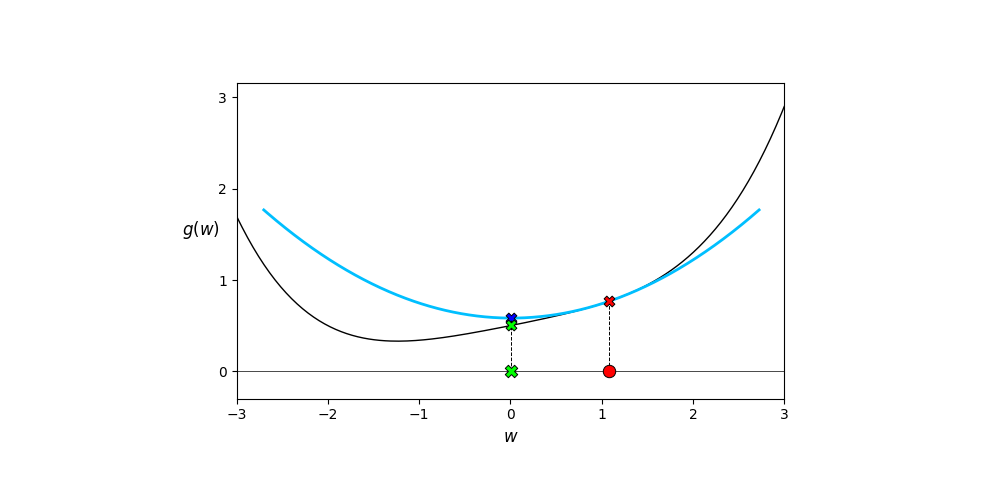
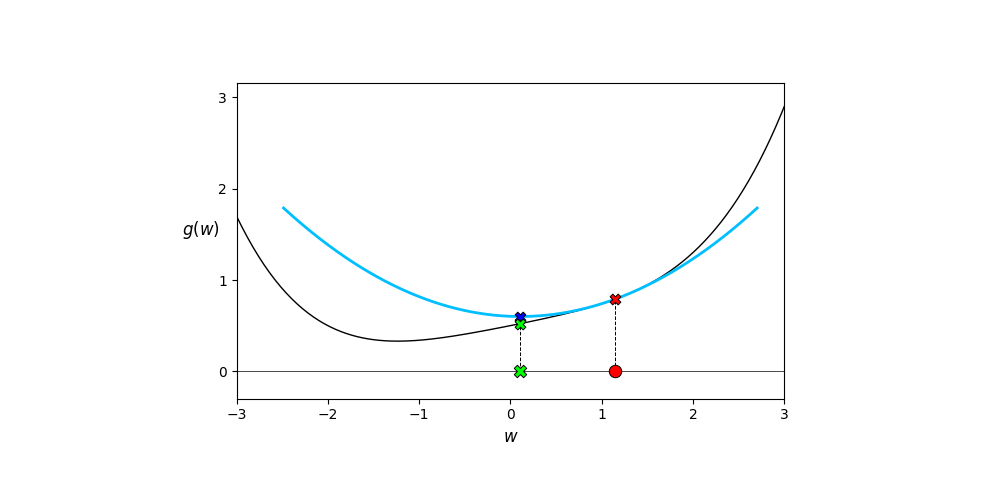
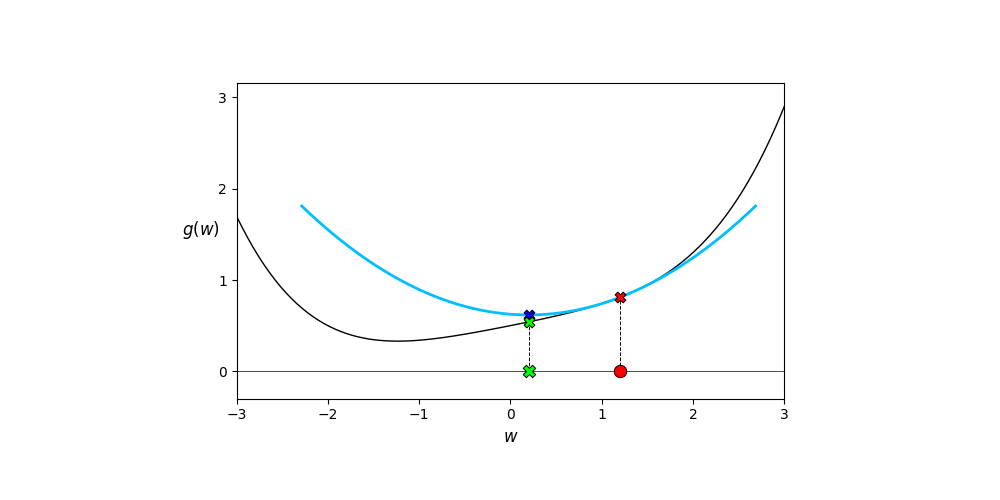
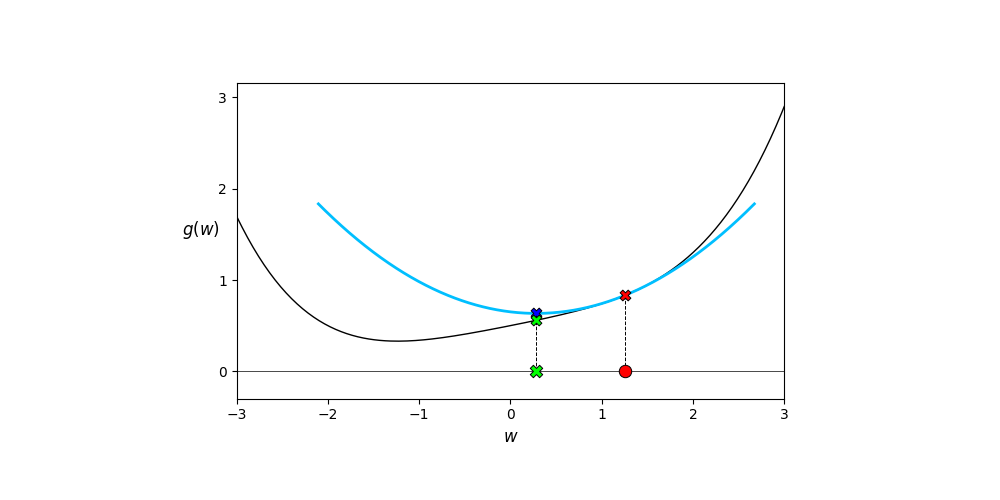
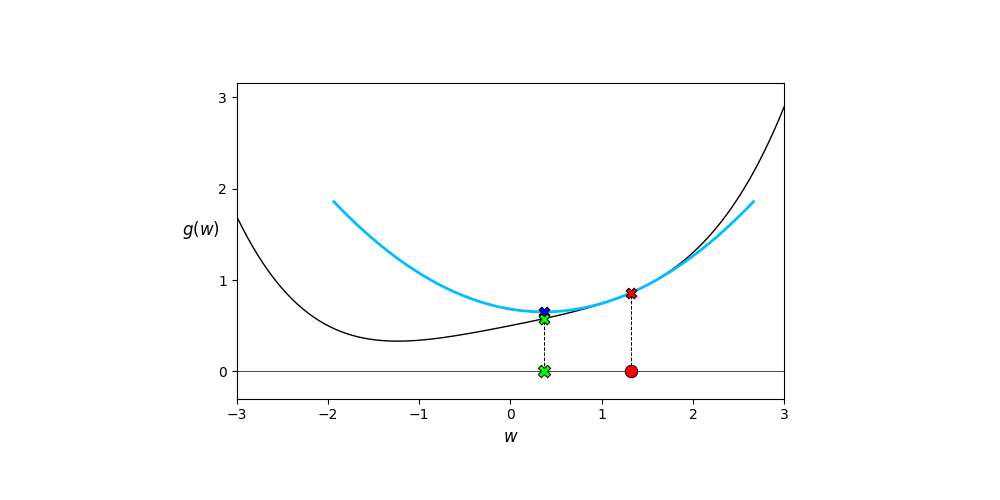
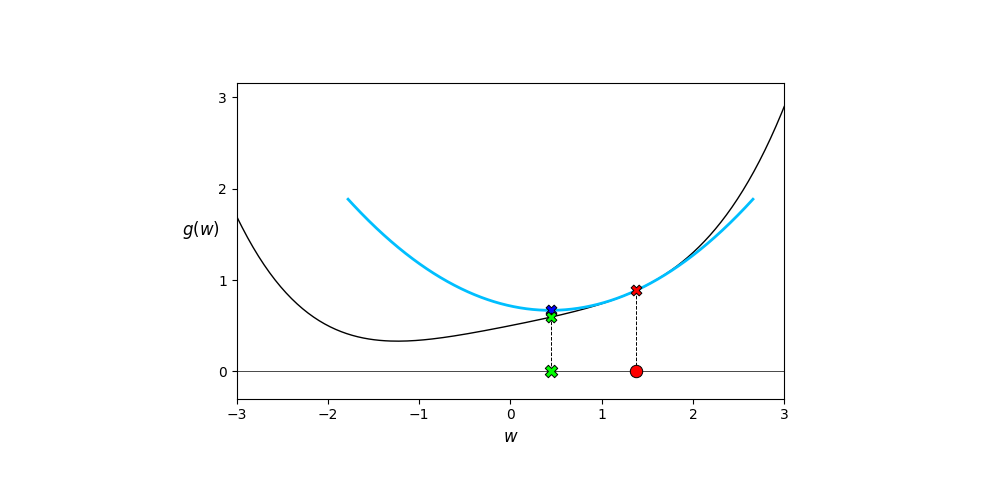
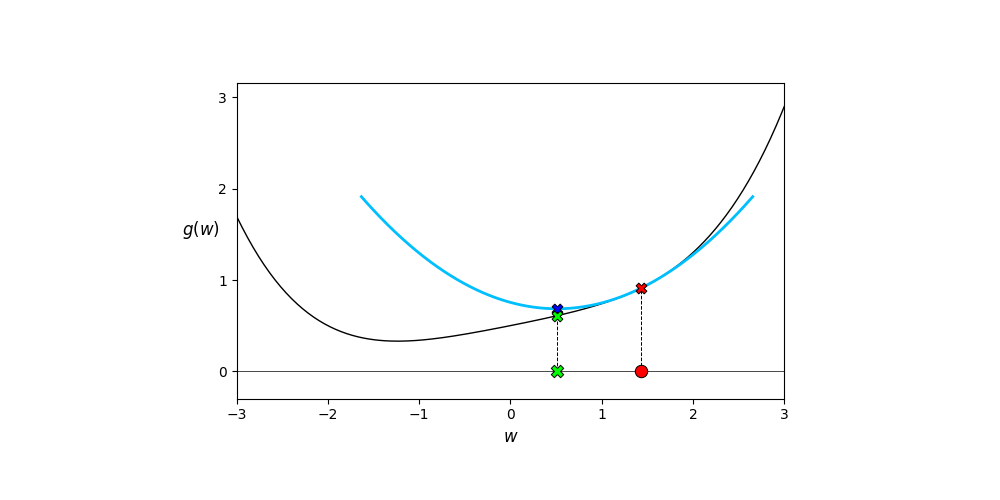
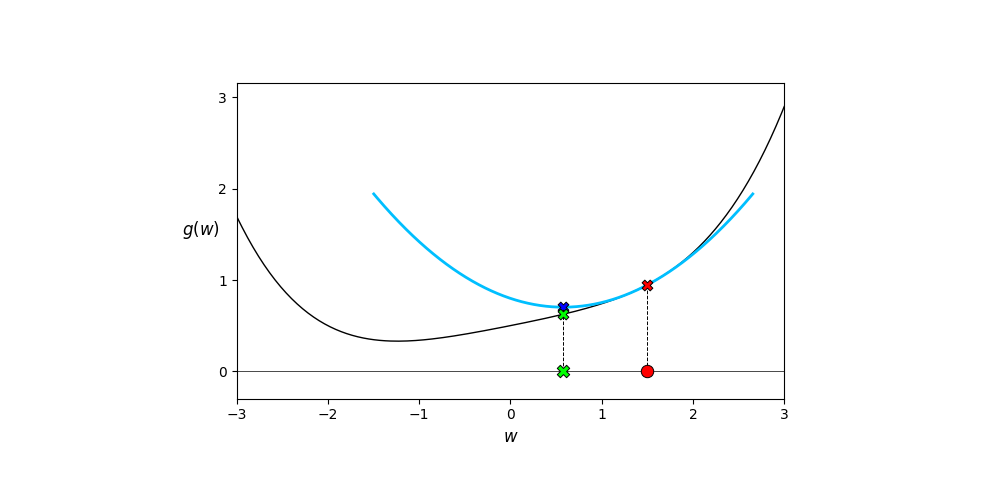
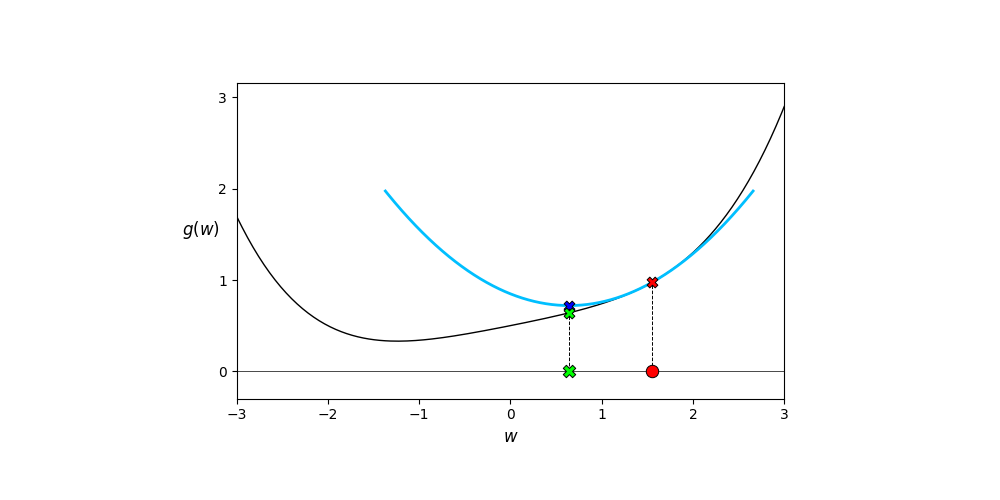
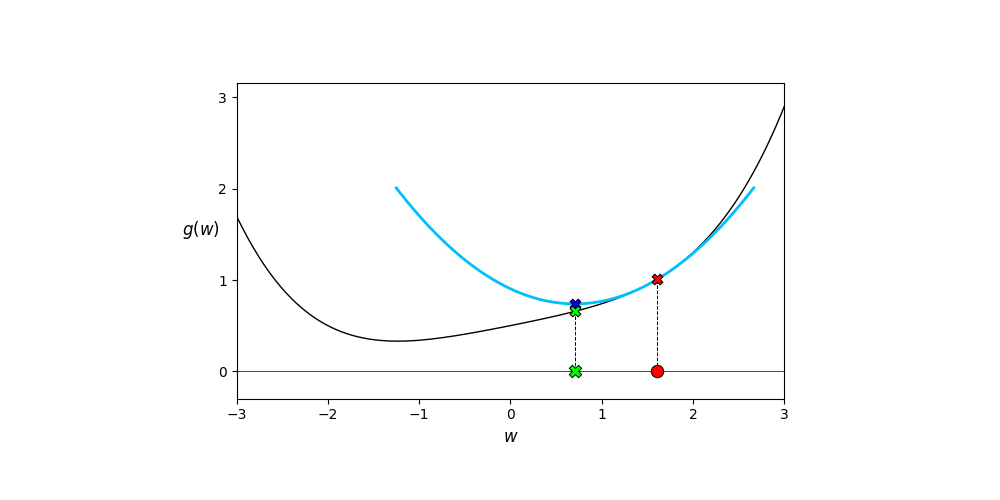
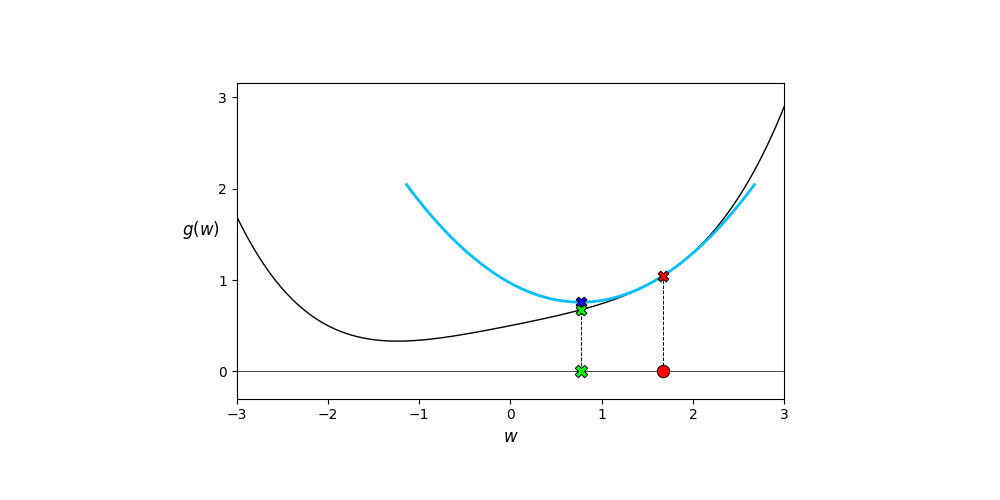
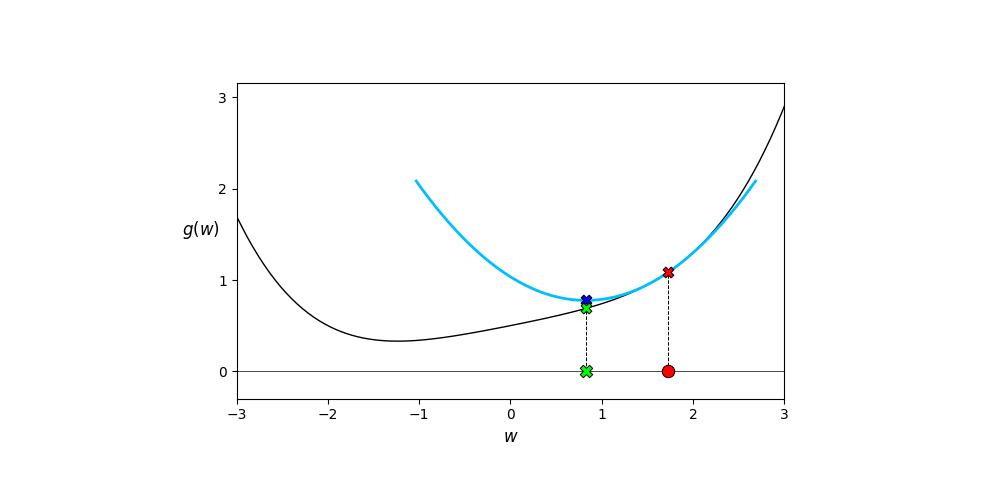
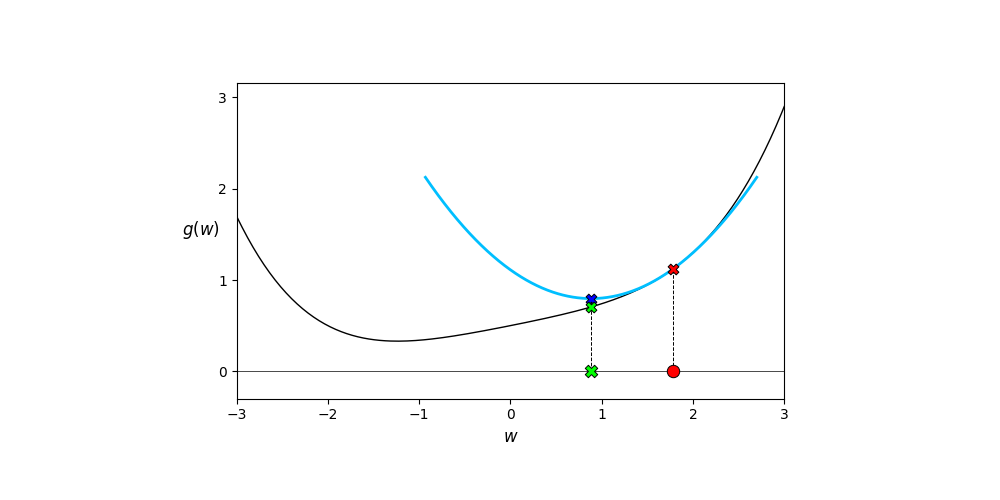
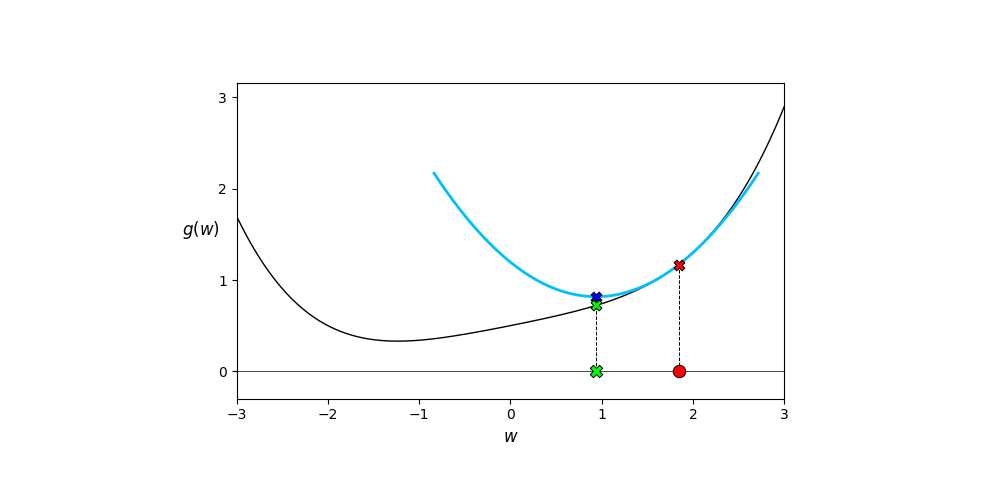
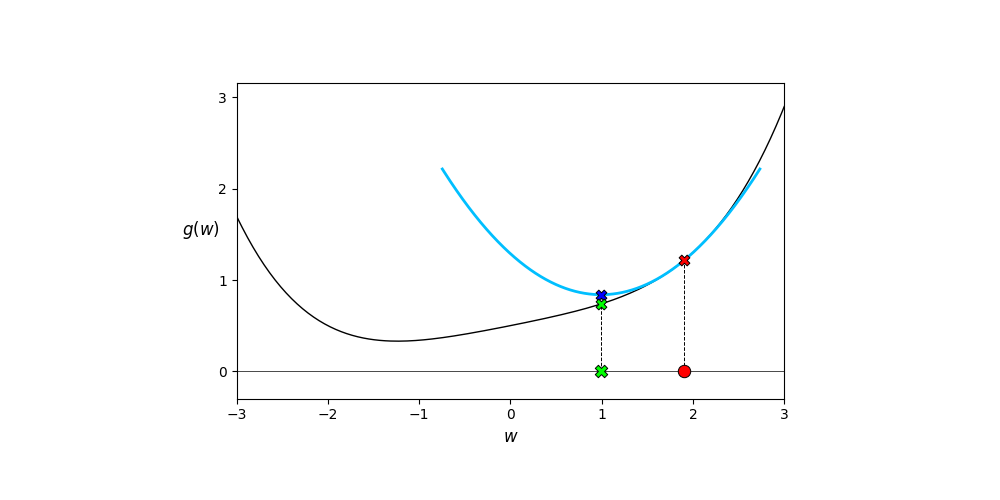
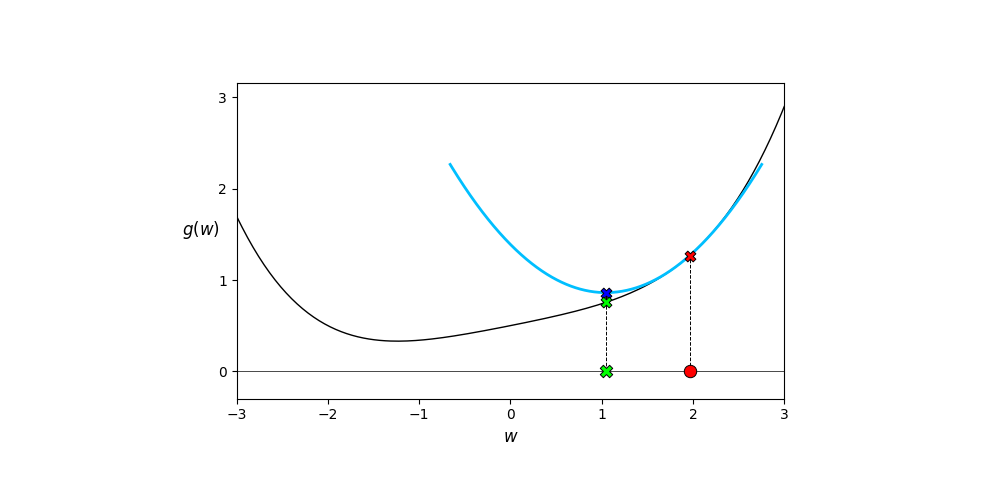
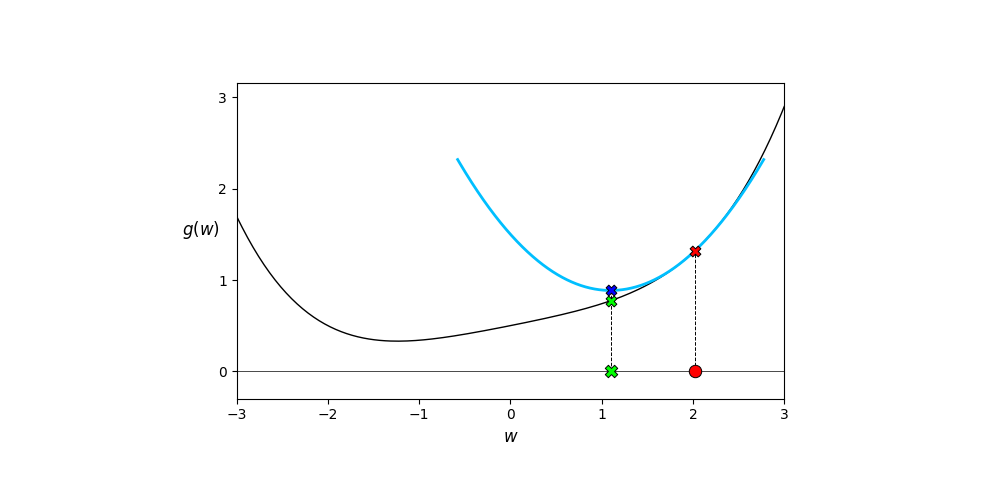
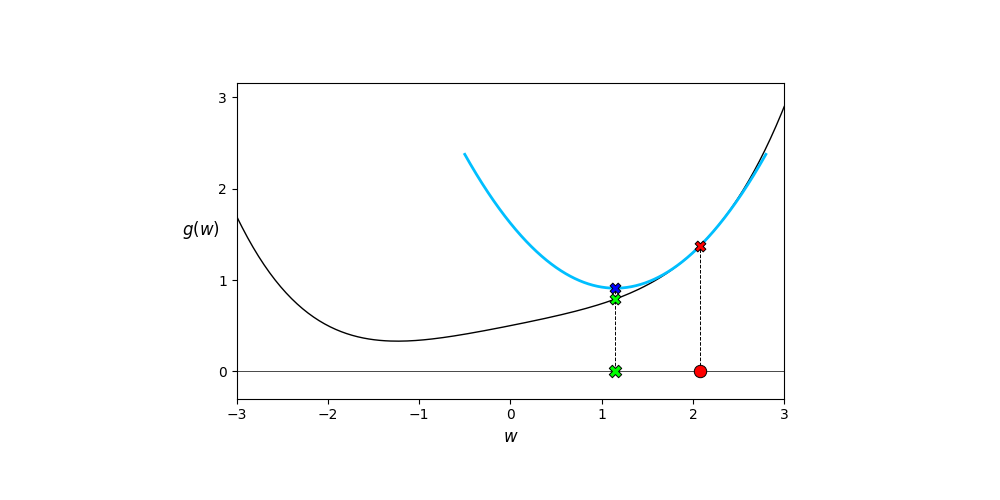
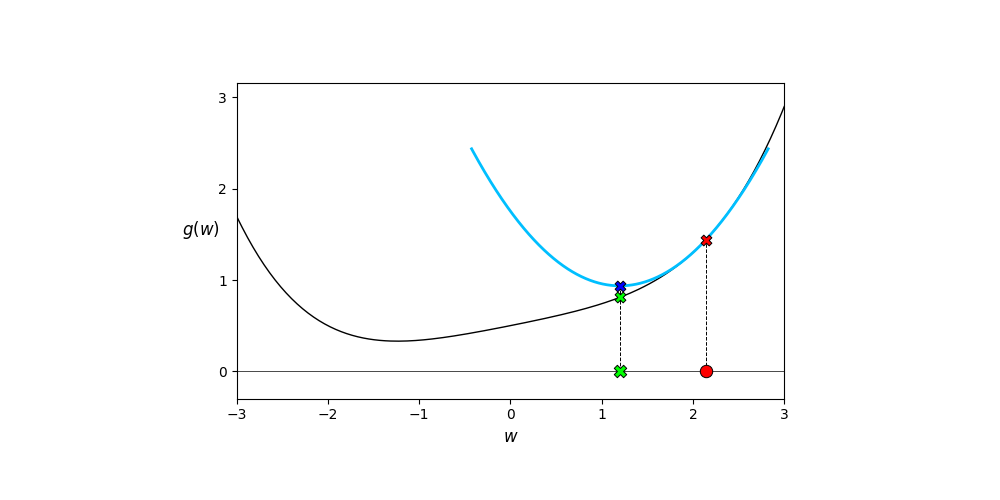
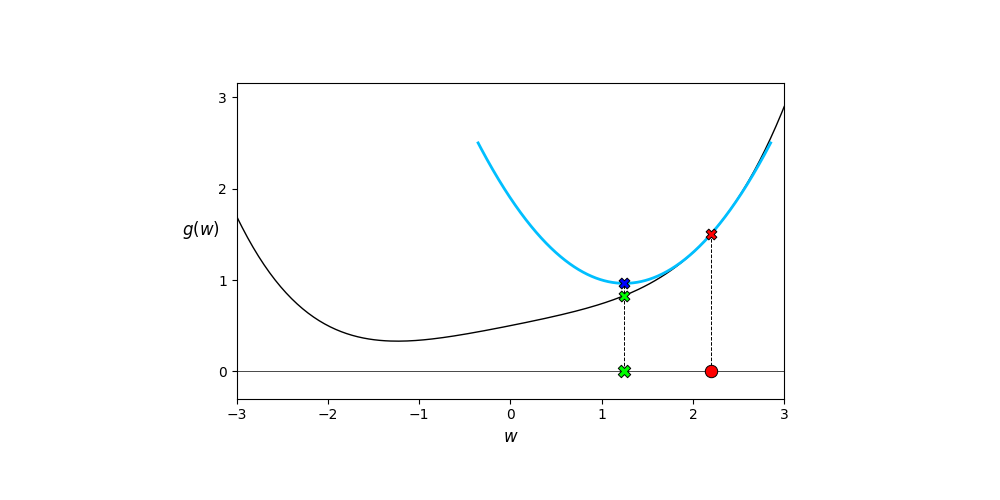
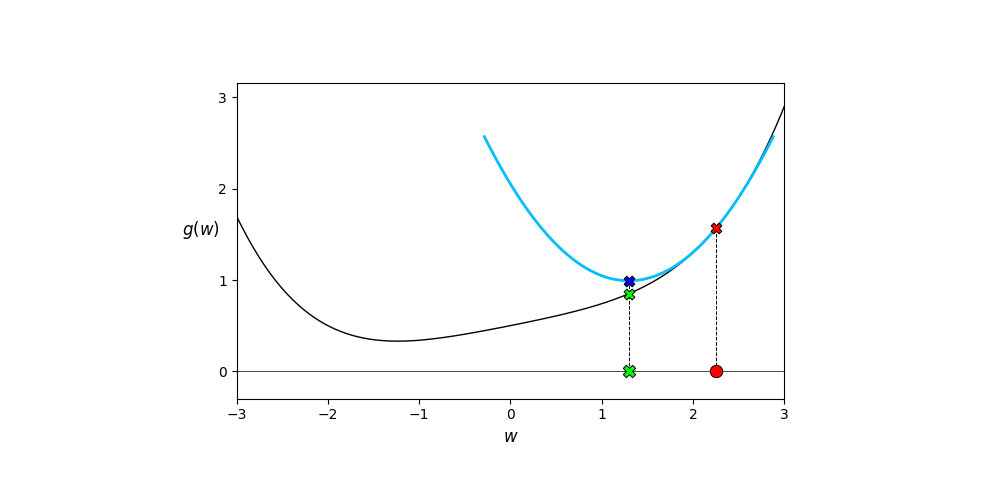
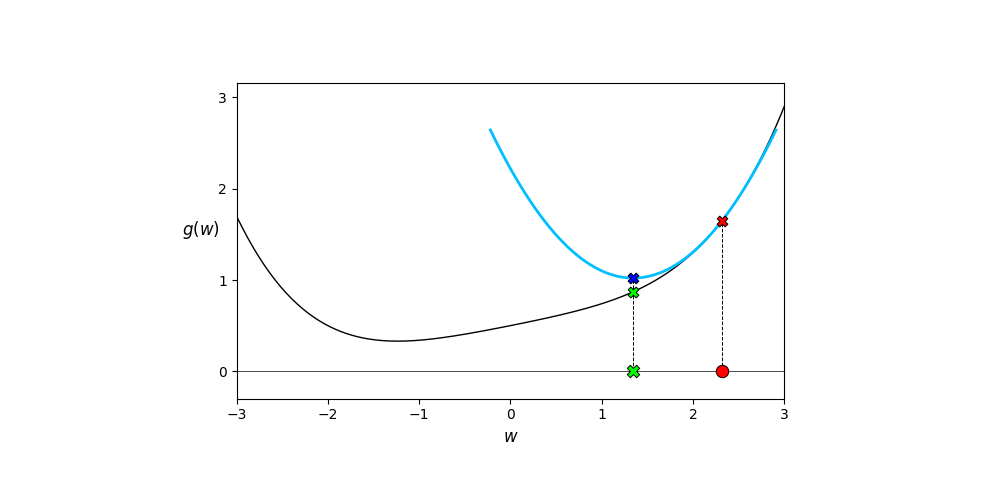
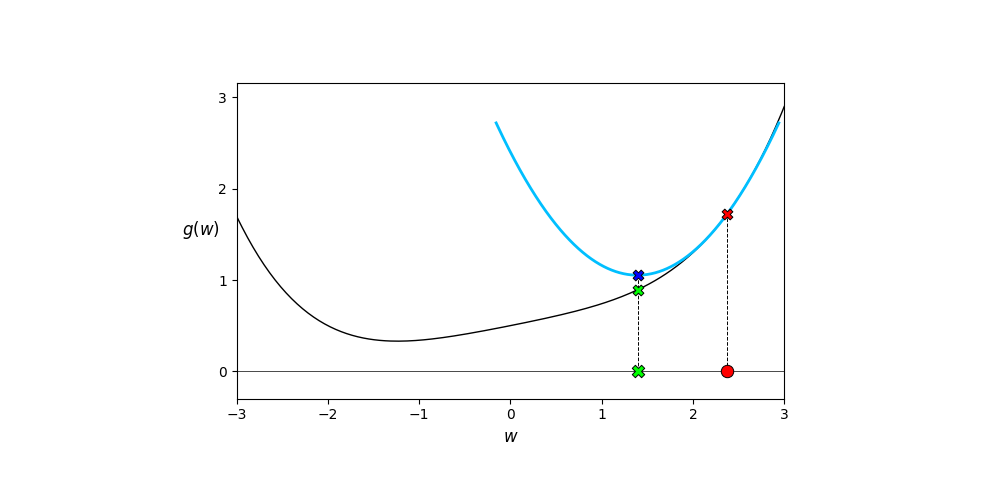
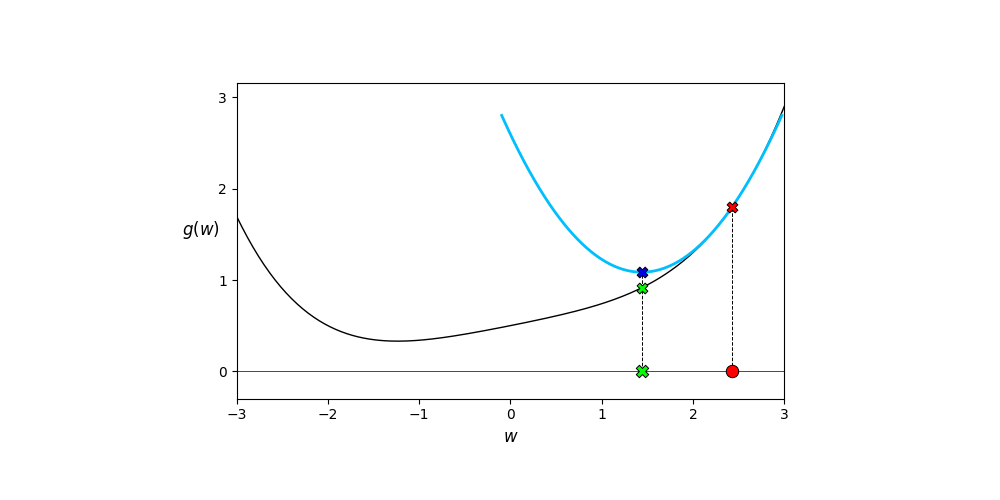
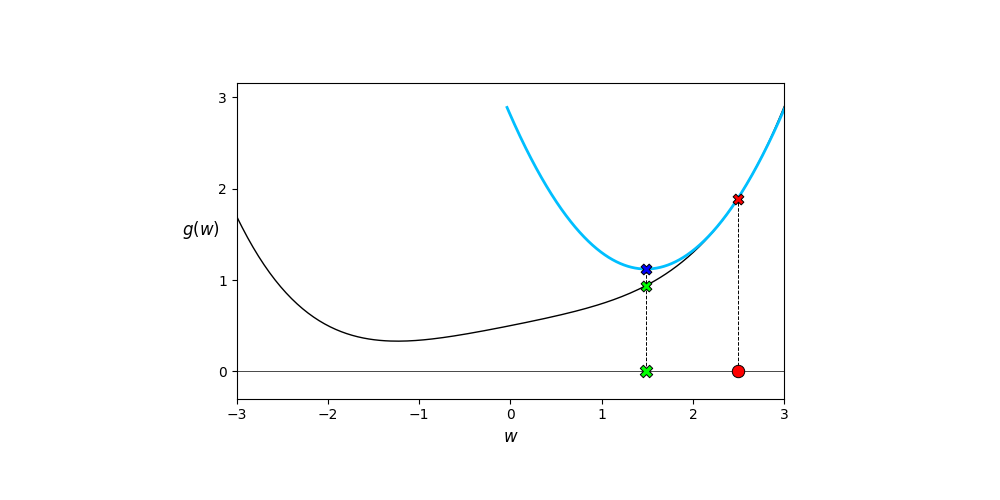
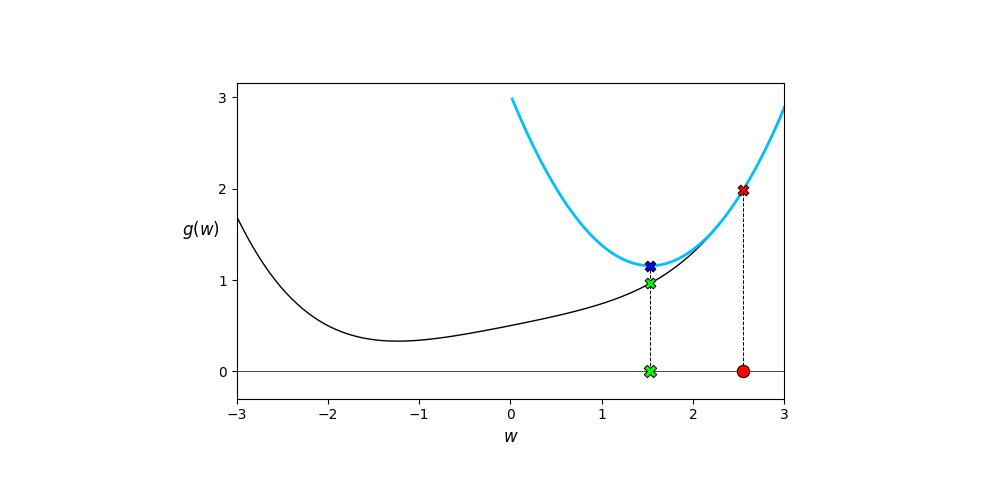
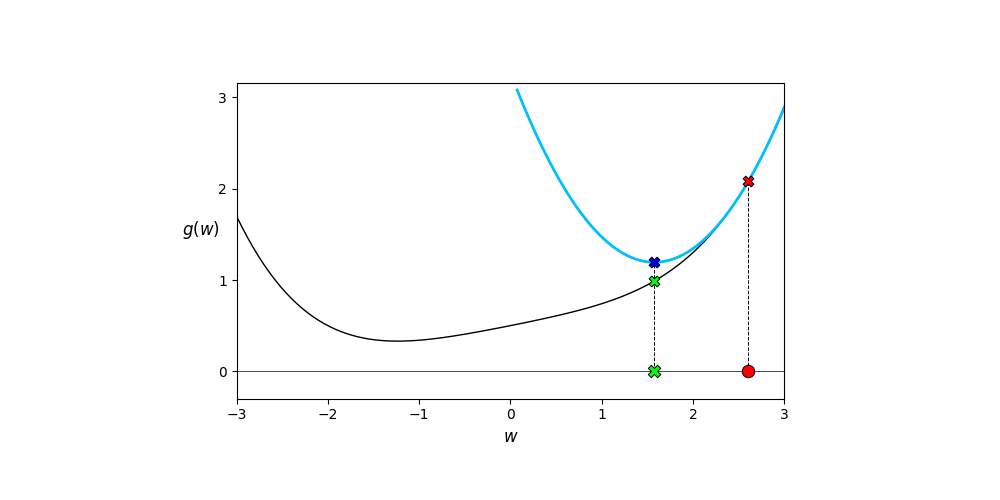
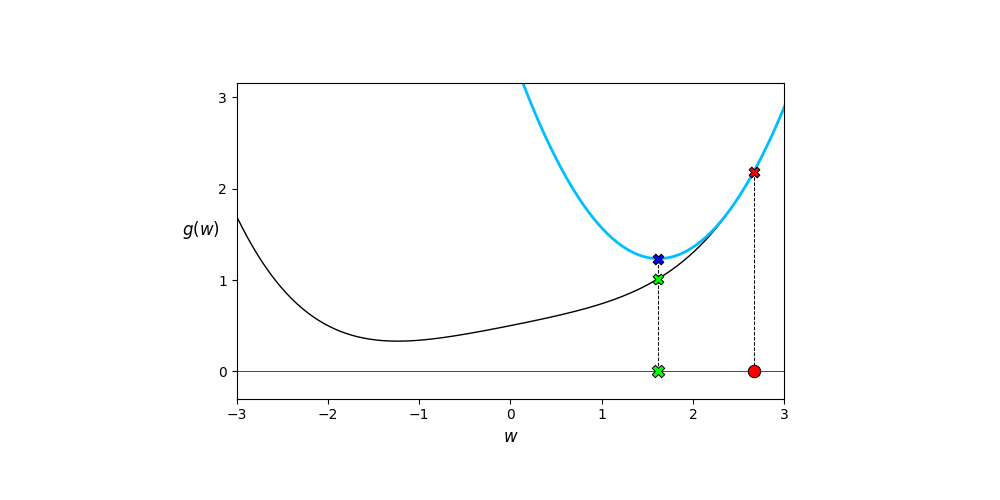
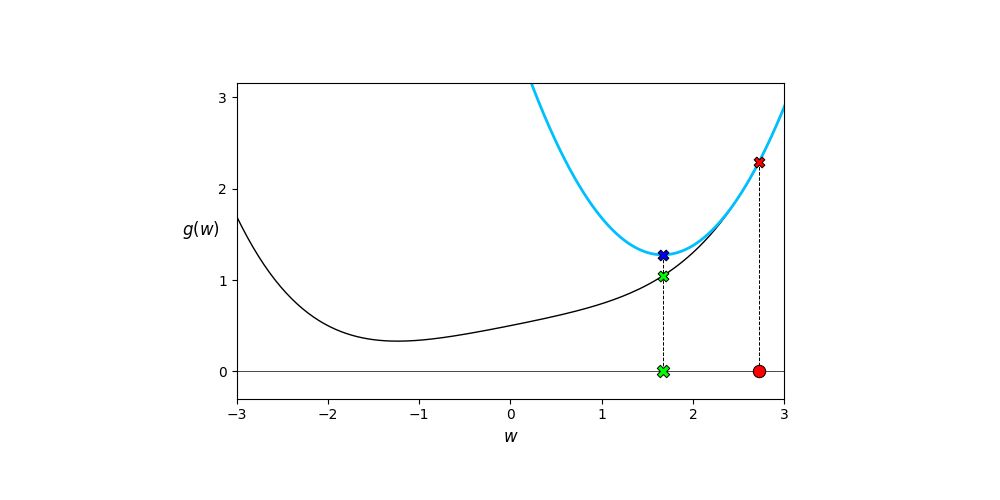
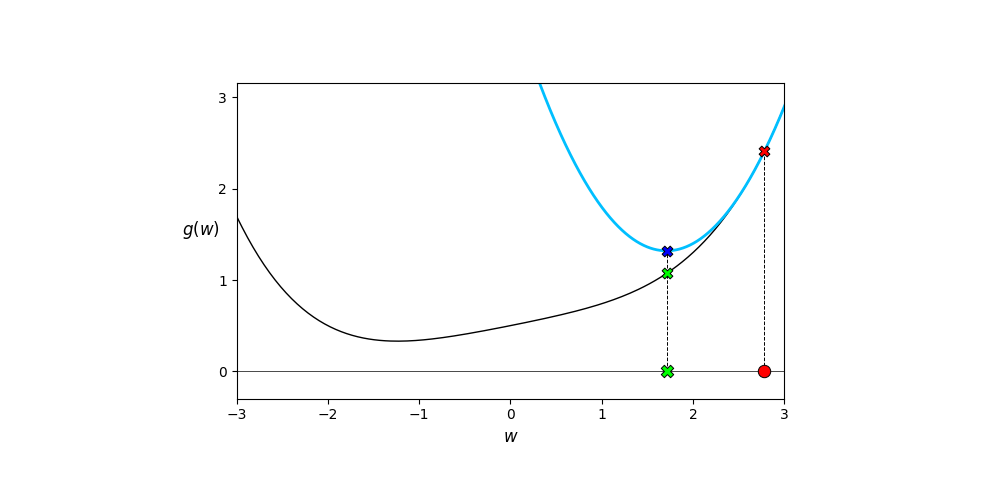
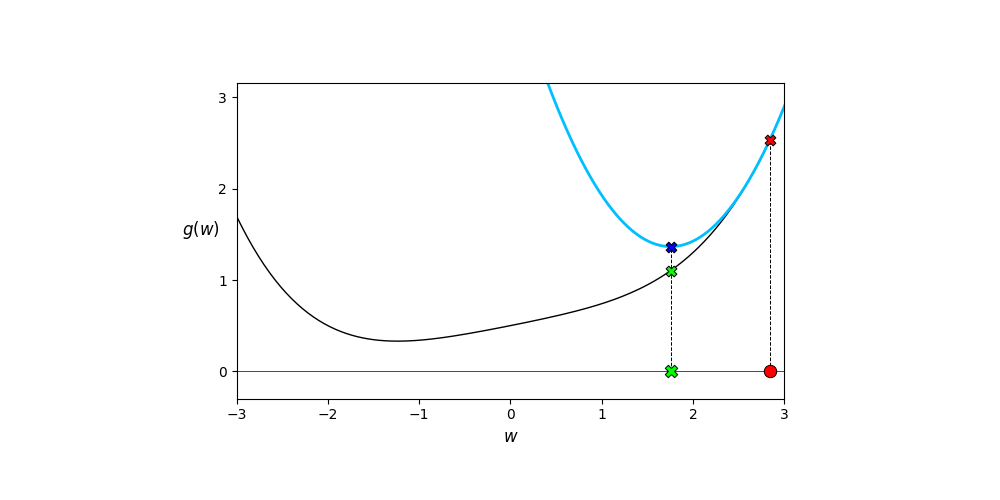
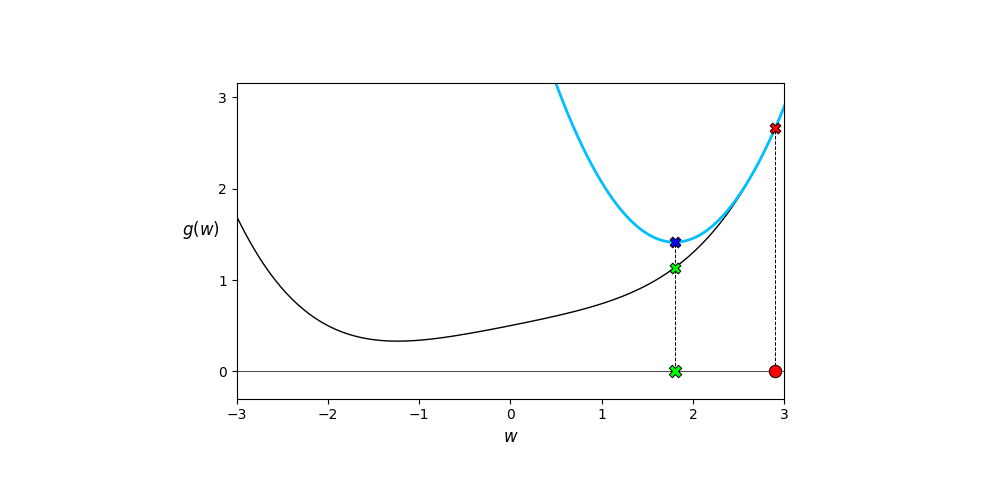

In [33]:
g = lambda w: np.sin(2*w) + 0.1*w**2 + 1
g = lambda w: np.log(1 + np.exp(w**2)) + 0.5
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w) + 0.5  # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

num_frames = 100

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.second_order_majorizer.visualizer(g=g);

# run it
demo.animate_it(num_frames = num_frames,max_val = 3)

## 1.2  The method itself

Like gradient descent, Newton's method works by using approximations to a function at each step in order to lower its value. However with
Newton's method a quadratic approximation, again generated via the Taylor series approximation, is used. As illustrated in the top panel
of Figure \ref{fig: Newton's method illustrated}, starting at an initial point $\mathbf{w}^{0}$ Newton's method produces a sequence
of points $\mathbf{w}^{1},\,\mathbf{w}^{2},...$, that minimizes $g$ by repeatedly creating a quadratic approximation to the function,
traveling to a stationary point of this quadratic, and hopping back onto the function. Because Newton's method uses quadratic as opposed
to linear approximations at each step, with a quadratic more closely mimicking the associated function, it is often much more effective
than gradient descent (in the sense that it requires far fewer steps for convergence \cite{luenberger2003linear,boyd2004convex}). However
this reliance on quadratic information makes Newton's method more difficult to use with non-convex functions\footnote{A number of procedures exist that adjust Newton's method at concave
portions of such a function in order to make it more effective for use with non-convex functions. See exercise \ref{exercise:regularizing-newtons-method}
as well as \cite{luenberger2003linear,nocedal2006numerical} for further information.}, since at concave portions of such a function the algorithm can climb
to a maximum, as illustrated in the bottom panel of Figure \ref{fig: Newton's method illustrated}.

<figure>
  <img src= '../../mlrefined_images/math_optimization_images/Fig_2_11.png' width="60%" height="60%" alt=""/>
  <figcaption>   
**Figure 1:** *Newton's method illustrated. To find a minimum of g Newton's method hops down the stationary points of quadratic approximations generated by g's second order Taylor series. (top panel) For convex functions these quadratic approximations are themselves always convex (upward facing) and so their stationary points are minima, and the sequence leads to a minimum of the original function. (bottom panel) For non-convex functions quadratic approximations can be concave or convex depending on where they are constructed, leading the algorithm to possibly converge to a maximum.*  </figcaption> 
</figure>

In [ ]:
PYTHON DEMO GOES HERE

<IPython.core.display.Javascript object>


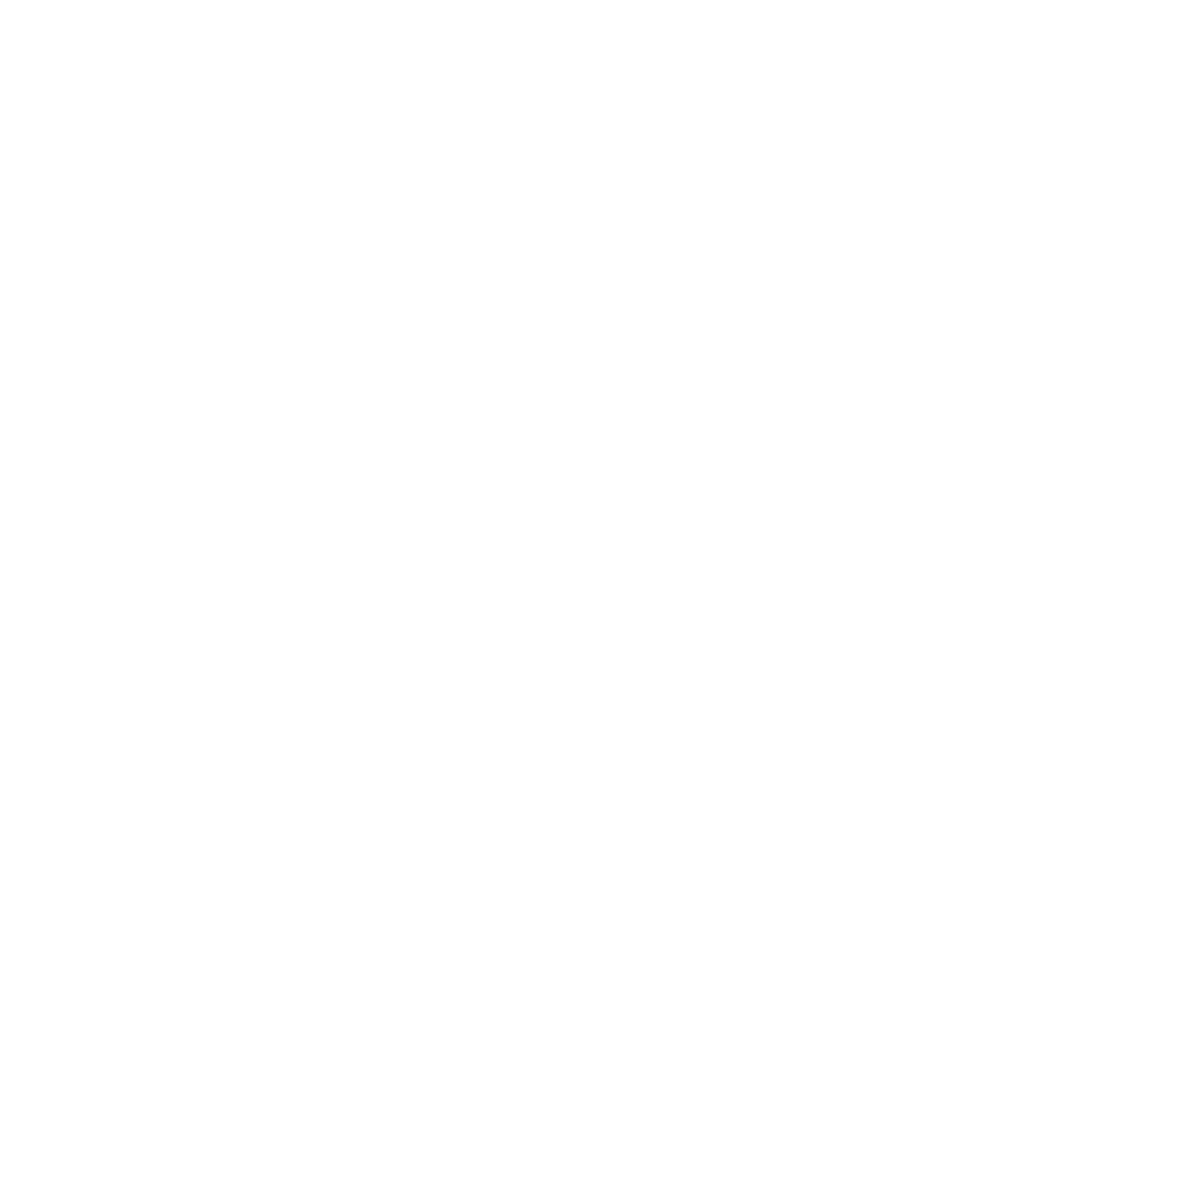


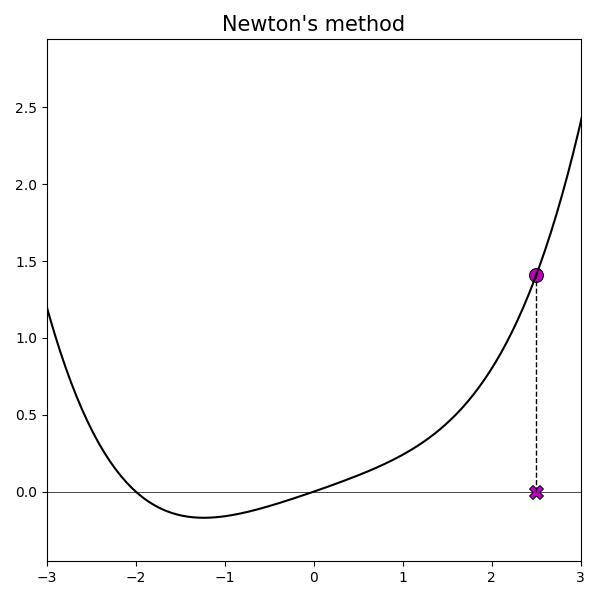
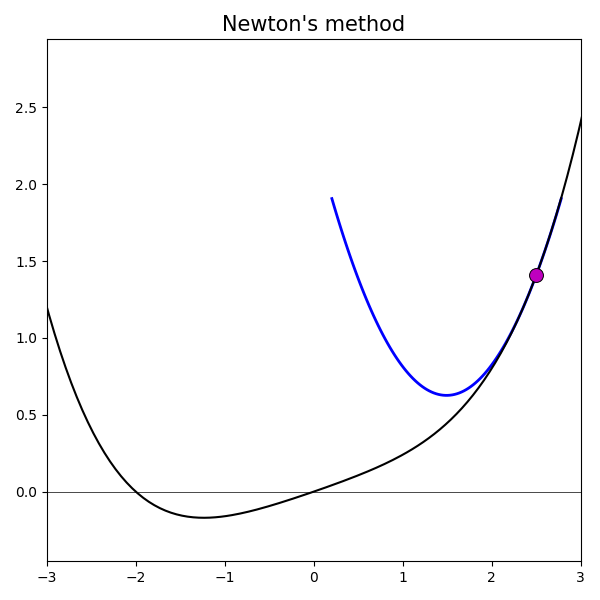
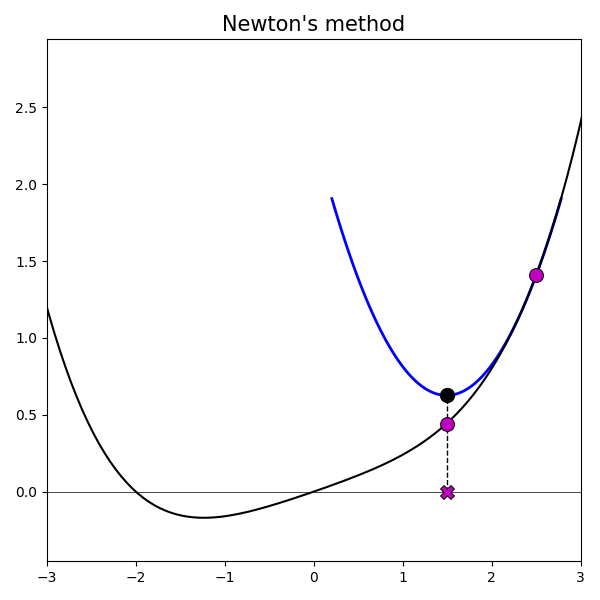
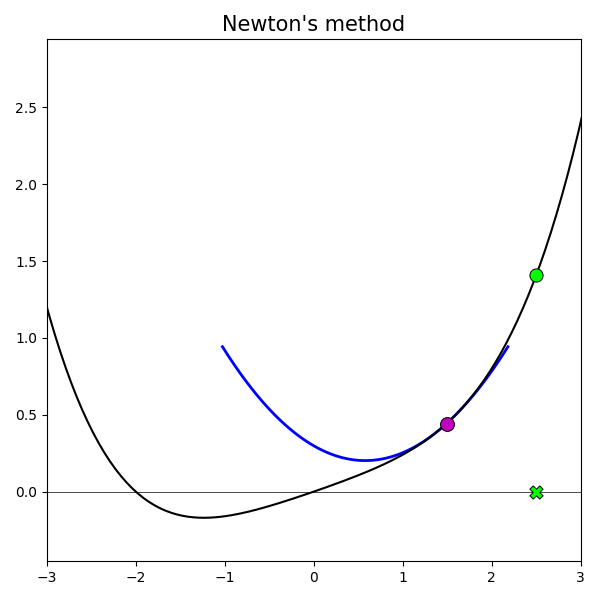
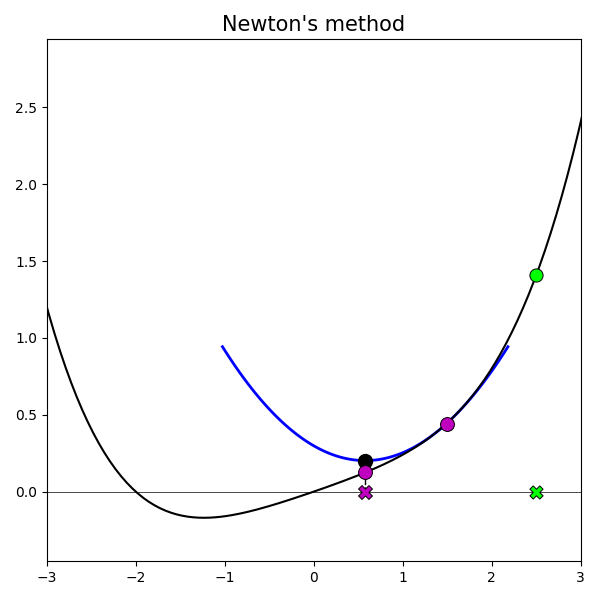
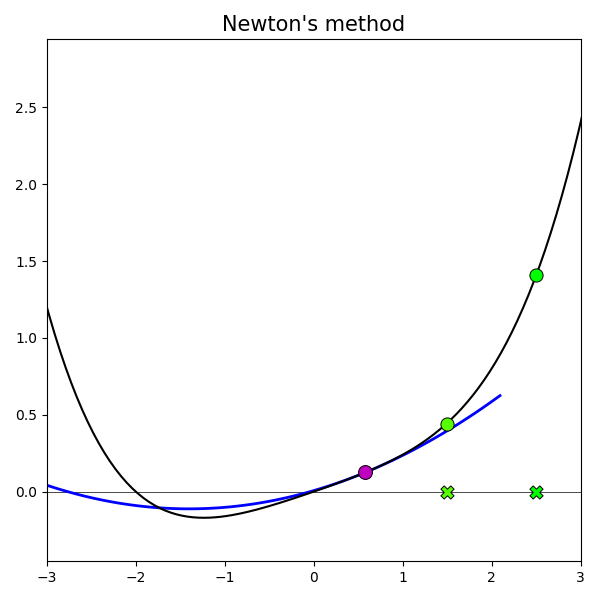
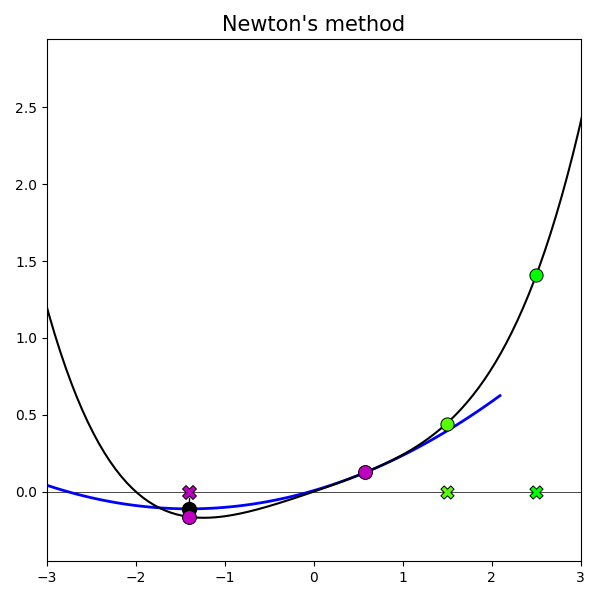
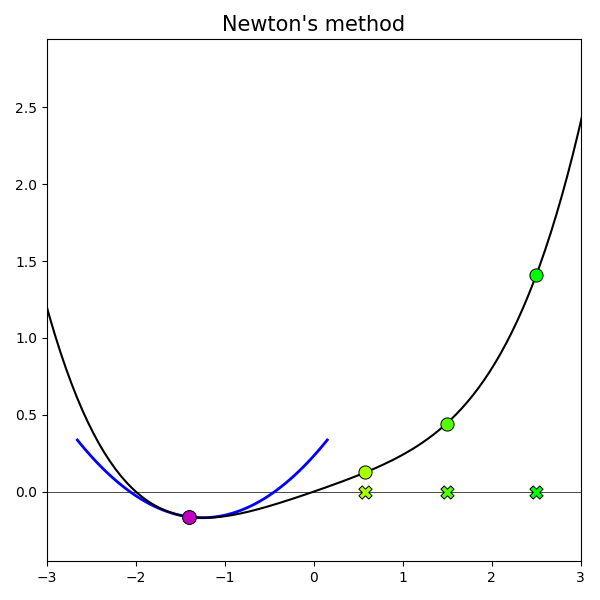
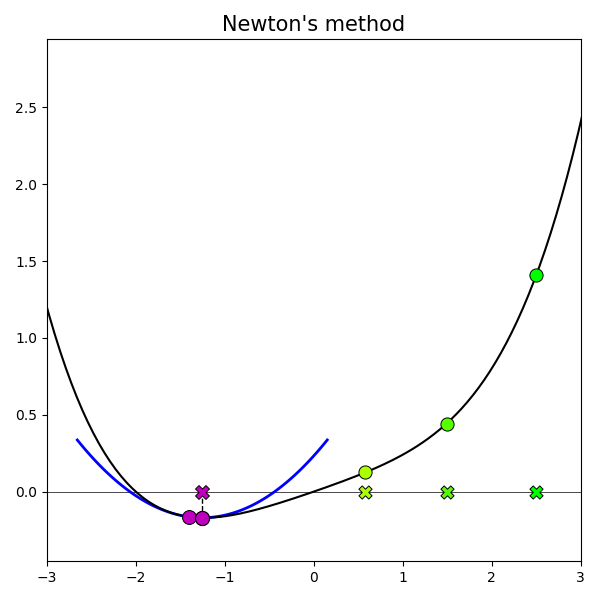
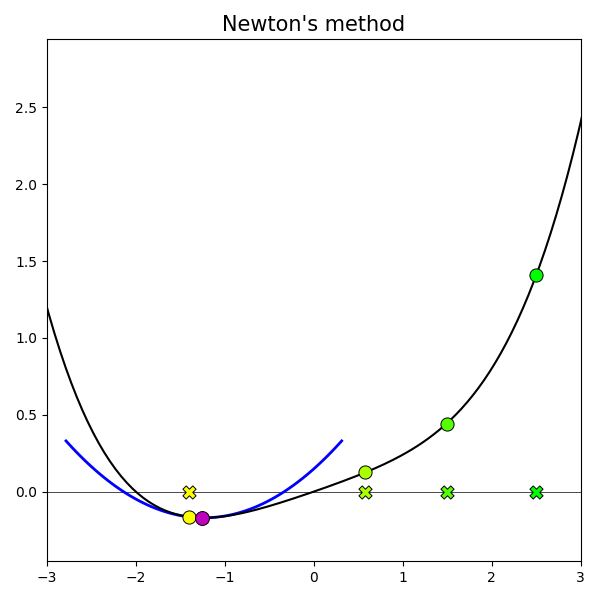
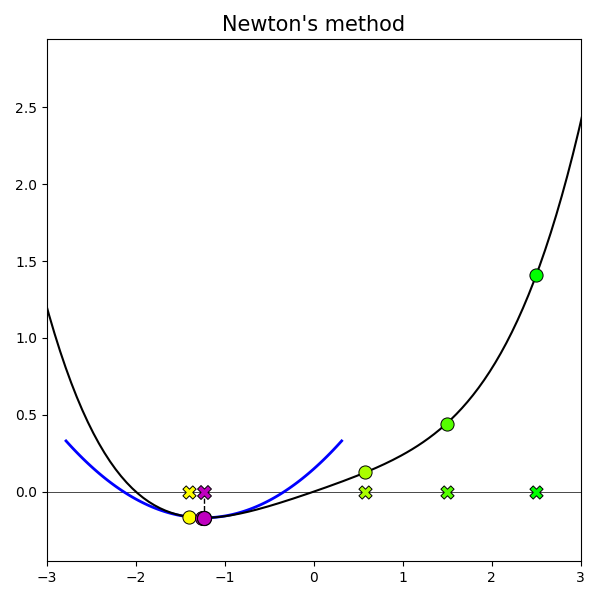
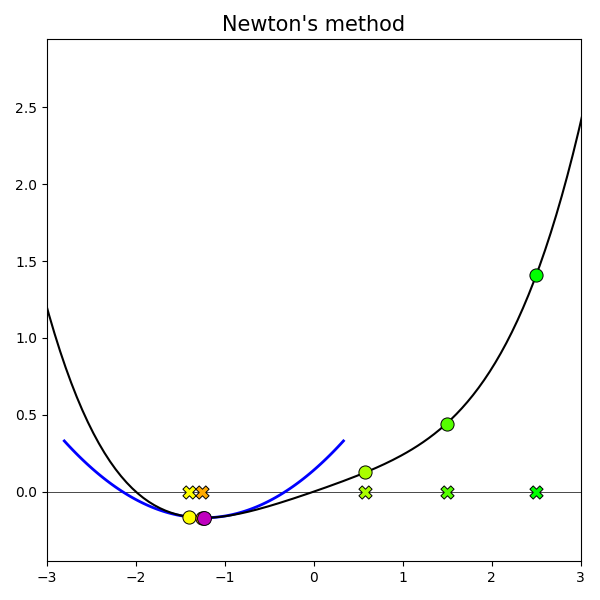
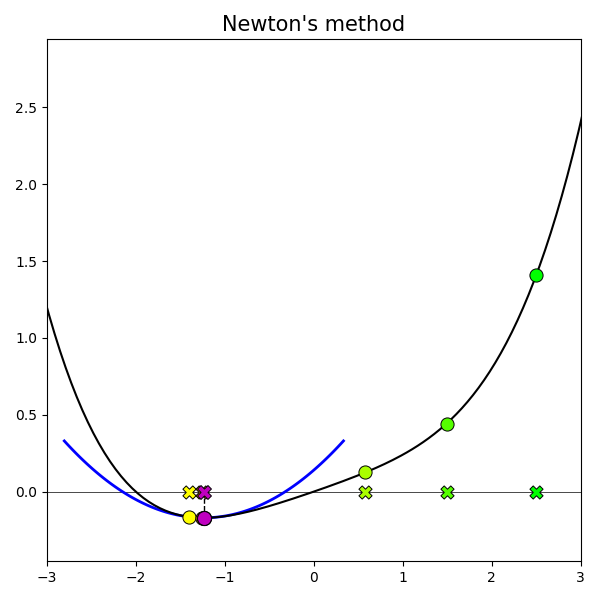
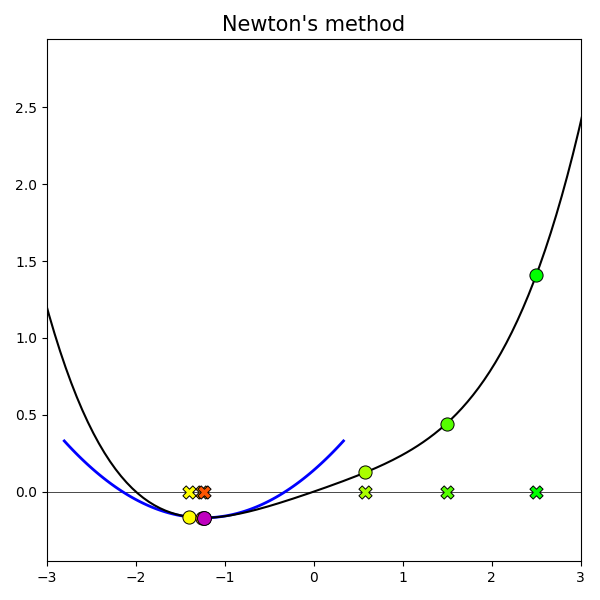
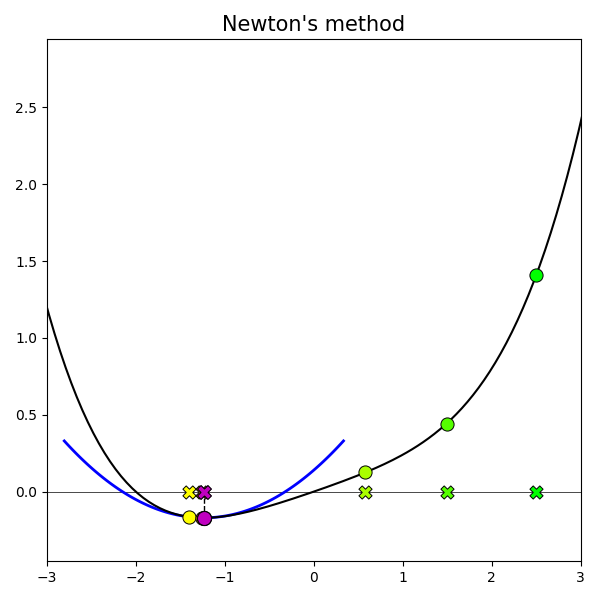
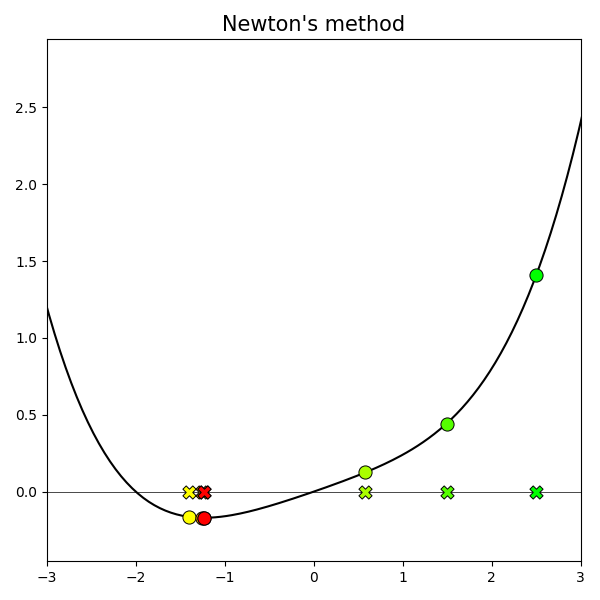

In [5]:
# what function should we play with?  Defined in the next line.
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# create an instance of the visualizer with this function
demo = optlib.newtons_method_demos.visualizer(g = g)

# run the visualizer for our chosen input function, initial point, and step length alpha
demo.draw_it_newtons(max_its = 10,w_init = 2.5)

#### <span style="color:#a50e3e;">Example 4. </span>  Single-input and multi-input examples

<IPython.core.display.Javascript object>


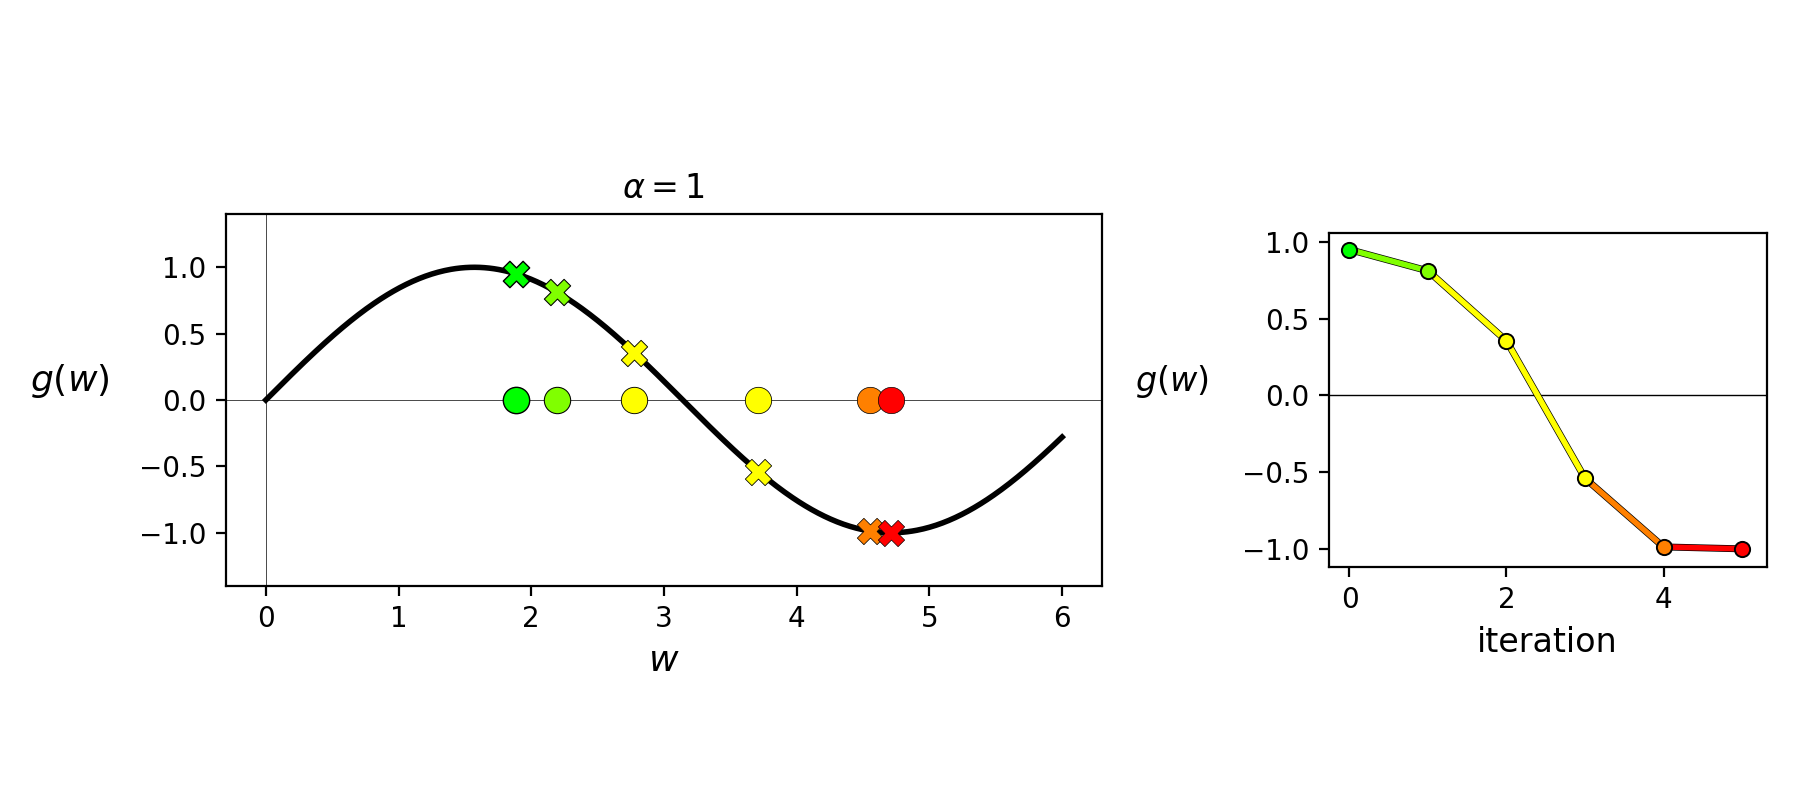

In [9]:
# the Rastrigin function
g = lambda w: np.sin(w)

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = np.pi*0.6; max_its = 5; steplength_vals = [1]; version = 'unnormalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 30,linewidth = 2,xmin = 0, xmax = 6)

<IPython.core.display.Javascript object>


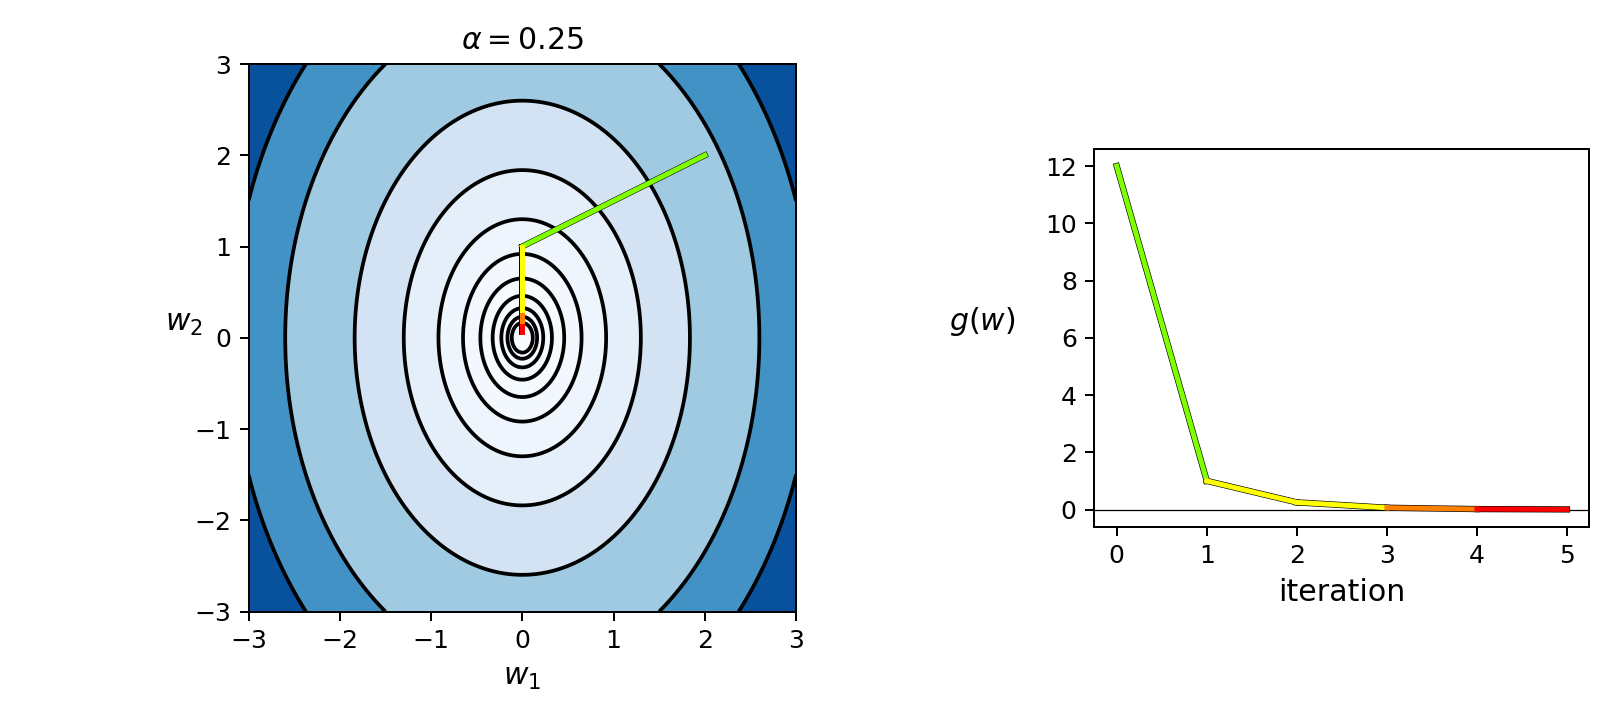

In [14]:
# the Rastrigin function
g = lambda w: 2*w[0]**2 + w[1]**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.convservative_steplength_demos.visualizer();
w_init = [2,2]; max_its = 5; steplength_vals = [1/float(4)]; version = 'unnormalized';

demo.run(g,w_init,steplength_vals,max_its,version = version,num_contours = 30,linewidth = 2,xmin = -3, xmax = 3,ymin = -3, ymax = 3)

# Convexifying Newton's method via regularization

<IPython.core.display.Javascript object>


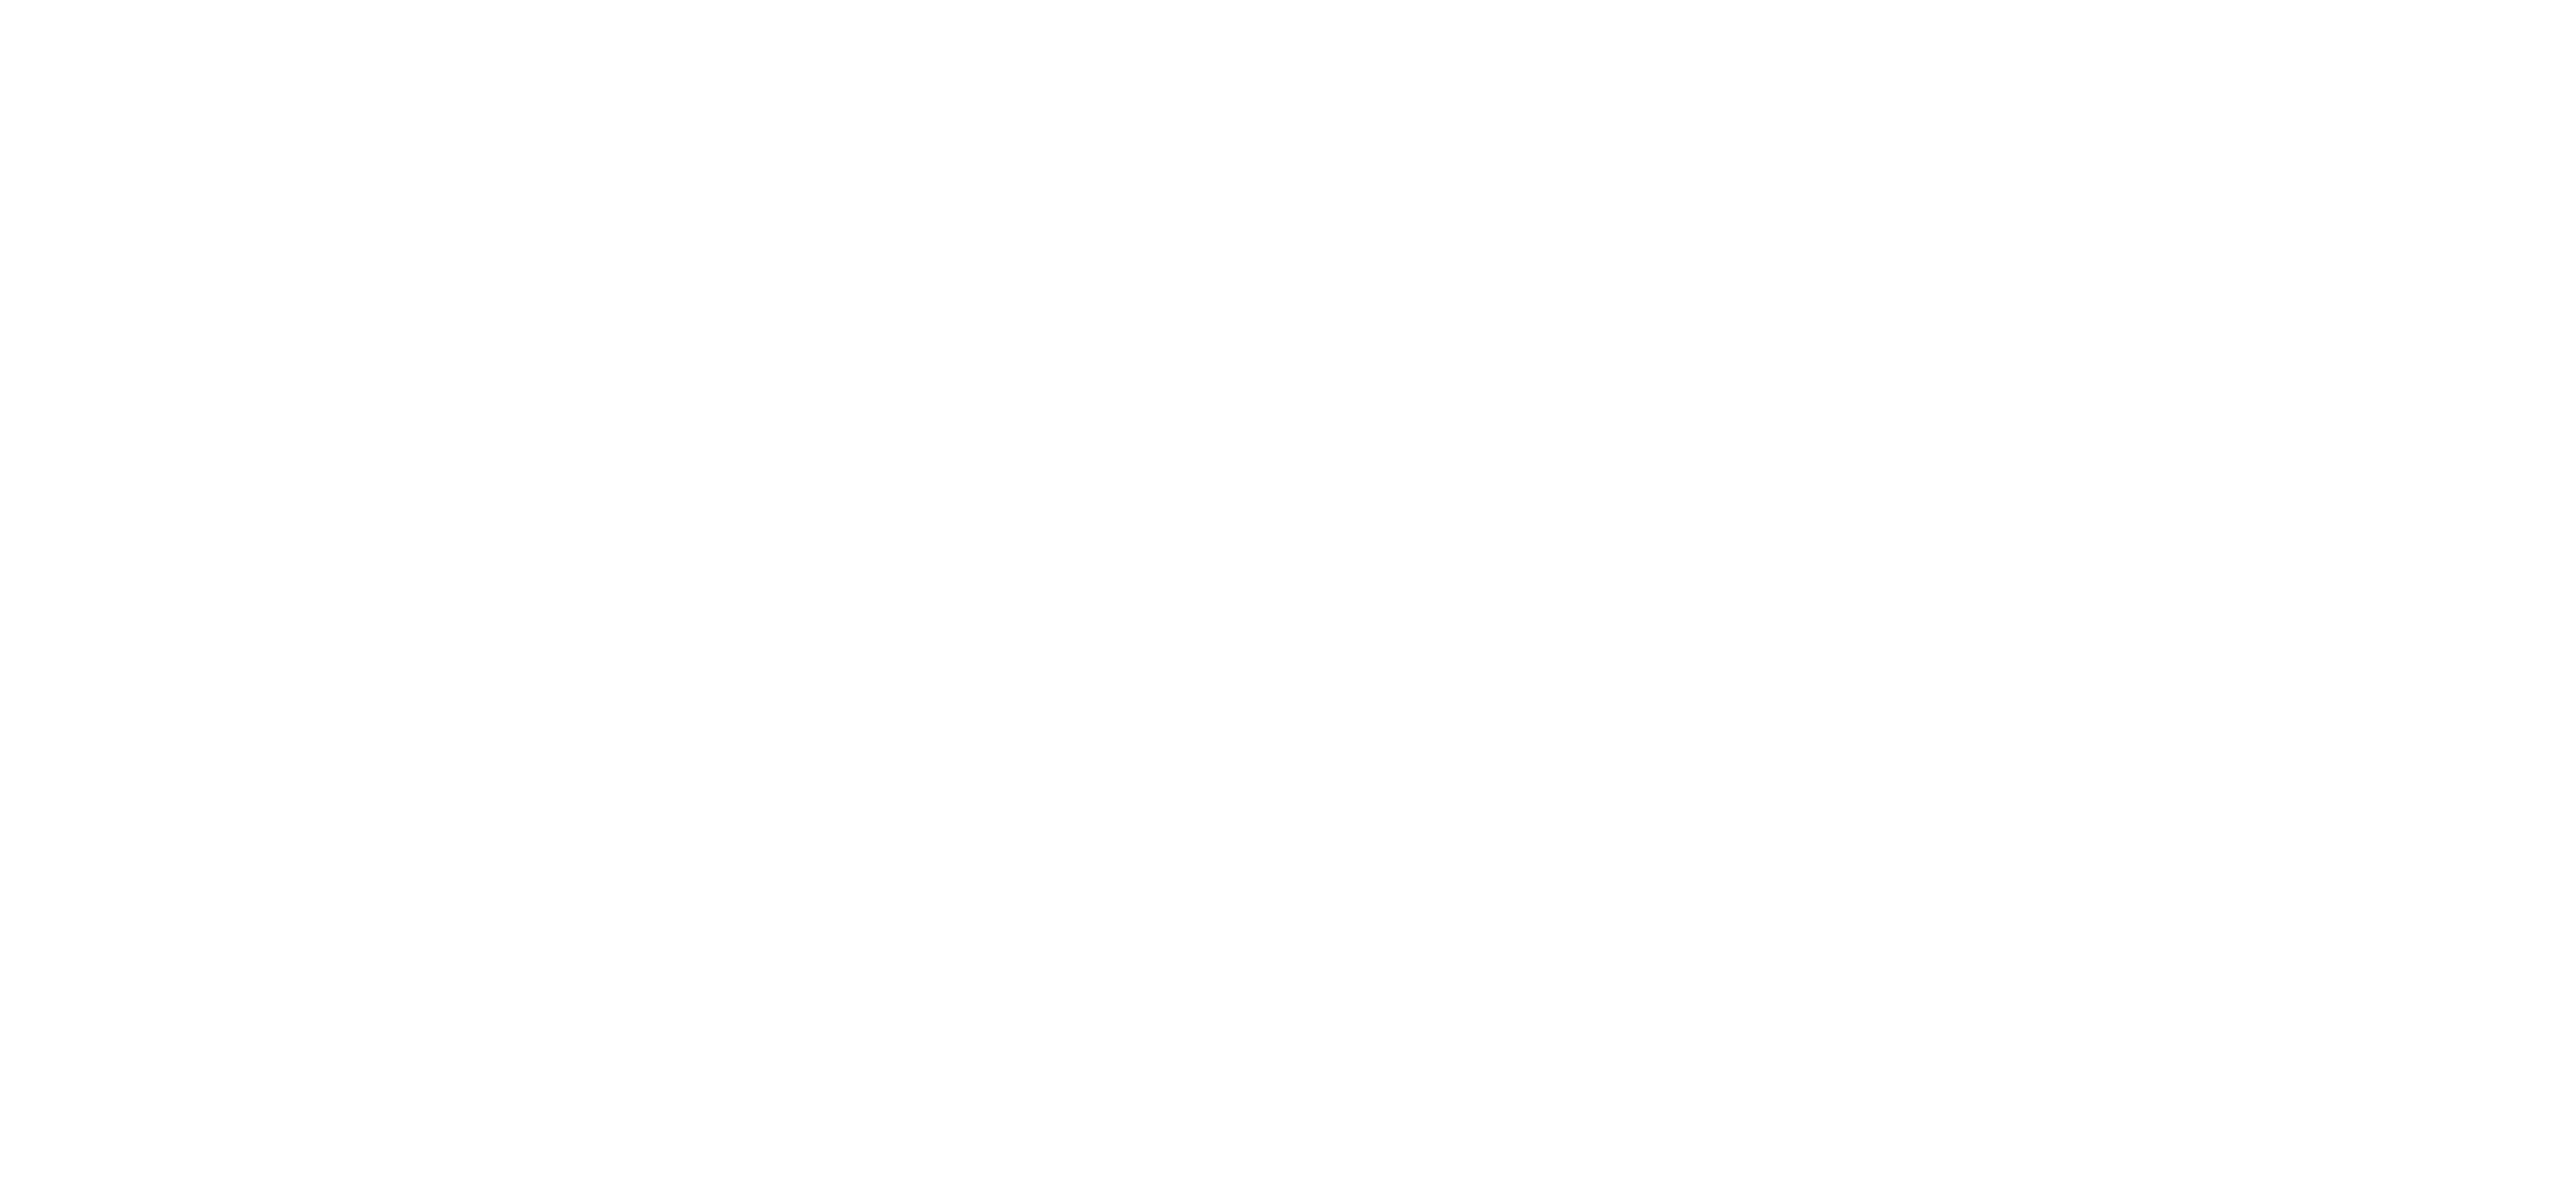


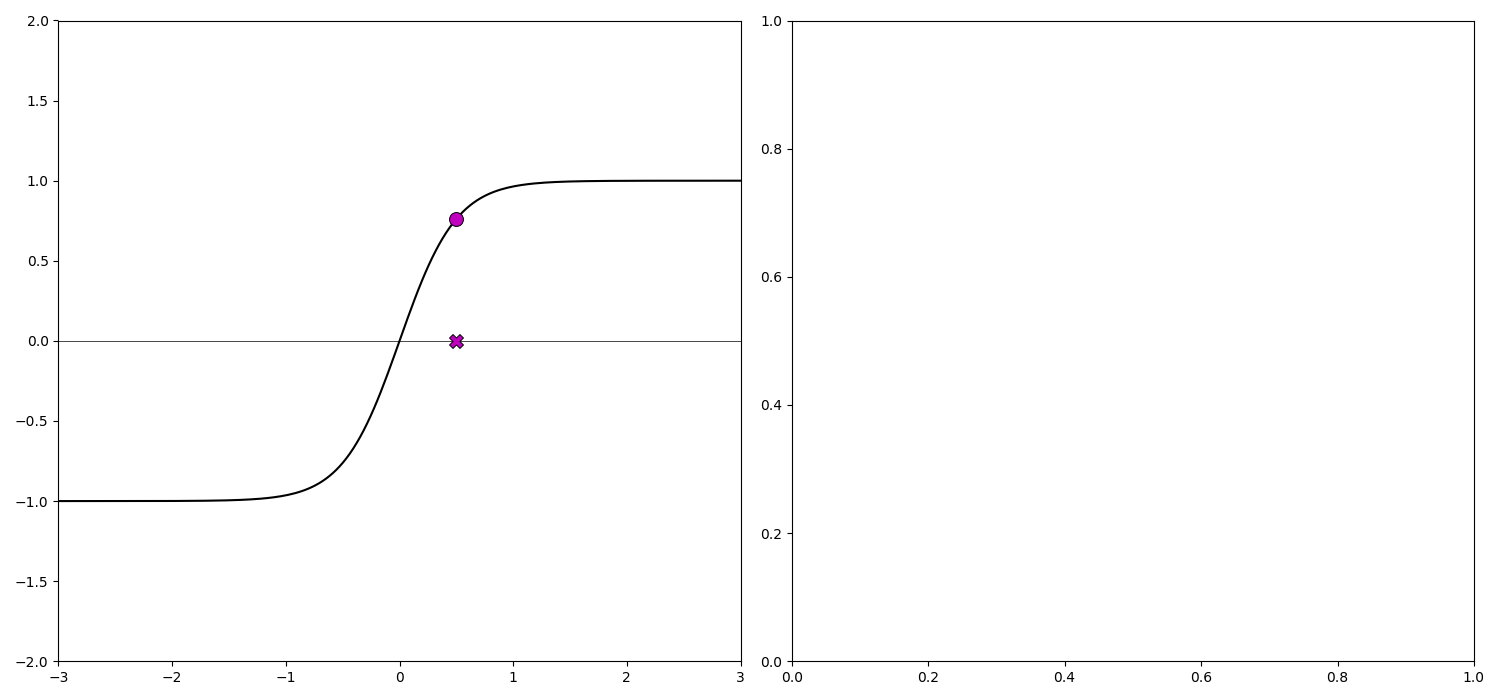
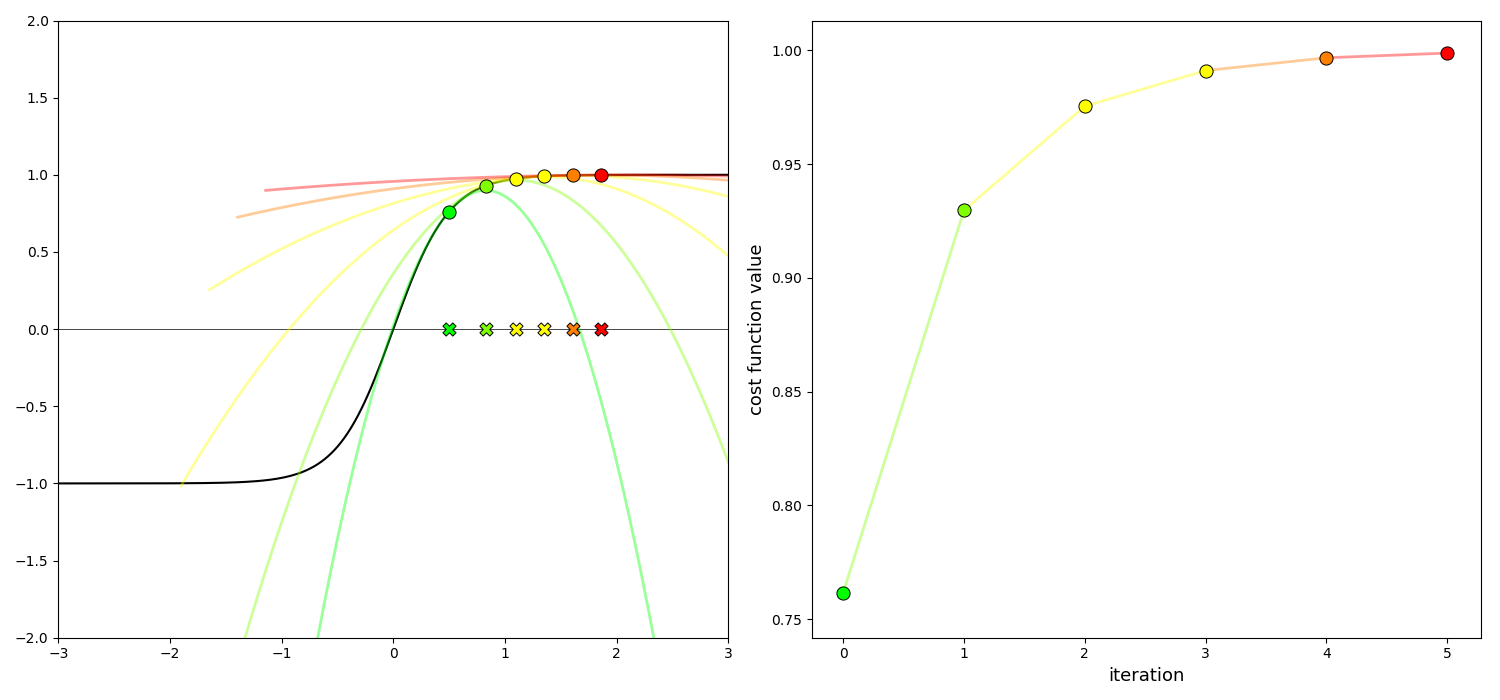
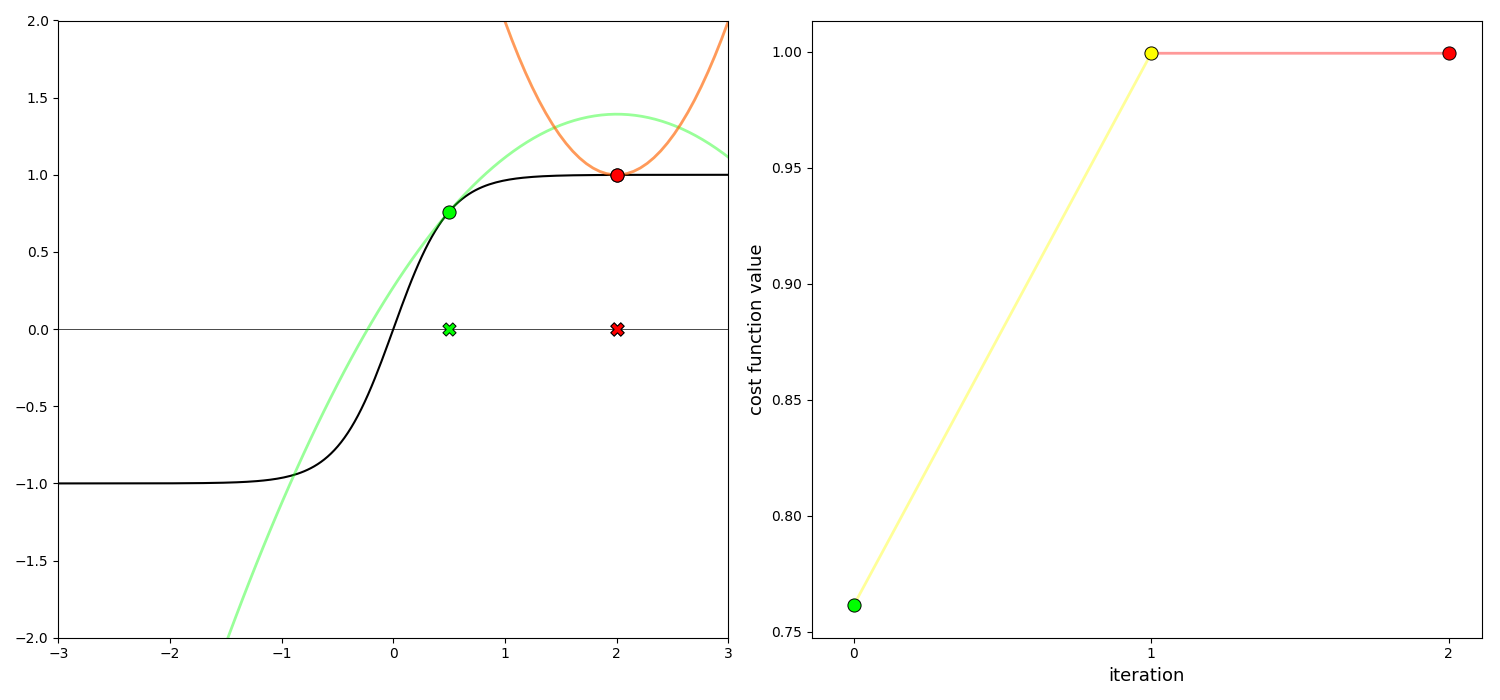
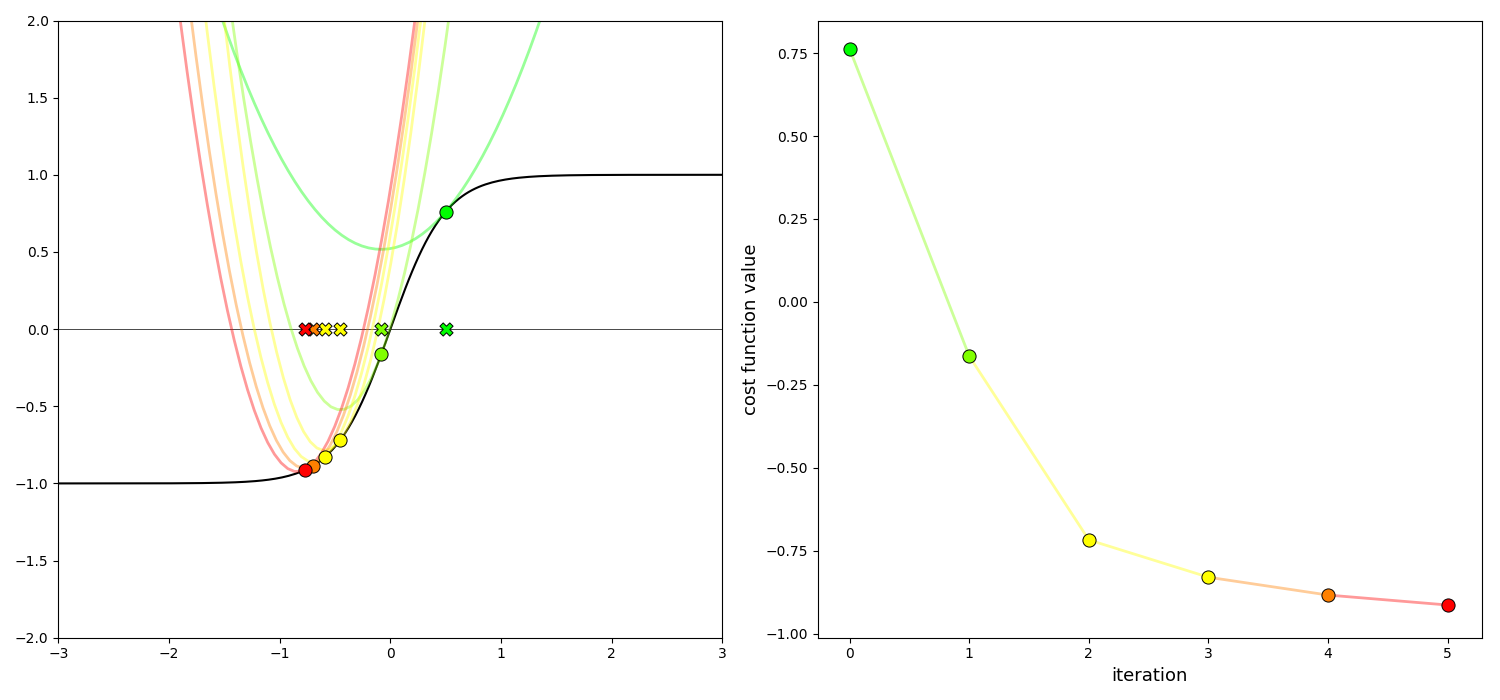

In [3]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.tanh(2*w)

# create an instance of the visualizer with this function
demo = optlib.regularized_newtons_method.visualizer(g = g)

# run the visualizer for our chosen input function, initial point, and step length alpha
beta_range = np.linspace(0,4,3)
demo.draw_it_newtons(w_init = 0.5,max_its = 5,beta_range = beta_range)